# Import Library

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows', None)
# Visuals
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# Feature Cleaning
from scipy.stats import zscore, median_abs_deviation
# Feature Imputation
from sklearn.impute import KNNImputer ,SimpleImputer
# Feature Selection
from sklearn.feature_selection import f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Data Spliting
from sklearn.model_selection import train_test_split
# Features Encoding
from sklearn.preprocessing import  LabelEncoder , OneHotEncoder
import category_encoders as ce
# Sampling
from imblearn.over_sampling import SMOTE , RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# Transformation
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.base import BaseEstimator, TransformerMixin
# Scaling
from sklearn.preprocessing import RobustScaler , StandardScaler , MinMaxScaler , MaxAbsScaler , Normalizer
# PCA
from sklearn.decomposition import PCA
# LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# SVD
from sklearn.decomposition import TruncatedSVD
# M_Info
from sklearn.feature_selection import mutual_info_classif , SelectPercentile
from sklearn.feature_selection import SelectKBest
# Isolation Forest
from sklearn.ensemble import IsolationForest
# 

# Data Loading

In [ ]:
df=pd.read_csv('/test_datasets/data_1.csv')

In [3]:
copy=df.copy()

In [4]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.shape

(1470, 35)

# Data Exploration

### Variable Identification

In [7]:
numeric_col = [col for col in df.columns if df[col].dtype != 'object']
categorical_col = [col for col in df.columns if df[col].dtype == 'object']

In [8]:
numeric_df = df.select_dtypes(include=['number'])

categorical_df = df.select_dtypes(include=['object', 'category'])

In [9]:
target='Attrition'

###  Univariate Analysis

In [10]:
df[numeric_col].describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

In [11]:
df[categorical_col].describe(include='object')

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

In [12]:
from scipy.stats import skew

In [13]:
high_skewness_col=[]

In [14]:
# for column in numeric_col:
#     print(f"Analysis for {column}:")

#     # Quartiles
#     Q1 = np.percentile(df[column], 25)
#     Q2 = np.percentile(df[column], 50)  # Median
#     Q3 = np.percentile(df[column], 75)
#     IQR = Q3 - Q1

#     print(f"Q1: {Q1}, Q2 (Median): {Q2}, Q3: {Q3}")
#     print(f"IQR: {IQR}")

#     # Skewness
#     skewness = skew(df[column])
#     print(f"Skewness: {skewness}\n")

#     if skewness >= 1:
#         high_skewness_col.append(column)

#     # Histogram
#     plt.hist(df[column], bins=20, edgecolor='black')
#     plt.title(f'Histogram of {column}')
#     plt.xlabel('Values')
#     plt.ylabel('Frequency')
#     plt.show()

#     # Box Plot
#     plt.boxplot(df[column])
#     plt.title(f'Box Plot of {column}')
#     plt.xlabel('Values')
#     plt.show()

In [15]:
# for column in categorical_col:
#     # Histogram
#     plt.hist(df[column], bins=20, edgecolor='black')
#     plt.title(f'Histogram of {column}')
#     plt.xlabel('Values')
#     plt.ylabel('Frequency')
#     plt.show()

### Bi-variate Analysis

In [16]:
# sns.pairplot(df)
# plt.suptitle('Scatter Plots for All Numerical Columns', y=1.02)
# plt.show()

In [17]:
# plt.figure(figsize=(15, 15))
# sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
# plt.title('Correlation Heatmap')
# plt.show()

### Action 

In [18]:
# noticed col with only one unique value 
def drop_single_value_columns(df):
    cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]
    df.drop(columns=cols_to_drop , axis=1 , inplace=True)
    
    return cols_to_drop

In [19]:
drop_single_value_columns(df)

['EmployeeCount', 'Over18', 'StandardHours']

In [20]:
numeric_col = [col for col in df.columns if df[col].dtype != 'object']
categorical_col = [col for col in df.columns if df[col].dtype == 'object']

numeric_df = df.select_dtypes(include=['number'])
categorical_df = df.select_dtypes(include=['object', 'category'])

# Feature Cleaning

### missing values

In [21]:
df.isnull().sum()/df.shape[0]

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInCurrentRole          0.0
YearsSinceLastPromotion     0.0
YearsWit

### Special values

In [22]:
for col in categorical_col:
    print(df[col].value_counts() , '\n','\n')

Attrition
No     1233
Yes     237
Name: count, dtype: int64 
 

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64 
 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64 
 

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64 
 

Gender
Male      882
Female    588
Name: count, dtype: int64 
 

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64 
 

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64 
 

O

### outliers

In [23]:
def total_outliers_z_score(df, threshold=3):
    # Create a boolean Series to track rows with outliers
    outlier_rows = pd.Series(False, index=df.index)

    for column in df.select_dtypes(include=[np.number]).columns:
        # Calculate Z-scores
        df['z_score'] = zscore(df[column])
        
        # Identify outliers
        outliers = np.abs(df['z_score']) > threshold
        
        # Update the outlier_rows boolean Series
        outlier_rows = outlier_rows | outliers

    # Drop the last created column
    df.drop(['z_score'], axis=1, inplace=True)

    # Get the indexes of the outlier rows
    outlier_indexes = df.index[outlier_rows]

    # Total number of unique rows with at least one outlier
    total_outliers = outlier_rows.sum()

    return total_outliers, outlier_indexes


def total_outliers_modified_z_score(df, threshold=3.5):
    # Create a boolean Series to track rows with outliers
    outlier_rows = pd.Series(False, index=df.index)

    for column in df.select_dtypes(include=[np.number]).columns:
        # Calculate Median Absolute Deviation (MAD)
        mad = median_abs_deviation(df[column])
        median = df[column].median()
        
        # Calculate Modified Z-scores
        df['mod_z_score'] = 0.6745 * (df[column] - median) / mad
        
        # Identify outliers
        outliers = np.abs(df['mod_z_score']) > threshold
        
        # Update the outlier_rows boolean Series
        outlier_rows = outlier_rows | outliers       

    # drop the last created col
    df.drop(['mod_z_score'], axis=1, inplace=True)
        
    # Get the indexes of the outlier rows
    outlier_indexes = df.index[outlier_rows]

    # Total number of unique rows with at least one outlier
    total_outliers = outlier_rows.sum()

    return total_outliers, outlier_indexes


def total_outliers_iqr(df, outlier_threshold=1.5):
    # Create a boolean Series to track rows with outliers
    outlier_rows = pd.Series(False, index=df.index)
    
    for column in df.select_dtypes(include=[np.number]).columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - outlier_threshold * IQR
        upper_bound = Q3 + outlier_threshold * IQR
        
        # Identify outliers
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        
        # Update the outlier_rows boolean Series
        outlier_rows = outlier_rows | outliers
    
    # Get the indexes of the outlier rows
    outlier_indexes = df.index[outlier_rows]

    # Total number of unique rows with at least one outlier
    total_outliers = outlier_rows.sum()

    return total_outliers, outlier_indexes


In [24]:
total_outliers_z , outlier_indexes_z = total_outliers_z_score(df)
print(f"Total number of rows with outliers using Z-score: {total_outliers_z}    &&& Percentage : ", total_outliers_z / df.shape[0])


total_outliers_mod_z, outlier_indexes_mod_z = total_outliers_modified_z_score(df)
print(f"Total number of rows with outliers using Modified Z-score: {total_outliers_mod_z}   &&& Percentage : ", total_outliers_mod_z / df.shape[0])

total_outliers_iqr, outlier_indexes_iqr= total_outliers_iqr(df)
print(f"Total number of rows with outliers using IQR: {total_outliers_iqr}    &&& Percentage : ", total_outliers_iqr / df.shape[0])

Total number of rows with outliers using Z-score: 83    &&& Percentage :  0.05646258503401361
Total number of rows with outliers using Modified Z-score: 1140   &&& Percentage :  0.7755102040816326
Total number of rows with outliers using IQR: 691    &&& Percentage :  0.47006802721088436


#### Action 

In [25]:
# df= df.drop(outlier_indexes_z)

# feature engineering 

### Decompose & Discretization

In [26]:
df.head(20)

Age Attrition     BusinessTravel  DailyRate              Department  \
0    41       Yes      Travel_Rarely       1102                   Sales   
1    49        No  Travel_Frequently        279  Research & Development   
2    37       Yes      Travel_Rarely       1373  Research & Development   
3    33        No  Travel_Frequently       1392  Research & Development   
4    27        No      Travel_Rarely        591  Research & Development   
5    32        No  Travel_Frequently       1005  Research & Development   
6    59        No      Travel_Rarely       1324  Research & Development   
7    30        No      Travel_Rarely       1358  Research & Development   
8    38        No  Travel_Frequently        216  Research & Development   
9    36        No      Travel_Rarely       1299  Research & Development   
10   35        No      Travel_Rarely        809  Research & Development   
11   29        No      Travel_Rarely        153  Research & Development   
12   31        No      Travel_Rarely        670  Research & Development   
13   34        No      Travel_Rarely       1346  Research & Development   
14   28       Yes      Travel_Rarely        103  Research & Development   
15   29        No      Travel_Rarely       1389  Research & Development   
16   32        No      Travel_Rarely        334  Research & Development   
17   22        No         Non-Travel       1123  Research & Development   
18   53        No      Travel_Rarely       1219                   Sales   
19   38        No      Travel_Rarely        371  Research & Development   

    DistanceFromHome  Education EducationField  EmployeeNumber  \
0                  1          2  Life Sciences               1   
1                  8          1  Life Sciences               2   
2                  2          2          Other               4   
3                  3          4  Life Sciences               5   
4                  2          1        Medical               7   
5                  2          2  Life Sciences               8   
6                  3          3        Medical              10   
7                 24          1  Life Sciences              11   
8                 23          3  Life Sciences              12   
9                 27          3        Medical              13   
10                16          3        Medical              14   
11                15          2  Life Sciences              15   
12                26          1  Life Sciences              16   
13                19          2        Medical              18   
14                24          3  Life Sciences              19   
15                21          4  Life Sciences              20   
16                 5          2  Life Sciences              21   
17                16          2        Medical              22   
18                 2          4  Life Sciences              23   
19                 2          3  Life Sciences              24   

    EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                         2  Female          94               3         2   
1                         3    Male          61               2         2   
2                         4    Male          92               2         1   
3                         4  Female          56               3         1   
4                         1    Male          40               3         1   
5                         4    Male          79               3         1   
6                         3  Female          81               4         1   
7                         4    Male          67               3         1   
8                         4    Male          44               2         3   
9                         3    Male          94               3         2   
10                        1    Male          84               4         1   
11                        4  Female          49               2         2   
12                        1    Male     

In [27]:
# no Discretization or Decompose needed 

### Crossing 

In [28]:
numeric_col = [col for col in df.columns if df[col].dtype != 'object']
categorical_col = [col for col in df.columns if df[col].dtype == 'object']

In [29]:
for col in categorical_col:
    print(df[col].value_counts(), '\n')

Attrition
No     1233
Yes     237
Name: count, dtype: int64 

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64 

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64 

Gender
Male      882
Female    588
Name: count, dtype: int64 

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64 

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64 

OverTime
No    

In [30]:
numeric_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [31]:
df[['DistanceFromHome','WorkLifeBalance']].head(10)

DistanceFromHome  WorkLifeBalance
0                 1                1
1                 8                3
2                 2                3
3                 3                3
4                 2                3
5                 2                2
6                 3                2
7                24                3
8                23                3
9                27                2

In [32]:
df[['MonthlyIncome','MonthlyRate','HourlyRate','DailyRate']].head(10)

MonthlyIncome  MonthlyRate  HourlyRate  DailyRate
0           5993        19479          94       1102
1           5130        24907          61        279
2           2090         2396          92       1373
3           2909        23159          56       1392
4           3468        16632          40        591
5           3068        11864          79       1005
6           2670         9964          81       1324
7           2693        13335          67       1358
8           9526         8787          44        216
9           5237        16577          94       1299

In [33]:
df[['JobInvolvement','JobSatisfaction']].head(10)

JobInvolvement  JobSatisfaction
0               3                4
1               2                2
2               2                3
3               3                3
4               3                2
5               3                4
6               4                1
7               3                3
8               2                3
9               3                3

In [34]:
# not recommended 

# df['JobLevel_MonthlyIncome'] = df['JobLevel'] * df['MonthlyIncome']
# df['Age_TotalWorkingYears'] = df['Age'] / (df['TotalWorkingYears'] + 1)  
# df['JobInvolvement_JobSatisfaction'] = df['JobInvolvement'] * df['JobSatisfaction']
# df['DistanceFromHome_WorkLifeBalance'] = df['DistanceFromHome'] * df['WorkLifeBalance']
# df['YearsWithCurrManager_PerformanceRating'] = df['YearsWithCurrManager'] * df['PerformanceRating']


# Data Spliting 

In [35]:
df['Attrition']=df['Attrition'].map({'No':0 , 'Yes':1})

In [36]:
X=df.drop(columns=[target] )
y= df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 ,stratify=y) # stratify ->Ensures train and test splits have proportion of classes as in the original dataset 

# feature Imputation 

## Not tested for this data -> check the code correctness 

## Hot-Deck imputation 

### Random Hot-Deck

In [37]:
def random_Hot_deck_imputation(df_train, df_test, cols):
    for col in cols:
        # Get non-missing values from the training set to act as donors
        donor_values = df_train[col].dropna().values
        
        # Impute missing values in the training set
        missing_indices_train = df_train[df_train[col].isna()].index
        df_train.loc[missing_indices_train, col] = np.random.choice(donor_values, size=len(missing_indices_train), replace=True)
        
        # Impute missing values in the test set using training set donor values
        missing_indices_test = df_test[df_test[col].isna()].index
        df_test.loc[missing_indices_test, col] = np.random.choice(donor_values, size=len(missing_indices_test), replace=True)
    
    return df_train, df_test

In [38]:
### Old way I used before 

def fillMissing_SaveDist(df_train, df_test, cols):
    for col in cols:
        fillList = df_train[col].dropna()

        df_train[col] = df_train[col].fillna(pd.Series(np.random.choice(fillList, len(df_train.index))))
        df_test[col] = df_test[col].fillna(pd.Series(np.random.choice(fillList, len(df_test.index))))

    return df_train, df_test

### Sequential Hot_Deck

In [39]:
def sequential_Hot_deck_imputation(df,cols):
    for col in cols:
        df[col]=df[col].fillna(method = 'ffill' )
        # Backward fill if forward fill left any NaNs
        df[col]=df[col].fillna(method = 'bfill' )
    return df

## Simple Imputation 

In [40]:
def simpleImputation(train_df, test_df, cols, method='mean'):
    imputer = SimpleImputer(strategy=method)
    train_df[cols] = imputer.fit_transform(train_df[cols])
    test_df[cols] = imputer.transform(test_df[cols])

    return train_df, test_df

## KNN Imputation 

In [41]:
def knnImputation_numericalCol(train_df, test_df, cols, neighbors):
    knn_imputer = KNNImputer(n_neighbors=neighbors)
    train_df[cols] =knn_imputer.fit_transform(train_df[cols])
    test_df[cols] =knn_imputer.transform(test_df[cols])

    return train_df, test_df


def knnImputation_categoricalCol(train_df, test_df, cols, neighbors):
    #
    return train_df, test_df

## Action 

In [42]:
# no missing value 

# Feature Encoding

In [43]:
numeric_col_before_encoding = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_col_before_encoding = [col for col in X_train.columns if X_train[col].dtype == 'object']

numeric_X_train_before_encoding = X_train.select_dtypes(include=['number'])
categorical_X_train_before_encoding = X_train.select_dtypes(include=['object', 'category'])

## Encoding Methods

In [44]:
def labelEncoding(train_df, test_df, cols):
    encoders = {}
    
    for col in cols:
        le = LabelEncoder()
        le.fit(train_df[col])
        encoders[col] = le
        
        train_df[col] = le.transform(train_df[col])
        test_df[col] = le.transform(test_df[col])

    return train_df, test_df

def OHEncoding_top_N_values(train_df, test_df,cols,N_labels=-1): 
    flag=False
    if N_labels == -1:
            flag=True
    for col in cols:
        if flag == True: # default OHE
            N_labels=len(train_df[col].value_counts())
        top_N_labels = [y for y in train_df[col].value_counts().sort_values(ascending=False).head(N_labels).index]
        if N_labels == len(train_df[col].value_counts().index):
            top_N_labels.pop() # (n-> n-1)
        for label in top_N_labels:
            train_df[col+'_'+label] = np.where(train_df[col]==label, 1, 0)
            test_df[col+'_'+label] = np.where(test_df[col]==label, 1, 0)

        train_df.drop(col, axis=1, inplace=True)
        test_df.drop(col, axis=1, inplace=True)
    return train_df , test_df

def freqEncoding(train_df, test_df, cols):
    freq_dicts = {}
    
    for col in cols:
        freq = train_df[col].value_counts() / len(train_df)
        freq_dicts[col] = freq.to_dict()
        
        train_df[col] = train_df[col].map(freq_dicts[col])
        test_df[col] = test_df[col].map(freq_dicts[col])
    
    return train_df, test_df


def countEncoding(train_df, test_df, cols):
    count_dicts = {} 
    
    for col in cols:
        counts = train_df[col].value_counts()
        count_dicts[col] = counts.to_dict()
        
        train_df[col] = train_df[col].map(count_dicts[col])
        test_df[col] = test_df[col].map(count_dicts[col])
    
    return train_df, test_df


def TargetEncoding_NominalCat(train_df, test_df,y_train, cols):
    encoders = {}

    for col in cols:
        te = ce.TargetEncoder()
        encoders[col] = te
        
        train_df[col] = te.fit_transform(train_df[col], y_train[:])
        test_df[col] = te.transform(test_df[col])
    
    return train_df, test_df


def TargetEncoding_OrdinalCat(train_df, test_df, cols, target):
    encoders = {}

    for col in cols:
        te = ce.TargetEncoder()
        encoders[col] = te
        
        train_df[col] = te.fit_transform(train_df[col], train_df[target])
        test_df[col] = te.transform(test_df[col])
        
        train_df[col] = train_df[col].rank(method='dense', ascending=True).astype(int)
        test_df[col] = test_df[col].rank(method='dense', ascending=True).astype(int)
    
    return train_df, test_df


def hashEncoding(train_df, test_df, cols, n_comp):
    hash_encoders = {}
    
    for col in cols:
        hash_enc = ce.HashingEncoder(cols=col, n_components=n_comp)
        hash_encoders[col] = hash_enc
        
        train_df[col] = hash_enc.fit_transform(train_df[[col]])
        test_df[col] = hash_enc.transform(test_df[[col]])
    
    return train_df, test_df


def binaryEncoder(train_df, test_df, cols):
    binary_enc = ce.BinaryEncoder(cols=cols)
    
    train_df = binary_enc.fit_transform(train_df)
    test_df = binary_enc.transform(test_df)
    
    return train_df, test_df

def leaveOneOutEncoding(train_df, test_df, cols, target):
    loo_enc = ce.LeaveOneOutEncoder(cols=cols)
    
    train_df = loo_enc.fit_transform(train_df, train_df[target])
    test_df = loo_enc.transform(test_df)
    
    return train_df, test_df


def jamesSteinEncoding(train_df, test_df, cols, target):
    js_enc = ce.JamesSteinEncoder(cols=cols)
    
    train_df = js_enc.fit_transform(train_df, train_df[target])
    test_df = js_enc.transform(test_df)
    
    return train_df, test_df


def helmertEncoding(train_df, test_df, cols):
    helmert_enc = ce.HelmertEncoder(cols=cols)
    
    train_df = helmert_enc.fit_transform(train_df)
    test_df = helmert_enc.transform(test_df)
    
    return train_df, test_df


def polynomialEncoding(train_df, test_df, cols):
    poly_enc = ce.PolynomialEncoder(cols=cols)
    
    train_df = poly_enc.fit_transform(train_df)
    test_df = poly_enc.transform(test_df)
    
    return train_df, test_df

In [45]:
for col in categorical_col_before_encoding:
    print(X_train[col].value_counts() , '\n')

BusinessTravel
Travel_Rarely        828
Travel_Frequently    225
Non-Travel           123
Name: count, dtype: int64 

Department
Research & Development    764
Sales                     364
Human Resources            48
Name: count, dtype: int64 

EducationField
Life Sciences       479
Medical             364
Marketing           134
Technical Degree    115
Other                62
Human Resources      22
Name: count, dtype: int64 

Gender
Male      704
Female    472
Name: count, dtype: int64 

JobRole
Sales Executive              273
Research Scientist           220
Laboratory Technician        215
Manufacturing Director       113
Healthcare Representative    108
Manager                       83
Research Director             63
Sales Representative          60
Human Resources               41
Name: count, dtype: int64 

MaritalStatus
Married     540
Single      373
Divorced    263
Name: count, dtype: int64 

OverTime
No     836
Yes    340
Name: count, dtype: int64 



In [46]:
OH_encoded_cols=['Department','MaritalStatus','Gender' ]
Binary_encoded_cols=['EducationField']
targetNominal_encoded_cols=['JobRole']

In [47]:
X_train ,X_test =OHEncoding_top_N_values(X_train ,X_test,OH_encoded_cols,-1)
X_train ,X_test =binaryEncoder(X_train ,X_test ,Binary_encoded_cols)
X_train ,X_test =TargetEncoding_NominalCat(X_train ,X_test,y_train ,targetNominal_encoded_cols)

In [48]:
X_train.head()

Age     BusinessTravel  DailyRate  DistanceFromHome  Education  \
1194   47      Travel_Rarely       1225                 2          4   
128    22      Travel_Rarely        594                 2          1   
810    46      Travel_Rarely        406                 3          1   
478    25      Travel_Rarely        622                13          1   
491    43  Travel_Frequently       1001                 9          5   

      EducationField_0  EducationField_1  EducationField_2  EmployeeNumber  \
1194                 0                 0                 1            1676   
128                  0                 1                 0             169   
810                  0                 1                 1            1124   
478                  1                 0                 0             645   
491                  1                 0                 0             663   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel   JobRole  \
1194                        2          47               4         4  0.060427   
128                         3         100               3         1  0.269767   
810                         1          52               3         4  0.060427   
478                         2          40               3         1  0.412078   
491                         4          72               3         2  0.269767   

      JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
1194                2          15972        21086                   6   
128                 4           2523        19299                   0   
810                 3          17465        15596                   3   
478                 3           2096        26376                   1   
491                 3           5679        19627                   3   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1194       No                 14                  3                         3   
128        No                 14                  3                         3   
810        No                 12                  3                         4   
478        No                 11                  3                         3   
491       Yes                 13                  3                         2   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1194                 3                 29                      2   
128                  1                  3                      2   
810                  1                 23                      3   
478                  0                  7                      1   
491                  1                 10                      3   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1194                3               3                   2   
128                 3               2                   1   
810                 3              12                   9   
478                 3               7                   4   
491                 3               8                   7   

      YearsSinceLastPromotion  YearsWithCurrManager  \
1194                        1                     2   
128                         2                     1   
810                         4                     9   
478                         0                     6   
491                         4                     7   

      Department_Research & Development  Department_Sales  \
1194                                  0                 1   
128                                   1                 0   
810                                   0                 1   
478                                   0                 1   
491                                   1                 0   

      MaritalStatus_Married  MaritalStatus_Single  Gender_Male  
1194                      0                     0            0  
128                       1                     0            1  
810                   

## Mapping  

In [49]:
X_train['OverTime']=X_train['OverTime'].map({'No':0 , 'Yes':1})
X_train['BusinessTravel']=X_train['BusinessTravel'].map({'Non-Travel':0 , 'Travel_Rarely':1 , 'Travel_Frequently':2})

X_test['OverTime']=X_test['OverTime'].map({'No':0 , 'Yes':1})
X_test['BusinessTravel']=X_test['BusinessTravel'].map({'Non-Travel':0 , 'Travel_Rarely':1 , 'Travel_Frequently':2})

In [50]:
X_train.head(7)

Age  BusinessTravel  DailyRate  DistanceFromHome  Education  \
1194   47               1       1225                 2          4   
128    22               1        594                 2          1   
810    46               1        406                 3          1   
478    25               1        622                13          1   
491    43               2       1001                 9          5   
323    28               1       1157                 2          4   
258    51               1        833                 1          3   

      EducationField_0  EducationField_1  EducationField_2  EmployeeNumber  \
1194                 0                 0                 1            1676   
128                  0                 1                 0             169   
810                  0                 1                 1            1124   
478                  1                 0                 0             645   
491                  1                 0                 0             663   
323                  1                 0                 0             440   
258                  0                 0                 1             353   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel   JobRole  \
1194                        2          47               4         4  0.060427   
128                         3         100               3         1  0.269767   
810                         1          52               3         4  0.060427   
478                         2          40               3         1  0.412078   
491                         4          72               3         2  0.269767   
323                         1          84               1         1  0.131818   
258                         3          96               3         1  0.131818   

      JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
1194                2          15972        21086                   6   
128                 4           2523        19299                   0   
810                 3          17465        15596                   3   
478                 3           2096        26376                   1   
491                 3           5679        19627                   3   
323                 4           3464        24737                   5   
258                 4           2723        23231                   1   

      OverTime  PercentSalaryHike  PerformanceRating  \
1194         0                 14                  3   
128          0                 14                  3   
810          0                 12                  3   
478          0                 11                  3   
491          1                 13                  3   
323          1                 13                  3   
258          0                 11                  3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
1194                         3                 3                 29   
128                          3                 1                  3   
810                          4                 1                 23   
478                          3                 0                  7   
491                          2                 1                 10   
323                          4                 0                  5   
258                          2                 0                  1   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1194                      2                3               3   
128                       2                3               2   
810                       3                3              12   
478                       1                3               7   
491                       3                3               8   
323                       4                2               3   
258                       0                2               1   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCur

# Feature Selection 

## Features Importance Before Scaling

### Filters Methods

#### Action Needed

In [51]:
numeric_col_after_encoding = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_col_after_encoding = [col for col in X_train.columns if X_train[col].dtype == 'object']

numeric_X_train_after_encoding = X_train.select_dtypes(include=['number'])
categorical_X_train_after_encoding = X_train.select_dtypes(include=['object', 'category'])

#### Correlation 

##### High Correlated Features (MultiCol.|)

In [52]:
def corr_methods(df,method=''):
    if method == '':
        corr_matrix= df.corr()
    elif method == 'spearman':
        corr_matrix= df.corr(method='spearman')
    elif method == 'kendall':
        corr_matrix= df.corr(method='kendall')
    
    # Mask the upper triangle to avoid duplicate pairs
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    upper = corr_matrix.where(mask)

    # Find the index of the maximum correlation value
    max_corr = upper.abs().unstack().sort_values(ascending=False)
    max_corr = max_corr[max_corr < 1]  
    max_corr = max_corr[max_corr>0.8]

    return max_corr



In [53]:
# linear correlation 
corr_methods(numeric_X_train_after_encoding)

MonthlyIncome     JobLevel                             0.947008
Department_Sales  Department_Research & Development    0.911739
dtype: float64

In [54]:
# non linear correlation
corr_methods(numeric_X_train_after_encoding,'spearman')

MonthlyIncome         JobLevel                             0.920390
Department_Sales      Department_Research & Development    0.911739
YearsWithCurrManager  YearsAtCompany                       0.847037
YearsInCurrentRole    YearsAtCompany                       0.845861
dtype: float64

In [55]:
corr_methods(numeric_X_train_after_encoding,'kendall')

Department_Sales  Department_Research & Development    0.911739
MonthlyIncome     JobLevel                             0.807153
dtype: float64

###### Action 

In [56]:
# drop ['JobLevel' , 'YearsAtCompany']
#df.drop(columns=['JobLevel' , 'YearsAtCompany'] , axis=1 , inplace=True)

# update
# do any update needed on both test and train 

##### Low Correlated featrues to the target

In [57]:
##### NOTE ##### 
# Correlation Coefficient: Compute the Pearson correlation coefficient between each feature and the binary target variable. This is suitable for {{{{ NOTE continuous features and a binary target}}}}

# Point Biserial Correlation: For {{{{ NOTE binary features with a continuous target }}}, you can use the Point Biserial Correlation, which is a special case of Pearson correlation.

# Chi-Square Test: For{{{{ NOTE categorical features}}}}, you can use the Chi-Square test to assess the association between each feature and the binary target.

In [ ]:
threshold = 0.05
corr_pearson = X_train.corrwith(y_train).abs()
corr_spearman = X_train.corrwith(y_train, method='spearman').abs()
corr_kendall = X_train.corrwith(y_train, method='kendall').abs()

low_corr_features_pearson = corr_pearson[corr_pearson < threshold].index
low_corr_features_spearman = corr_spearman[corr_spearman < threshold].index
low_corr_features_kendall = corr_kendall[corr_kendall < threshold].index

In [58]:
threshold = 0.05
corr_with_saleprice = numeric_X_train_after_encoding.corrwith(y_train).abs()
low_corr_features = corr_with_saleprice[corr_with_saleprice < threshold].index

In [59]:
low_corr_features

Index(['Education', 'EducationField_2', 'EmployeeNumber', 'HourlyRate',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'Gender_Male'],
      dtype='object')

###### Action 

In [60]:
# ACTION 

# update 


#### ANOVA 

In [61]:
f_values, p_values = f_classif(numeric_X_train_before_encoding, y_train)

In [62]:
anova_results = pd.DataFrame({
    'Feature': numeric_X_train_before_encoding.columns,
    'F-Value': f_values,
    'p-Value': p_values
}).sort_values(by='F-Value', ascending=False)
print(anova_results)

                     Feature    F-Value       p-Value
17         TotalWorkingYears  42.143368  1.248850e-10
0                        Age  41.729236  1.532198e-10
23      YearsWithCurrManager  34.427882  5.747491e-09
21        YearsInCurrentRole  33.692718  8.297164e-09
8                   JobLevel  33.368331  9.757676e-09
10             MonthlyIncome  31.017502  3.167957e-08
20            YearsAtCompany  28.952703  8.947512e-08
16          StockOptionLevel  24.439454  8.781770e-07
7             JobInvolvement  18.656350  1.697444e-05
5    EnvironmentSatisfaction  15.169368  1.038280e-04
9            JobSatisfaction  12.686817  3.829936e-04
2           DistanceFromHome   8.900725  2.909483e-03
19           WorkLifeBalance   7.622819  5.853221e-03
1                  DailyRate   6.015380  1.432642e-02
12        NumCompaniesWorked   2.784982  9.541839e-02
15  RelationshipSatisfaction   2.212336  1.371797e-01
22   YearsSinceLastPromotion   2.168856  1.410990e-01
18     TrainingTimesLastYear

In [63]:
insignificant_features = anova_results[anova_results['p-Value'] > 0.05]['Feature']
print(insignificant_features)

12          NumCompaniesWorked
15    RelationshipSatisfaction
22     YearsSinceLastPromotion
18       TrainingTimesLastYear
3                    Education
4               EmployeeNumber
11                 MonthlyRate
6                   HourlyRate
13           PercentSalaryHike
14           PerformanceRating
Name: Feature, dtype: object


##### Action 

In [64]:
# ACTION 
# drop Education -> what he worked at is enough &&  'MonthlyRate' , 'HourlyRate' wanted to delete it before && EmployeeNumber -> ID && 
#df.drop(columns=['Education' , 'MonthlyRate' , 'HourlyRate' ,'EmployeeNumber' ] , axis=1 , inplace=True)  

# UPDATE 


#### VIF 

In [65]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)

                              Feature         VIF
0                                 Age   35.258473
1                      BusinessTravel    5.117963
2                           DailyRate    5.088774
3                    DistanceFromHome    2.352000
4                           Education    9.616499
5                    EducationField_0    4.539628
6                    EducationField_1    2.331201
7                    EducationField_2    6.158027
8                      EmployeeNumber    3.950505
9             EnvironmentSatisfaction    7.353502
10                         HourlyRate   11.387774
11                     JobInvolvement   15.593391
12                           JobLevel   53.967715
13                            JobRole    7.385367
14                    JobSatisfaction    7.002302
15                      MonthlyIncome   31.336156
16                        MonthlyRate    5.063280
17                 NumCompaniesWorked    2.764086
18                           OverTime    1.455456


##### Action 

In [66]:
### VIF > 5: High correlation. Indicates multicollinearity, which might require correction.
### VIF > 10: Very high correlation, typically a cause for concern, and suggests that the variable is highly collinear with others.

# ACTION 
#df.drop(columns=['Age' , 'PerformanceRating' , 'PercentSalaryHike' ] , axis=1 , inplace=True)  

# UPDATE 
# update on X_train and X_test

#### Chi 2

In [67]:
### NOTE it accecpt numerical values only -> encode the categorical values first 

In [68]:
categorical_X_train_before_encoding.head()

BusinessTravel              Department    EducationField  Gender  \
1194      Travel_Rarely                   Sales     Life Sciences  Female   
128       Travel_Rarely  Research & Development  Technical Degree    Male   
810       Travel_Rarely                   Sales         Marketing    Male   
478       Travel_Rarely                   Sales           Medical    Male   
491   Travel_Frequently  Research & Development           Medical    Male   

                    JobRole MaritalStatus OverTime  
1194                Manager      Divorced       No  
128   Laboratory Technician       Married       No  
810                 Manager       Married       No  
478    Sales Representative       Married       No  
491   Laboratory Technician      Divorced      Yes

In [69]:
from sklearn.feature_selection import chi2

In [70]:
# apply OHE in the Gategorical features before applying chi square
encoder = OneHotEncoder(sparse_output=False)
categorical_X_train_OHEncoded = encoder.fit_transform(categorical_X_train_before_encoding)

categorical_X_train_OHEncoded = pd.DataFrame(categorical_X_train_OHEncoded, columns=encoder.get_feature_names_out())

In [71]:
categorical_X_train_OHEncoded.head()

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                        0.0                               0.0   
1                        0.0                               0.0   
2                        0.0                               0.0   
3                        0.0                               0.0   
4                        0.0                               1.0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                           1.0                         0.0   
1                           1.0                         0.0   
2                           1.0                         0.0   
3                           1.0                         0.0   
4                           0.0                         0.0   

   Department_Research & Development  Department_Sales  \
0                                0.0               1.0   
1                                1.0               0.0   
2                                0.0               1.0   
3                                0.0               1.0   
4                                1.0               0.0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                             0.0                           1.0   
1                             0.0                           0.0   
2                             0.0                           0.0   
3                             0.0                           0.0   
4                             0.0                           0.0   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                       0.0                     0.0                   0.0   
1                       0.0                     0.0                   0.0   
2                       1.0                     0.0                   0.0   
3                       0.0                     1.0                   0.0   
4                       0.0                     1.0                   0.0   

   EducationField_Technical Degree  Gender_Female  Gender_Male  \
0                              0.0            1.0          0.0   
1                              1.0            0.0          1.0   
2                              0.0            0.0          1.0   
3                              0.0            0.0          1.0   
4                              0.0            0.0          1.0   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                0.0                      0.0   
1                                0.0                      0.0   
2                                0.0                      0.0   
3                                0.0                      0.0   
4                                0.0                      0.0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                            0.0              1.0   
1                            1.0              0.0   
2                            0.0              1.0   
3                            0.0              0.0   
4                            1.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                           0.0                     1.0   
1                           0.0                     0

In [72]:
chi2_values, p_values = chi2(categorical_X_train_OHEncoded, y_train)

chi2_results = pd.DataFrame({
    'Feature': categorical_X_train_OHEncoded.columns,
    'Chi-Square': chi2_values,
    'p-Value': p_values
}).sort_values(by='Chi-Square', ascending=False)
print(chi2_results)

                              Feature  Chi-Square       p-Value
27                       OverTime_Yes   38.424613  5.691010e-10
22       JobRole_Sales Representative   28.824597  7.923838e-08
25               MaritalStatus_Single   23.880575  1.025009e-06
16      JobRole_Laboratory Technician   18.582311  1.627235e-05
26                        OverTime_No   15.627235  7.713558e-05
1    BusinessTravel_Travel_Frequently   13.988008  1.839803e-04
19          JobRole_Research Director    9.871741  1.678366e-03
14  JobRole_Healthcare Representative    8.959710  2.759988e-03
18     JobRole_Manufacturing Director    8.278198  4.012394e-03
0           BusinessTravel_Non-Travel    7.094696  7.731242e-03
17                    JobRole_Manager    6.290483  1.213880e-02
24              MaritalStatus_Married    6.170206  1.299195e-02
5                    Department_Sales    5.993197  1.436115e-02
23             MaritalStatus_Divorced    5.109150  2.379998e-02
6      EducationField_Human Resources   

In [73]:
insignificant_features = chi2_results[chi2_results['p-Value'] > 0.05]['Feature']
print(insignificant_features)

4     Department_Research & Development
10                 EducationField_Other
8              EducationField_Marketing
11      EducationField_Technical Degree
15              JobRole_Human Resources
9                EducationField_Medical
20           JobRole_Research Scientist
2          BusinessTravel_Travel_Rarely
3            Department_Human Resources
21              JobRole_Sales Executive
12                        Gender_Female
13                          Gender_Male
7          EducationField_Life Sciences
Name: Feature, dtype: object


##### Action 

In [74]:
###

### Mutual_Info 

In [75]:
mi_scores =mutual_info_classif(X_train,y_train)
mi_scores = pd.Series(mi_scores, index=X_train.columns)
sorted_mi_scores=mi_scores.sort_values(ascending=False, inplace=True)
print(mi_scores)

MonthlyIncome                        0.037391
Age                                  0.034707
TotalWorkingYears                    0.031894
JobLevel                             0.031079
JobRole                              0.027805
YearsAtCompany                       0.026836
YearsInCurrentRole                   0.025657
NumCompaniesWorked                   0.020154
MaritalStatus_Single                 0.017712
YearsWithCurrManager                 0.016584
HourlyRate                           0.016370
Department_Sales                     0.013022
WorkLifeBalance                      0.012157
YearsSinceLastPromotion              0.009296
Education                            0.007649
OverTime                             0.006246
Department_Research & Development    0.005942
TrainingTimesLastYear                0.005312
StockOptionLevel                     0.005210
EnvironmentSatisfaction              0.005047
DailyRate                            0.004127
EducationField_0                  

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_8544\3978632977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X_train.columns, y=mi_scores, palette='coolwarm', order=sorted_mi_scores)


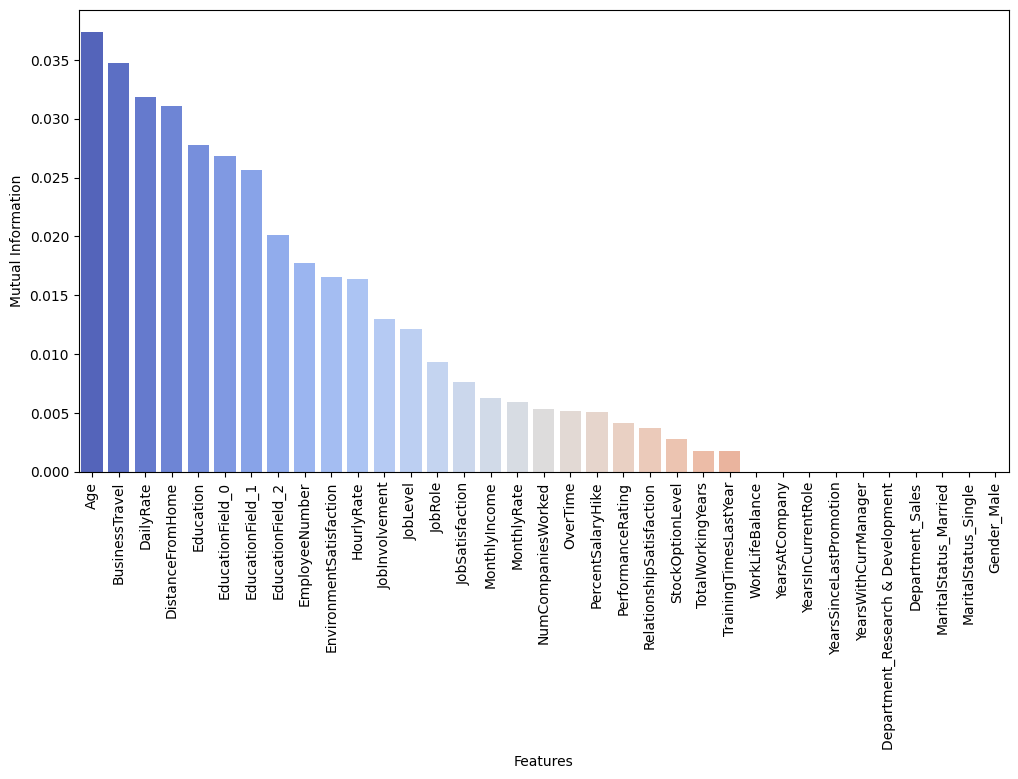

In [76]:
plt.figure(figsize=(12,6))
sns.barplot(x=X_train.columns, y=mi_scores, palette='coolwarm', order=sorted_mi_scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.show()

#### Action

In [77]:
# k = X_train.shape[1]-12
# selector = SelectKBest(mutual_info_classif, k=k)
# X_train = selector.fit_transform(X_train, y_train)
# X_test = selector.transform(X_test)

###### OR

In [78]:
# sel_cols = SelectPercentile(score_func=mutual_info_classif, percentile=70) # select the 70% top Features
# sel_cols.fit(X, y)
# sel_cols.get_feature_names_out()

In [79]:
pd.DataFrame(X_train).head()

Age  BusinessTravel  DailyRate  DistanceFromHome  Education  \
1194   47               1       1225                 2          4   
128    22               1        594                 2          1   
810    46               1        406                 3          1   
478    25               1        622                13          1   
491    43               2       1001                 9          5   

      EducationField_0  EducationField_1  EducationField_2  EmployeeNumber  \
1194                 0                 0                 1            1676   
128                  0                 1                 0             169   
810                  0                 1                 1            1124   
478                  1                 0                 0             645   
491                  1                 0                 0             663   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel   JobRole  \
1194                        2          47               4         4  0.060427   
128                         3         100               3         1  0.269767   
810                         1          52               3         4  0.060427   
478                         2          40               3         1  0.412078   
491                         4          72               3         2  0.269767   

      JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
1194                2          15972        21086                   6   
128                 4           2523        19299                   0   
810                 3          17465        15596                   3   
478                 3           2096        26376                   1   
491                 3           5679        19627                   3   

      OverTime  PercentSalaryHike  PerformanceRating  \
1194         0                 14                  3   
128          0                 14                  3   
810          0                 12                  3   
478          0                 11                  3   
491          1                 13                  3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
1194                         3                 3                 29   
128                          3                 1                  3   
810                          4                 1                 23   
478                          3                 0                  7   
491                          2                 1                 10   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1194                      2                3               3   
128                       2                3               2   
810                       3                3              12   
478                       1                3               7   
491                       3                3               8   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
1194                   2                        1                     2   
128                    1                        2                     1   
810                    9                        4                     9   
478                    4                        0                     6   
491                    7                        4                     7   

      Department_Research & Development  Department_Sales  \
1194                                  0                 1   
128                                   1                 0   
810                                   0                 1   
478                                   0                 1   
491                                   1                 0   

      MaritalStatus_Married  MaritalStatus_Single  Gender_Male  
1194                      0                     0            0  
128                       1                     0            1  
810                       1       

### RandomForest for Feature Importance

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf = RandomForestClassifier(n_estimators=100, random_state=42 , n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [82]:
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)


                              Feature  Importance
15                      MonthlyIncome    0.072234
0                                 Age    0.062772
23                  TotalWorkingYears    0.051881
16                        MonthlyRate    0.051092
2                           DailyRate    0.049787
8                      EmployeeNumber    0.047302
10                         HourlyRate    0.044243
13                            JobRole    0.044074
26                     YearsAtCompany    0.042743
3                    DistanceFromHome    0.038917
18                           OverTime    0.036676
29               YearsWithCurrManager    0.034511
17                 NumCompaniesWorked    0.033866
19                  PercentSalaryHike    0.030379
27                 YearsInCurrentRole    0.028445
25                    WorkLifeBalance    0.026543
24              TrainingTimesLastYear    0.026400
9             EnvironmentSatisfaction    0.025744
11                     JobInvolvement    0.025642


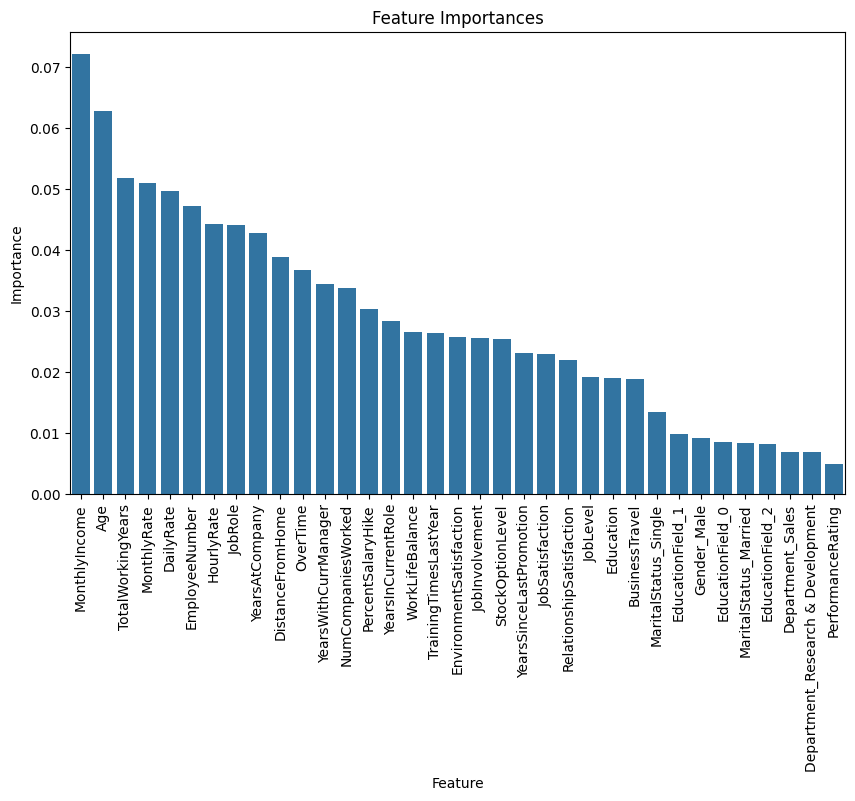

In [83]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(y='Importance', x='Feature', data=feature_importances_df)
plt.xticks(rotation=90) 
plt.title('Feature Importances')
plt.show()

#### ACTION

In [84]:
# ## Absolute Threshold -> Set a Cutoff
# threshold = 0.01  # Example threshold of 1%
# important_features = feature_importances_df[feature_importances_df['Importance'] > threshold]

# # OR 

# ## Relative Threshold -> Top-N Features
# top_n = 10
# top_features = feature_importances_df.head(top_n)

# # OR 

# ## Percentile-Based Threshold
# percentile = 50
# threshold = np.percentile(feature_importances_df['Importance'], percentile)
# important_features = feature_importances_df[feature_importances_df['Importance'] > threshold]

# Anomaly Detection Check

## IsolationForest 

In [85]:
isolation_forest = IsolationForest(n_estimators=100,random_state=42,bootstrap=True, n_jobs=-1).fit(X_train )
y_IsoPre = isolation_forest.predict(X_train)
y_IsoPre

array([-1,  1, -1, ...,  1, -1,  1])

In [86]:
results = pd.DataFrame({'Class': y_train, 'Anomaly': y_IsoPre})
anomalies_per_class = results[results['Anomaly'] == -1].groupby('Class').size()
anomalies_per_class

Class
0    557
1    143
dtype: int64

# Copy before any changing

In [87]:
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()
X_test_copy = X_test.copy()
y_test_copy = y_test.copy()

# Handle Unbalanced Data

## Over Sampling

In [84]:
smote = SMOTE(k_neighbors=7)
X_train, y_train = smote.fit_resample(X_train, y_train)


## Under Sampling

In [ ]:
undersampler = RandomUnderSampler()
X_train, y_train= undersampler.fit_resample(X_train, y_train)

# Transformation 

## Transformation Classes

In [94]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, constant=1):
        self.constant = constant

    def fit(self, X, y=None):
        # No fitting necessary for log transformation
        return self

    def transform(self, X):
        # Apply log transformation
        return np.log(X + self.constant)
    
class BoxCoxTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lmbdas = {}

    def fit(self, X, y=None):
        self.lmbdas = {}
        for col in X.columns:
            if (X[col] > 0).all():
                # Fit Box-Cox transformation for positive-only columns
                _, lmbda = stats.boxcox(X[col])
                self.lmbdas[col] = lmbda
            elif (X[col] >= 0).all():
                # Shift column and fit Box-Cox for non-negative columns
                shift_value = 1
                _, lmbda = stats.boxcox(X[col] + shift_value)
                self.lmbdas[col] = (lmbda, shift_value)
            else:
                # Column contains negative values, which are not suitable for Box-Cox
                self.lmbdas[col] = None
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for col in X.columns:
            if self.lmbdas[col] is not None:
                if isinstance(self.lmbdas[col], tuple):
                    lmbda, shift_value = self.lmbdas[col]
                    X_transformed[col] = stats.boxcox(X[col] + shift_value, lmbda=lmbda)
                else:
                    X_transformed[col] = stats.boxcox(X[col], lmbda=self.lmbdas[col])
            else:
                print(f"Column {col} contains negative values and cannot be Box-Cox transformed.")
        return X_transformed
    
class YeoJohnsonTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, standardize=True):
        self.standardize = standardize
        self.transformer = PowerTransformer(method='yeo-johnson', standardize=self.standardize)

    def fit(self, X, y=None):
        self.transformer.fit(X)
        return self

    def transform(self, X):
        X_transformed = self.transformer.transform(X)
        # Convert back to DataFrame to retain column names and index
        X_transformed = pd.DataFrame(X_transformed, columns=X.columns, index=X.index)
        return X_transformed

## Transformation Functions

### Log Transformation 

In [310]:
# Use Case: Often applied to data with exponential growth patterns, such as income or population.
def log_transform(df_train,df_test,constant=1):
    df_train = np.log(df_train + constant)
    df_test = np.log(df_test + constant)
    return df_train , df_test

In [184]:
X_train, X_test =log_transform(X_train , X_test ,1)

### Square Root Transformation 

In [185]:
# Use Case: Used when the data has a moderate level of skewness.
def squareRoot_transform(df_train,df_test):
    df_train = np.sqrt(df_train)
    df_test = np.sqrt(df_test)
    return df_train , df_test

In [186]:
X_train, X_test =squareRoot_transform(X_train , X_test)

In [187]:
# X_train.head()

### Box-Cox Transformation

In [189]:
# Use Case: Applied when normality is desired for statistical tests.
# NOTE (Box-Cox requires positive values) > 0
def box_cox_transform(df_train, df_test):
    df_train_transformed = df_train.copy()
    df_test_transformed = df_test.copy()
    
    for col in df_train.columns:
        # Ensure all values are strictly positive (> 0)
        if (df_train[col] > 0).all():
            # Apply Box-Cox transformation directly
            df_train_transformed[col], lmbda = stats.boxcox(df_train[col])
            # Apply the same lambda to the test data
            df_test_transformed[col] = stats.boxcox(df_test[col], lmbda=lmbda)
        
        elif (df_train[col] >= 0).all():
            # Handle columns with zero values by adding a small shift
            shift_value = 1
            df_train_transformed[col], lmbda = stats.boxcox(df_train[col] + shift_value)
            df_test_transformed[col] = stats.boxcox(df_test[col] + shift_value, lmbda=lmbda)
            print(f"Column {col} contains zero values and was shifted by {shift_value} to apply Box-Cox.")
        
        else:
            # If the column contains negative values, print a warning
            print(f"Column {col} contains negative values and cannot be Box-Cox transformed. Consider using Yeo-Johnson transformation.")
    
    return df_train_transformed, df_test_transformed

In [190]:
X_train, X_test =box_cox_transform(X_train , X_test)

Column BusinessTravel contains zero values and was shifted by 1 to apply Box-Cox.
Column EducationField_0 contains zero values and was shifted by 1 to apply Box-Cox.
Column EducationField_1 contains zero values and was shifted by 1 to apply Box-Cox.
Column EducationField_2 contains zero values and was shifted by 1 to apply Box-Cox.
Column NumCompaniesWorked contains zero values and was shifted by 1 to apply Box-Cox.
Column OverTime contains zero values and was shifted by 1 to apply Box-Cox.
Column StockOptionLevel contains zero values and was shifted by 1 to apply Box-Cox.
Column TotalWorkingYears contains zero values and was shifted by 1 to apply Box-Cox.
Column TrainingTimesLastYear contains zero values and was shifted by 1 to apply Box-Cox.
Column YearsAtCompany contains zero values and was shifted by 1 to apply Box-Cox.
Column YearsInCurrentRole contains zero values and was shifted by 1 to apply Box-Cox.
Column YearsSinceLastPromotion contains zero values and was shifted by 1 to ap

In [191]:
# X_train.head()

### Yeo-Johnson transformation

In [565]:
# Use Case : This is an alternative to Box-Cox that can handle zero and negative values.

def yeo_johnson_transform(df_train, df_test):
    transformer = PowerTransformer(method='yeo-johnson', standardize=True)
    
    df_train_transformed = transformer.fit_transform(df_train)
    df_test_transformed = transformer.transform(df_test)
    
    # Convert back to DataFrame to retain column names and index
    df_train_transformed = pd.DataFrame(df_train_transformed, columns=df_train.columns, index=df_train.index)
    df_test_transformed = pd.DataFrame(df_test_transformed, columns=df_test.columns, index=df_test.index)
    
    return df_train_transformed, df_test_transformed

In [566]:
X_train, X_test =yeo_johnson_transform(X_train , X_test) 

# Feature Scaling 

In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [569]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [570]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [571]:
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [572]:
scaler = Normalizer(norm='l2')
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Features Importance After Scaling

## Wrapper Methods

In [223]:
#  Forward Selection
#  Backward Elimination
#  Recursive Feature Ellimination
#  Genetic Algorithms

## Dimentionality Reduction 

### PCA 

In [95]:
pca = PCA(n_components = 0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [274]:
X_train.shape

(1972, 28)

#### PCA Visually 

In [131]:
scaler = StandardScaler()
pca = PCA()
X_train_scaled = scaler.fit_transform(X_train)
X_train_red = pca.fit_transform(X_train_scaled) ##  Scale X_train before 
d = {'Number of EigenVector': np.arange(1,len(pd.DataFrame(X_train).columns)+1), 'Varaiability Captured': np.cumsum(pca.explained_variance_ratio_)}
df = pd.DataFrame(data=d)
px.line(df, x='Number of EigenVector', y='Varaiability Captured',markers=True,
                       title='EigenVectors VS Varaiability Captured')

##### ACTION

In [132]:
## 

### LDA
###### Linear Discriminant Analysis

In [224]:
from sklearn.model_selection import cross_val_score

n_features = X_train.shape[1]
n_classes = len(set(y_train))

# Calculate the valid range for n_components
max_components = min(n_features, n_classes - 1)
possible_components = range(1, max_components + 1) 
scores = []

for n in possible_components:
    lda = LinearDiscriminantAnalysis(n_components=n)
    cv_score = cross_val_score(lda, X_train, y_train, cv=5, scoring='accuracy')
    scores.append(cv_score.mean())

# Find the best number of components based on cross-validation score
best_n_components = possible_components[scores.index(max(scores))]
print(f'Best number of components: {best_n_components}')

Best number of components: 1


##### Action 

In [134]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test) 

### SVD

###### SVC finds the direction of the maximum stretching 

In [225]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


svd = TruncatedSVD(n_components=X_train.shape[1])  # Use all components or a subset
X_train_red = svd.fit_transform(X_train_scaled)

# Step 3: Create DataFrame to plot the explained variance
d = {
    'Number of Singular Vectors': np.arange(1, len(pd.DataFrame(X_train).columns) + 1),
    'Variability Captured': np.cumsum(svd.explained_variance_ratio_)
}
df = pd.DataFrame(data=d)

# Step 4: Visualize the cumulative variance captured
fig = px.line(df, x='Number of Singular Vectors', y='Variability Captured', markers=True,
              title='Singular Vectors vs Variability Captured')
fig.show()

#### ACTION 

In [ ]:
# svd = TruncatedSVD(n_components=31, n_iter=7, random_state=42)
# X_train=svd.fit_transform(X_train)
# X_test=svd.transform(X_test)

In [ ]:
pd.DataFrame(X_train).head()

0             1           2           3          4          5   \
0  25650.896294   6786.133154  110.585346  -58.292885 -58.061153  -6.309477   
1  18803.728115  -5008.293146 -714.166741  180.843050  53.140509 -17.845609   
2  21083.755853  10226.535637 -502.636149 -579.497540 -15.926441  -1.736748   
3  25201.482560  -8088.797363 -587.821133  -53.064946 -20.783360   1.973859   
4  20344.722112  -2196.468620 -293.806226  317.468000   6.952588   3.843513   

         6         7         8         9         10        11        12  \
0 -7.404753 -9.905008 -7.096963  7.164504  0.529959  0.935563 -1.387341   
1 -3.677833 -0.112350  1.374636  0.598511  0.874367 -2.351307 -0.672520   
2 -5.285094 -0.868111  0.196235 -2.903203 -0.600808  2.632263 -2.212987   
3  4.976637  5.230086 -1.232302  0.085758 -2.758203  0.746442  0.185573   
4 -2.309391  2.416054 -1.796675 -4.627290  0.825965  1.731636 -1.094600   

         13        14        15        16        17        18        19  \
0  1.195678  0.255197 -0.308664 -0.040536  1.111978  1.134212  2.149539   
1  0.034621  0.738491 -1.665147  0.423529 -0.785135 -1.303941  0.784617   
2  1.199861  0.510220  0.200623  0.645256  1.380347 -2.500902  0.706531   
3  1.199261 -0.017890 -1.494623  0.203031  0.600755 -1.418095  0.127653   
4  1.013703  0.463592 -0.284947 -0.011235 -0.799219  1.914633 -0.078183   

         20        21        22        23        24        25        26  \
0  0.885397 -0.242988  1.118683  0.140451 -0.213187 -1.190660 -0.613679   
1  0.546202  0.253145  0.023788 -0.196703 -0.211238  0.514772  0.343270   
2  0.791421 -0.566465  0.825770 -0.041810 -0.197457  0.352299  0.520024   
3  1.408346  0.154631  0.149379 -1.093350  0.154903  0.756255  0.587393   
4 -0.367695  0.682897 -0.750679 -0.219984  0.926369 -0.377242  0.465635   

         27        28        29        30  
0 -0.483529 -0.381338 -0.441859  0.072646  
1 -0.146319  1.110210  0.130981 -0.015270  
2 -0.111416  0.427274 -0.330649  0.474527  
3 -0.240095 -0.484236 -0.084151  0.469458  
4  0.710391 -0.136563 -0.220865 -0.452295

### TSNE

# Modeling 

# Classification 

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier , AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report ,f1_score, fbeta_score, roc_auc_score

from sklearn.model_selection import GridSearchCV

In [89]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
import itertools

### Try all possible Combination 

#### Defualt parameters

In [233]:
sampling_methods = [
    ('none', None),  # No sampling
    ('smote', SMOTE(random_state=42)),

    #('rus', RandomUnderSampler(random_state=42))
    # ('ros', RandomOverSampler(random_state=42)),
]

transformations = [
    ('none', None),  # No transformation
    ('log', LogTransformer(constant=1)),
    ('yeo_johnson', YeoJohnsonTransformer(standardize=True))
]

scaling_methods = [
    ('standard', StandardScaler()),
    ('minmax', MinMaxScaler()),
    ('robust', RobustScaler())
]

dim_reduction_options = [
    ('none', None),  # No PCA
    ('pca_95%', PCA(n_components=0.95)),
    ('lda_1',LinearDiscriminantAnalysis(n_components=1)),
    ('svd_32',TruncatedSVD(n_components=32, n_iter=7, random_state=42))
    
    #('pca_99%', PCA(n_components=0.99)),
    # ('pca_20', PCA(n_components=17)),
    # ('pca_10', PCA(n_components=10))
    # ('pca_50', PCA(n_components=35)),
    # ('pca_30', PCA(n_components=25)),
]


classifiers = [
    ('logreg', LogisticRegression(n_jobs=-1)),
    ('rf', RandomForestClassifier(random_state=42 , n_jobs=-1)),
    ('lin_svc', SVC(probability=True , kernel='linear')),
    ('poly_svc', SVC(probability=True , kernel='poly')),
    ('rbf_svc', SVC(probability=True , kernel = 'rbf')),
    ('knn_5', KNeighborsClassifier(n_jobs=-1)),
    ('xgboost', XGBClassifier(n_jobs=-1)),
    ('gradboost', GradientBoostingClassifier()),
    ('histgradboost', HistGradientBoostingClassifier()),
    ('ada', AdaBoostClassifier()),
    ('catboost', CatBoostClassifier(verbose=0)),
    
    # ('rbfsvc', SVC(kernel = 'rbf')),
    # ('linearsvc', SVC(kernel='linear')),
    # ('polysvc', SVC(kernel='poly')),
    # ('logreg_l1', LogisticRegression(penalty='l1', solver='saga', max_iter=1000)),
    # ('logreg_l2', LogisticRegression(penalty='l2', max_iter=1000)),
    # ('knn_7', KNeighborsClassifier(n_neighbors=7,weights='distance')),
]

combinations = list(itertools.product(sampling_methods, transformations, scaling_methods, dim_reduction_options, classifiers))


In [234]:
# Define a DataFrame to store the results
results_df = pd.DataFrame(columns=[
    'Sampling Method', 'Transformation Method', 'Scaling Method', 
    'Dim Reduction Method', 'Model Name', 'Accuracy Train', 
    'Accuracy Test', 'F1 Train', 'F-beta Train','F1 Test', 'F-beta Test', 
    'ROC AUC Train', 'ROC AUC Test'
])

for combo in combinations:
    sampling_name, sampling_method = combo[0]
    transform_name, transform_method = combo[1]
    scaling_name, scaling_method = combo[2]
    dim_reduction_name, dim_reduction_method = combo[3]
    classifier_name, classifier_method = combo[4]

    # Set up the pipeline steps
    steps = []
    if sampling_method is not None:
        steps.append(('sampling', sampling_method))
    if transform_method is not None:
        steps.append(('transformation', transform_method))
    if scaling_method is not None:
        steps.append(('scaling', scaling_method))
    if dim_reduction_method is not None:
        steps.append(('dim_reduction', dim_reduction_method))
    steps.append(('classifier', classifier_method))

    # Use imbalanced pipeline if using sampling
    if sampling_method is not None:
        pipeline = ImbPipeline(steps)
    else:
        pipeline = Pipeline(steps)

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predictions on train and test data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Score on the training data
    train_score = pipeline.score(X_train, y_train)
    # Score on the test data
    test_score = pipeline.score(X_test, y_test)

    # Calculate additional metrics
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)
    fbeta_train = fbeta_score(y_train, y_train_pred, beta=5)  # Adjust beta as needed
    fbeta_test = fbeta_score(y_test, y_test_pred, beta=5)
    roc_auc_train = roc_auc_score(y_train, pipeline.predict_proba(X_train)[:, 1])
    roc_auc_test = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

        # Append results to the DataFrame
    new_row = pd.DataFrame({
    'Sampling Method': [sampling_name],
    'Transformation Method': [transform_name],
    'Scaling Method': [scaling_name],
    'Dim Reduction Method': [dim_reduction_name],
    'Model Name': [classifier_name],
    'Accuracy Train': [train_score],
    'Accuracy Test': [test_score],
    'F1 Train': [f1_train],
    'F-beta Train': [fbeta_train],
    'F1 Test': [f1_test],
    'F-beta Test': [fbeta_test],
    'ROC AUC Train': [roc_auc_train],
    'ROC AUC Test': [roc_auc_test]
    })

    # Append the new row to the results DataFrame
    results_df = pd.concat([results_df, new_row], ignore_index=True)

    print(f"Combination: {sampling_name}, {transform_name}, {scaling_name}, {dim_reduction_name}, {classifier_name} - "
          f"Train Score: {train_score:.4f} - Test Score: {test_score:.4f} - F1 Train: {f1_train:.4f} - "
          f"F-beta Train: {fbeta_train:.4f} - F1 Test: {f1_test:.4f} - F-beta Test: {fbeta_test:.4f} - ROC AUC Train: {roc_auc_train:.4f} - "
          f"ROC AUC Test: {roc_auc_test:.4f}")

# Display the results DataFrame
print(results_df)


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_37956\525382997.py:72: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Combination: none, none, standard, none, logreg - Train Score: 0.9005 - Test Score: 0.8673 - F1 Train: 0.6139 - F-beta Train: 0.4972 - F1 Test: 0.4658 - F-beta Test: 0.3680 - ROC AUC Train: 0.8718 - ROC AUC Test: 0.8214
Combination: none, none, standard, none, rf - Train Score: 1.0000 - Test Score: 0.8401 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1455 - F-beta Test: 0.0879 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7557
Combination: none, none, standard, none, rbfsvc - Train Score: 0.9286 - Test Score: 0.8673 - F1 Train: 0.7181 - F-beta Train: 0.5727 - F1 Test: 0.3810 - F-beta Test: 0.2620 - ROC AUC Train: 0.9606 - ROC AUC Test: 0.8243
Combination: none, none, standard, none, knn_5 - Train Score: 0.8690 - Test Score: 0.8401 - F1 Train: 0.3889 - F-beta Train: 0.2648 - F1 Test: 0.2295 - F-beta Test: 0.1531 - ROC AUC Train: 0.8991 - ROC AUC Test: 0.6687
Combination: none, none, standard, none, xgboost - Train Score: 1.0000 - Test Score: 0.8741 - F1 Train: 1.0000 - F-beta Train

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, none, standard, none, catboost - Train Score: 0.9898 - Test Score: 0.8571 - F1 Train: 0.9674 - F-beta Train: 0.9391 - F1 Test: 0.2759 - F-beta Test: 0.1754 - ROC AUC Train: 0.9999 - ROC AUC Test: 0.8070
Combination: none, none, standard, pca_95%, logreg - Train Score: 0.8988 - Test Score: 0.8741 - F1 Train: 0.5993 - F-beta Train: 0.4764 - F1 Test: 0.5067 - F-beta Test: 0.4106 - ROC AUC Train: 0.8636 - ROC AUC Test: 0.8375
Combination: none, none, standard, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8367 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1111 - F-beta Test: 0.0660 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.8021
Combination: none, none, standard, pca_95%, rbfsvc - Train Score: 0.9269 - Test Score: 0.8639 - F1 Train: 0.7095 - F-beta Train: 0.5622 - F1 Test: 0.3750 - F-beta Test: 0.2617 - ROC AUC Train: 0.9552 - ROC AUC Test: 0.8319
Combination: none, none, standard, pca_95%, knn_5 - Train Score: 0.8690 - Test Score: 0.8469 - F1 Train: 0.3636 -

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, none, standard, pca_95%, ada - Train Score: 0.9107 - Test Score: 0.8401 - F1 Train: 0.6667 - F-beta Train: 0.5600 - F1 Test: 0.3733 - F-beta Test: 0.3026 - ROC AUC Train: 0.9444 - ROC AUC Test: 0.7861
Combination: none, none, standard, pca_95%, catboost - Train Score: 0.9881 - Test Score: 0.8435 - F1 Train: 0.9617 - F-beta Train: 0.9289 - F1 Test: 0.2333 - F-beta Test: 0.1532 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7962
Combination: none, none, standard, lda_1, logreg - Train Score: 0.8971 - Test Score: 0.8639 - F1 Train: 0.6033 - F-beta Train: 0.4917 - F1 Test: 0.4595 - F-beta Test: 0.3677 - ROC AUC Train: 0.8677 - ROC AUC Test: 0.8081
Combination: none, none, standard, lda_1, rf - Train Score: 1.0000 - Test Score: 0.8061 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3871 - F-beta Test: 0.3833 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.6752
Combination: none, none, standard, lda_1, rbfsvc - Train Score: 0.8971 - Test Score: 0.8639 - F1 Train: 0.6033 - F-be

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, none, standard, lda_1, ada - Train Score: 0.9116 - Test Score: 0.8639 - F1 Train: 0.6688 - F-beta Train: 0.5601 - F1 Test: 0.4737 - F-beta Test: 0.3887 - ROC AUC Train: 0.8999 - ROC AUC Test: 0.7887
Combination: none, none, standard, lda_1, catboost - Train Score: 0.9039 - Test Score: 0.8639 - F1 Train: 0.6458 - F-beta Train: 0.5489 - F1 Test: 0.4737 - F-beta Test: 0.3887 - ROC AUC Train: 0.9099 - ROC AUC Test: 0.7779
Combination: none, none, standard, svd_32, logreg - Train Score: 0.8988 - Test Score: 0.8707 - F1 Train: 0.6047 - F-beta Train: 0.4867 - F1 Test: 0.4865 - F-beta Test: 0.3894 - ROC AUC Train: 0.8698 - ROC AUC Test: 0.8244
Combination: none, none, standard, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8367 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1429 - F-beta Test: 0.0878 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7912
Combination: none, none, standard, svd_32, rbfsvc - Train Score: 0.9286 - Test Score: 0.8673 - F1 Train: 0.7181 - F-bet

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, none, standard, svd_32, ada - Train Score: 0.9056 - Test Score: 0.8367 - F1 Train: 0.6431 - F-beta Train: 0.5338 - F1 Test: 0.3143 - F-beta Test: 0.2387 - ROC AUC Train: 0.9495 - ROC AUC Test: 0.7652
Combination: none, none, standard, svd_32, catboost - Train Score: 0.9906 - Test Score: 0.8367 - F1 Train: 0.9702 - F-beta Train: 0.9442 - F1 Test: 0.1724 - F-beta Test: 0.1096 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.8048
Combination: none, none, minmax, none, logreg - Train Score: 0.8971 - Test Score: 0.8776 - F1 Train: 0.5784 - F-beta Train: 0.4452 - F1 Test: 0.5000 - F-beta Test: 0.3900 - ROC AUC Train: 0.8685 - ROC AUC Test: 0.8279
Combination: none, none, minmax, none, rf - Train Score: 1.0000 - Test Score: 0.8401 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1455 - F-beta Test: 0.0879 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7581
Combination: none, none, minmax, none, rbfsvc - Train Score: 0.9039 - Test Score: 0.8605 - F1 Train: 0.5768 - F-beta Train: 0

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, none, minmax, none, catboost - Train Score: 0.9898 - Test Score: 0.8571 - F1 Train: 0.9674 - F-beta Train: 0.9391 - F1 Test: 0.2759 - F-beta Test: 0.1754 - ROC AUC Train: 0.9999 - ROC AUC Test: 0.8070
Combination: none, none, minmax, pca_95%, logreg - Train Score: 0.8869 - Test Score: 0.8639 - F1 Train: 0.5233 - F-beta Train: 0.3922 - F1 Test: 0.4286 - F-beta Test: 0.3255 - ROC AUC Train: 0.8488 - ROC AUC Test: 0.8421
Combination: none, none, minmax, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8435 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.0800 - F-beta Test: 0.0441 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.8094
Combination: none, none, minmax, pca_95%, rbfsvc - Train Score: 0.9056 - Test Score: 0.8537 - F1 Train: 0.5874 - F-beta Train: 0.4253 - F1 Test: 0.2712 - F-beta Test: 0.1752 - ROC AUC Train: 0.9606 - ROC AUC Test: 0.8402
Combination: none, none, minmax, pca_95%, knn_5 - Train Score: 0.8656 - Test Score: 0.8469 - F1 Train: 0.3525 - F-beta Tr

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, none, minmax, pca_95%, ada - Train Score: 0.9065 - Test Score: 0.8537 - F1 Train: 0.6541 - F-beta Train: 0.5543 - F1 Test: 0.4416 - F-beta Test: 0.3668 - ROC AUC Train: 0.9476 - ROC AUC Test: 0.7774
Combination: none, none, minmax, pca_95%, catboost - Train Score: 0.9906 - Test Score: 0.8571 - F1 Train: 0.9702 - F-beta Train: 0.9442 - F1 Test: 0.2500 - F-beta Test: 0.1537 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.8048
Combination: none, none, minmax, lda_1, logreg - Train Score: 0.8971 - Test Score: 0.8639 - F1 Train: 0.6033 - F-beta Train: 0.4917 - F1 Test: 0.4595 - F-beta Test: 0.3677 - ROC AUC Train: 0.8677 - ROC AUC Test: 0.8081
Combination: none, none, minmax, lda_1, rf - Train Score: 1.0000 - Test Score: 0.8061 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3871 - F-beta Test: 0.3833 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.6752
Combination: none, none, minmax, lda_1, rbfsvc - Train Score: 0.8971 - Test Score: 0.8639 - F1 Train: 0.6033 - F-beta Train: 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, none, minmax, lda_1, ada - Train Score: 0.9116 - Test Score: 0.8639 - F1 Train: 0.6688 - F-beta Train: 0.5601 - F1 Test: 0.4737 - F-beta Test: 0.3887 - ROC AUC Train: 0.8999 - ROC AUC Test: 0.7887
Combination: none, none, minmax, lda_1, catboost - Train Score: 0.9039 - Test Score: 0.8639 - F1 Train: 0.6458 - F-beta Train: 0.5489 - F1 Test: 0.4737 - F-beta Test: 0.3887 - ROC AUC Train: 0.9099 - ROC AUC Test: 0.7779
Combination: none, none, minmax, svd_32, logreg - Train Score: 0.8980 - Test Score: 0.8776 - F1 Train: 0.5804 - F-beta Train: 0.4453 - F1 Test: 0.5000 - F-beta Test: 0.3900 - ROC AUC Train: 0.8677 - ROC AUC Test: 0.8294
Combination: none, none, minmax, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8503 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1200 - F-beta Test: 0.0662 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7632
Combination: none, none, minmax, svd_32, rbfsvc - Train Score: 0.8741 - Test Score: 0.8639 - F1 Train: 0.3621 - F-beta Train: 0

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, none, minmax, svd_32, ada - Train Score: 0.9150 - Test Score: 0.8435 - F1 Train: 0.6835 - F-beta Train: 0.5759 - F1 Test: 0.3429 - F-beta Test: 0.2604 - ROC AUC Train: 0.9555 - ROC AUC Test: 0.7711
Combination: none, none, minmax, svd_32, catboost - Train Score: 0.9949 - Test Score: 0.8503 - F1 Train: 0.9840 - F-beta Train: 0.9696 - F1 Test: 0.2414 - F-beta Test: 0.1535 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7505
Combination: none, none, robust, none, logreg - Train Score: 0.8988 - Test Score: 0.8673 - F1 Train: 0.6020 - F-beta Train: 0.4816 - F1 Test: 0.4658 - F-beta Test: 0.3680 - ROC AUC Train: 0.8716 - ROC AUC Test: 0.8219
Combination: none, none, robust, none, rf - Train Score: 1.0000 - Test Score: 0.8401 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1455 - F-beta Test: 0.0879 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7590
Combination: none, none, robust, none, rbfsvc - Train Score: 0.9150 - Test Score: 0.8537 - F1 Train: 0.6479 - F-beta Train: 0.493

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, none, robust, none, catboost - Train Score: 0.9898 - Test Score: 0.8571 - F1 Train: 0.9674 - F-beta Train: 0.9391 - F1 Test: 0.2759 - F-beta Test: 0.1754 - ROC AUC Train: 0.9999 - ROC AUC Test: 0.8070
Combination: none, none, robust, pca_95%, logreg - Train Score: 0.8997 - Test Score: 0.8741 - F1 Train: 0.5986 - F-beta Train: 0.4714 - F1 Test: 0.5067 - F-beta Test: 0.4106 - ROC AUC Train: 0.8636 - ROC AUC Test: 0.8257
Combination: none, none, robust, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8469 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1176 - F-beta Test: 0.0662 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7601
Combination: none, none, robust, pca_95%, rbfsvc - Train Score: 0.9150 - Test Score: 0.8605 - F1 Train: 0.6454 - F-beta Train: 0.4886 - F1 Test: 0.3279 - F-beta Test: 0.2187 - ROC AUC Train: 0.9485 - ROC AUC Test: 0.8190
Combination: none, none, robust, pca_95%, knn_5 - Train Score: 0.8733 - Test Score: 0.8537 - F1 Train: 0.4064 - F-beta Tr

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, none, robust, pca_95%, ada - Train Score: 0.9167 - Test Score: 0.8435 - F1 Train: 0.7066 - F-beta Train: 0.6269 - F1 Test: 0.3784 - F-beta Test: 0.3028 - ROC AUC Train: 0.9505 - ROC AUC Test: 0.7037
Combination: none, none, robust, pca_95%, catboost - Train Score: 0.9923 - Test Score: 0.8503 - F1 Train: 0.9757 - F-beta Train: 0.9544 - F1 Test: 0.1852 - F-beta Test: 0.1100 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7784
Combination: none, none, robust, lda_1, logreg - Train Score: 0.8971 - Test Score: 0.8639 - F1 Train: 0.6033 - F-beta Train: 0.4917 - F1 Test: 0.4595 - F-beta Test: 0.3677 - ROC AUC Train: 0.8677 - ROC AUC Test: 0.8081
Combination: none, none, robust, lda_1, rf - Train Score: 1.0000 - Test Score: 0.8061 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3871 - F-beta Test: 0.3833 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.6752
Combination: none, none, robust, lda_1, rbfsvc - Train Score: 0.8971 - Test Score: 0.8639 - F1 Train: 0.6033 - F-beta Train: 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, none, robust, lda_1, ada - Train Score: 0.9116 - Test Score: 0.8639 - F1 Train: 0.6688 - F-beta Train: 0.5601 - F1 Test: 0.4737 - F-beta Test: 0.3887 - ROC AUC Train: 0.8999 - ROC AUC Test: 0.7887
Combination: none, none, robust, lda_1, catboost - Train Score: 0.9039 - Test Score: 0.8639 - F1 Train: 0.6458 - F-beta Train: 0.5489 - F1 Test: 0.4737 - F-beta Test: 0.3887 - ROC AUC Train: 0.9099 - ROC AUC Test: 0.7779
Combination: none, none, robust, svd_32, logreg - Train Score: 0.8980 - Test Score: 0.8776 - F1 Train: 0.6026 - F-beta Train: 0.4866 - F1 Test: 0.5135 - F-beta Test: 0.4110 - ROC AUC Train: 0.8700 - ROC AUC Test: 0.8260
Combination: none, none, robust, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8401 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1132 - F-beta Test: 0.0660 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.8007
Combination: none, none, robust, svd_32, rbfsvc - Train Score: 0.9150 - Test Score: 0.8537 - F1 Train: 0.6479 - F-beta Train: 0

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, none, robust, svd_32, ada - Train Score: 0.9201 - Test Score: 0.8435 - F1 Train: 0.7117 - F-beta Train: 0.6173 - F1 Test: 0.3429 - F-beta Test: 0.2604 - ROC AUC Train: 0.9488 - ROC AUC Test: 0.7279
Combination: none, none, robust, svd_32, catboost - Train Score: 0.9915 - Test Score: 0.8435 - F1 Train: 0.9730 - F-beta Train: 0.9493 - F1 Test: 0.1786 - F-beta Test: 0.1098 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7965
Combination: none, log, standard, none, logreg - Train Score: 0.9056 - Test Score: 0.8605 - F1 Train: 0.6454 - F-beta Train: 0.5389 - F1 Test: 0.4384 - F-beta Test: 0.3464 - ROC AUC Train: 0.8828 - ROC AUC Test: 0.8190
Combination: none, log, standard, none, rf - Train Score: 1.0000 - Test Score: 0.8401 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1455 - F-beta Test: 0.0879 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7554
Combination: none, log, standard, none, rbfsvc - Train Score: 0.9362 - Test Score: 0.8605 - F1 Train: 0.7557 - F-beta Train: 0.

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, log, standard, none, catboost - Train Score: 0.9898 - Test Score: 0.8571 - F1 Train: 0.9674 - F-beta Train: 0.9391 - F1 Test: 0.2759 - F-beta Test: 0.1754 - ROC AUC Train: 0.9999 - ROC AUC Test: 0.8065
Combination: none, log, standard, pca_95%, logreg - Train Score: 0.9031 - Test Score: 0.8673 - F1 Train: 0.6250 - F-beta Train: 0.5078 - F1 Test: 0.4935 - F-beta Test: 0.4100 - ROC AUC Train: 0.8755 - ROC AUC Test: 0.8333
Combination: none, log, standard, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8503 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1852 - F-beta Test: 0.1100 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.8083
Combination: none, log, standard, pca_95%, rbfsvc - Train Score: 0.9328 - Test Score: 0.8707 - F1 Train: 0.7393 - F-beta Train: 0.5988 - F1 Test: 0.3871 - F-beta Test: 0.2622 - ROC AUC Train: 0.9561 - ROC AUC Test: 0.8281
Combination: none, log, standard, pca_95%, knn_5 - Train Score: 0.8801 - Test Score: 0.8537 - F1 Train: 0.4471 - F-be

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, log, standard, pca_95%, ada - Train Score: 0.9124 - Test Score: 0.8231 - F1 Train: 0.6831 - F-beta Train: 0.5908 - F1 Test: 0.3810 - F-beta Test: 0.3432 - ROC AUC Train: 0.9506 - ROC AUC Test: 0.7921
Combination: none, log, standard, pca_95%, catboost - Train Score: 0.9898 - Test Score: 0.8537 - F1 Train: 0.9674 - F-beta Train: 0.9391 - F1 Test: 0.2456 - F-beta Test: 0.1536 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.8190
Combination: none, log, standard, lda_1, logreg - Train Score: 0.9065 - Test Score: 0.8469 - F1 Train: 0.6497 - F-beta Train: 0.5441 - F1 Test: 0.4156 - F-beta Test: 0.3452 - ROC AUC Train: 0.8764 - ROC AUC Test: 0.8007
Combination: none, log, standard, lda_1, rf - Train Score: 1.0000 - Test Score: 0.8061 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3871 - F-beta Test: 0.3833 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.6711
Combination: none, log, standard, lda_1, rbfsvc - Train Score: 0.9065 - Test Score: 0.8503 - F1 Train: 0.6497 - F-beta Tr

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, log, standard, lda_1, catboost - Train Score: 0.9065 - Test Score: 0.8469 - F1 Train: 0.6605 - F-beta Train: 0.5696 - F1 Test: 0.4304 - F-beta Test: 0.3662 - ROC AUC Train: 0.9103 - ROC AUC Test: 0.7866
Combination: none, log, standard, svd_32, logreg - Train Score: 0.8980 - Test Score: 0.8571 - F1 Train: 0.6104 - F-beta Train: 0.5021 - F1 Test: 0.4324 - F-beta Test: 0.3461 - ROC AUC Train: 0.8796 - ROC AUC Test: 0.8167
Combination: none, log, standard, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8435 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.0800 - F-beta Test: 0.0441 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7991
Combination: none, log, standard, svd_32, rbfsvc - Train Score: 0.9337 - Test Score: 0.8605 - F1 Train: 0.7434 - F-beta Train: 0.6040 - F1 Test: 0.3051 - F-beta Test: 0.1971 - ROC AUC Train: 0.9614 - ROC AUC Test: 0.8156
Combination: none, log, standard, svd_32, knn_5 - Train Score: 0.8776 - Test Score: 0.8503 - F1 Train: 0.4286 - F-beta 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, log, standard, svd_32, ada - Train Score: 0.9133 - Test Score: 0.8333 - F1 Train: 0.6832 - F-beta Train: 0.5858 - F1 Test: 0.3797 - F-beta Test: 0.3231 - ROC AUC Train: 0.9601 - ROC AUC Test: 0.7717
Combination: none, log, standard, svd_32, catboost - Train Score: 0.9898 - Test Score: 0.8401 - F1 Train: 0.9674 - F-beta Train: 0.9391 - F1 Test: 0.1754 - F-beta Test: 0.1097 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7996
Combination: none, log, minmax, none, logreg - Train Score: 0.8988 - Test Score: 0.8639 - F1 Train: 0.5911 - F-beta Train: 0.4609 - F1 Test: 0.4444 - F-beta Test: 0.3467 - ROC AUC Train: 0.8803 - ROC AUC Test: 0.8294
Combination: none, log, minmax, none, rf - Train Score: 1.0000 - Test Score: 0.8401 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1455 - F-beta Test: 0.0879 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7545
Combination: none, log, minmax, none, rbfsvc - Train Score: 0.9175 - Test Score: 0.8571 - F1 Train: 0.6620 - F-beta Train: 0.5096

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, log, minmax, none, catboost - Train Score: 0.9898 - Test Score: 0.8571 - F1 Train: 0.9674 - F-beta Train: 0.9391 - F1 Test: 0.2759 - F-beta Test: 0.1754 - ROC AUC Train: 0.9999 - ROC AUC Test: 0.8065
Combination: none, log, minmax, pca_95%, logreg - Train Score: 0.8929 - Test Score: 0.8741 - F1 Train: 0.5655 - F-beta Train: 0.4396 - F1 Test: 0.5067 - F-beta Test: 0.4106 - ROC AUC Train: 0.8711 - ROC AUC Test: 0.8467
Combination: none, log, minmax, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8537 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.2182 - F-beta Test: 0.1319 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.8025
Combination: none, log, minmax, pca_95%, rbfsvc - Train Score: 0.9243 - Test Score: 0.8571 - F1 Train: 0.6962 - F-beta Train: 0.5465 - F1 Test: 0.3000 - F-beta Test: 0.1970 - ROC AUC Train: 0.9560 - ROC AUC Test: 0.8494
Combination: none, log, minmax, pca_95%, knn_5 - Train Score: 0.8716 - Test Score: 0.8367 - F1 Train: 0.3734 - F-beta Train: 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, log, minmax, pca_95%, ada - Train Score: 0.9065 - Test Score: 0.8639 - F1 Train: 0.6626 - F-beta Train: 0.5747 - F1 Test: 0.4444 - F-beta Test: 0.3467 - ROC AUC Train: 0.9504 - ROC AUC Test: 0.7846
Combination: none, log, minmax, pca_95%, catboost - Train Score: 0.9889 - Test Score: 0.8605 - F1 Train: 0.9646 - F-beta Train: 0.9340 - F1 Test: 0.2807 - F-beta Test: 0.1755 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.8049
Combination: none, log, minmax, lda_1, logreg - Train Score: 0.9065 - Test Score: 0.8469 - F1 Train: 0.6497 - F-beta Train: 0.5441 - F1 Test: 0.4156 - F-beta Test: 0.3452 - ROC AUC Train: 0.8764 - ROC AUC Test: 0.8007
Combination: none, log, minmax, lda_1, rf - Train Score: 1.0000 - Test Score: 0.8061 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3871 - F-beta Test: 0.3833 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.6711
Combination: none, log, minmax, lda_1, rbfsvc - Train Score: 0.9065 - Test Score: 0.8503 - F1 Train: 0.6497 - F-beta Train: 0.544

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, log, minmax, lda_1, ada - Train Score: 0.9116 - Test Score: 0.8469 - F1 Train: 0.6770 - F-beta Train: 0.5805 - F1 Test: 0.4304 - F-beta Test: 0.3662 - ROC AUC Train: 0.9050 - ROC AUC Test: 0.7820
Combination: none, log, minmax, lda_1, catboost - Train Score: 0.9065 - Test Score: 0.8469 - F1 Train: 0.6605 - F-beta Train: 0.5696 - F1 Test: 0.4304 - F-beta Test: 0.3662 - ROC AUC Train: 0.9103 - ROC AUC Test: 0.7866
Combination: none, log, minmax, svd_32, logreg - Train Score: 0.8997 - Test Score: 0.8707 - F1 Train: 0.5986 - F-beta Train: 0.4714 - F1 Test: 0.4722 - F-beta Test: 0.3683 - ROC AUC Train: 0.8779 - ROC AUC Test: 0.8305
Combination: none, log, minmax, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8469 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1509 - F-beta Test: 0.0881 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7957
Combination: none, log, minmax, svd_32, rbfsvc - Train Score: 0.8776 - Test Score: 0.8605 - F1 Train: 0.4000 - F-beta Train: 0.2600

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, log, minmax, svd_32, ada - Train Score: 0.9167 - Test Score: 0.8401 - F1 Train: 0.6957 - F-beta Train: 0.5965 - F1 Test: 0.3896 - F-beta Test: 0.3237 - ROC AUC Train: 0.9475 - ROC AUC Test: 0.7335
Combination: none, log, minmax, svd_32, catboost - Train Score: 0.9923 - Test Score: 0.8503 - F1 Train: 0.9757 - F-beta Train: 0.9544 - F1 Test: 0.1852 - F-beta Test: 0.1100 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7818
Combination: none, log, robust, none, logreg - Train Score: 0.9048 - Test Score: 0.8605 - F1 Train: 0.6316 - F-beta Train: 0.5132 - F1 Test: 0.4384 - F-beta Test: 0.3464 - ROC AUC Train: 0.8822 - ROC AUC Test: 0.8195
Combination: none, log, robust, none, rf - Train Score: 1.0000 - Test Score: 0.8401 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1455 - F-beta Test: 0.0879 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7545
Combination: none, log, robust, none, rbfsvc - Train Score: 0.9150 - Test Score: 0.8537 - F1 Train: 0.6454 - F-beta Train: 0.4886 - F

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, log, robust, none, catboost - Train Score: 0.9898 - Test Score: 0.8571 - F1 Train: 0.9674 - F-beta Train: 0.9391 - F1 Test: 0.2759 - F-beta Test: 0.1754 - ROC AUC Train: 0.9999 - ROC AUC Test: 0.8065
Combination: none, log, robust, pca_95%, logreg - Train Score: 0.8937 - Test Score: 0.8673 - F1 Train: 0.5791 - F-beta Train: 0.4604 - F1 Test: 0.4935 - F-beta Test: 0.4100 - ROC AUC Train: 0.8669 - ROC AUC Test: 0.8123
Combination: none, log, robust, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8435 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1481 - F-beta Test: 0.0880 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7630
Combination: none, log, robust, pca_95%, rbfsvc - Train Score: 0.9124 - Test Score: 0.8537 - F1 Train: 0.6335 - F-beta Train: 0.4780 - F1 Test: 0.2456 - F-beta Test: 0.1536 - ROC AUC Train: 0.9568 - ROC AUC Test: 0.7955
Combination: none, log, robust, pca_95%, knn_5 - Train Score: 0.8784 - Test Score: 0.8367 - F1 Train: 0.4521 - F-beta Train: 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, log, robust, pca_95%, ada - Train Score: 0.9048 - Test Score: 0.8367 - F1 Train: 0.6522 - F-beta Train: 0.5592 - F1 Test: 0.4146 - F-beta Test: 0.3653 - ROC AUC Train: 0.9417 - ROC AUC Test: 0.7221
Combination: none, log, robust, pca_95%, catboost - Train Score: 0.9923 - Test Score: 0.8571 - F1 Train: 0.9757 - F-beta Train: 0.9544 - F1 Test: 0.3226 - F-beta Test: 0.2185 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7716
Combination: none, log, robust, lda_1, logreg - Train Score: 0.9065 - Test Score: 0.8469 - F1 Train: 0.6497 - F-beta Train: 0.5441 - F1 Test: 0.4156 - F-beta Test: 0.3452 - ROC AUC Train: 0.8764 - ROC AUC Test: 0.8007
Combination: none, log, robust, lda_1, rf - Train Score: 1.0000 - Test Score: 0.8061 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3871 - F-beta Test: 0.3833 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.6711
Combination: none, log, robust, lda_1, rbfsvc - Train Score: 0.9065 - Test Score: 0.8503 - F1 Train: 0.6497 - F-beta Train: 0.544

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, log, robust, lda_1, ada - Train Score: 0.9116 - Test Score: 0.8469 - F1 Train: 0.6770 - F-beta Train: 0.5805 - F1 Test: 0.4304 - F-beta Test: 0.3662 - ROC AUC Train: 0.9050 - ROC AUC Test: 0.7820
Combination: none, log, robust, lda_1, catboost - Train Score: 0.9065 - Test Score: 0.8469 - F1 Train: 0.6605 - F-beta Train: 0.5696 - F1 Test: 0.4304 - F-beta Test: 0.3662 - ROC AUC Train: 0.9103 - ROC AUC Test: 0.7866
Combination: none, log, robust, svd_32, logreg - Train Score: 0.9022 - Test Score: 0.8639 - F1 Train: 0.6230 - F-beta Train: 0.5077 - F1 Test: 0.4444 - F-beta Test: 0.3467 - ROC AUC Train: 0.8816 - ROC AUC Test: 0.8216
Combination: none, log, robust, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8469 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1509 - F-beta Test: 0.0881 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7879
Combination: none, log, robust, svd_32, rbfsvc - Train Score: 0.9150 - Test Score: 0.8537 - F1 Train: 0.6454 - F-beta Train: 0.4886

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, log, robust, svd_32, ada - Train Score: 0.9201 - Test Score: 0.8605 - F1 Train: 0.7134 - F-beta Train: 0.6223 - F1 Test: 0.4225 - F-beta Test: 0.3253 - ROC AUC Train: 0.9627 - ROC AUC Test: 0.7192
Combination: none, log, robust, svd_32, catboost - Train Score: 0.9940 - Test Score: 0.8435 - F1 Train: 0.9812 - F-beta Train: 0.9645 - F1 Test: 0.2069 - F-beta Test: 0.1315 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7669
Combination: none, yeo_johnson, standard, none, logreg - Train Score: 0.8988 - Test Score: 0.8605 - F1 Train: 0.6098 - F-beta Train: 0.4970 - F1 Test: 0.4384 - F-beta Test: 0.3464 - ROC AUC Train: 0.8761 - ROC AUC Test: 0.8117
Combination: none, yeo_johnson, standard, none, rf - Train Score: 1.0000 - Test Score: 0.8401 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1455 - F-beta Test: 0.0879 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7585
Combination: none, yeo_johnson, standard, none, rbfsvc - Train Score: 0.9345 - Test Score: 0.8673 - F1 Train: 0.7

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, yeo_johnson, standard, none, ada - Train Score: 0.9056 - Test Score: 0.8571 - F1 Train: 0.6454 - F-beta Train: 0.5389 - F1 Test: 0.3636 - F-beta Test: 0.2613 - ROC AUC Train: 0.9320 - ROC AUC Test: 0.7507
Combination: none, yeo_johnson, standard, none, catboost - Train Score: 0.9898 - Test Score: 0.8571 - F1 Train: 0.9674 - F-beta Train: 0.9391 - F1 Test: 0.2759 - F-beta Test: 0.1754 - ROC AUC Train: 0.9999 - ROC AUC Test: 0.8065
Combination: none, yeo_johnson, standard, pca_95%, logreg - Train Score: 0.8980 - Test Score: 0.8639 - F1 Train: 0.5918 - F-beta Train: 0.4660 - F1 Test: 0.4872 - F-beta Test: 0.4096 - ROC AUC Train: 0.8676 - ROC AUC Test: 0.8331
Combination: none, yeo_johnson, standard, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8469 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1509 - F-beta Test: 0.0881 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7952
Combination: none, yeo_johnson, standard, pca_95%, rbfsvc - Train Score: 0.9345 - Test Scor

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, yeo_johnson, standard, pca_95%, ada - Train Score: 0.9167 - Test Score: 0.8299 - F1 Train: 0.6937 - F-beta Train: 0.5914 - F1 Test: 0.3056 - F-beta Test: 0.2383 - ROC AUC Train: 0.9454 - ROC AUC Test: 0.6671
Combination: none, yeo_johnson, standard, pca_95%, catboost - Train Score: 0.9923 - Test Score: 0.8537 - F1 Train: 0.9757 - F-beta Train: 0.9544 - F1 Test: 0.2182 - F-beta Test: 0.1319 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.8041
Combination: none, yeo_johnson, standard, lda_1, logreg - Train Score: 0.9022 - Test Score: 0.8503 - F1 Train: 0.6278 - F-beta Train: 0.5180 - F1 Test: 0.4211 - F-beta Test: 0.3455 - ROC AUC Train: 0.8718 - ROC AUC Test: 0.8042
Combination: none, yeo_johnson, standard, lda_1, rf - Train Score: 1.0000 - Test Score: 0.8095 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3636 - F-beta Test: 0.3421 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7054
Combination: none, yeo_johnson, standard, lda_1, rbfsvc - Train Score: 0.8988 - Test Scor

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, yeo_johnson, standard, lda_1, ada - Train Score: 0.9090 - Test Score: 0.8401 - F1 Train: 0.6625 - F-beta Train: 0.5598 - F1 Test: 0.3896 - F-beta Test: 0.3237 - ROC AUC Train: 0.9056 - ROC AUC Test: 0.7794
Combination: none, yeo_johnson, standard, lda_1, catboost - Train Score: 0.9065 - Test Score: 0.8571 - F1 Train: 0.6497 - F-beta Train: 0.5441 - F1 Test: 0.4474 - F-beta Test: 0.3671 - ROC AUC Train: 0.9184 - ROC AUC Test: 0.7672
Combination: none, yeo_johnson, standard, svd_32, logreg - Train Score: 0.8980 - Test Score: 0.8639 - F1 Train: 0.6026 - F-beta Train: 0.4866 - F1 Test: 0.4595 - F-beta Test: 0.3677 - ROC AUC Train: 0.8726 - ROC AUC Test: 0.8154
Combination: none, yeo_johnson, standard, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8401 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.0784 - F-beta Test: 0.0441 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7843
Combination: none, yeo_johnson, standard, svd_32, rbfsvc - Train Score: 0.9354 - Test Score

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, yeo_johnson, standard, svd_32, ada - Train Score: 0.9099 - Test Score: 0.8367 - F1 Train: 0.6708 - F-beta Train: 0.5752 - F1 Test: 0.4146 - F-beta Test: 0.3653 - ROC AUC Train: 0.9526 - ROC AUC Test: 0.6852
Combination: none, yeo_johnson, standard, svd_32, catboost - Train Score: 0.9949 - Test Score: 0.8503 - F1 Train: 0.9840 - F-beta Train: 0.9696 - F1 Test: 0.1852 - F-beta Test: 0.1100 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7970
Combination: none, yeo_johnson, minmax, none, logreg - Train Score: 0.9039 - Test Score: 0.8605 - F1 Train: 0.6063 - F-beta Train: 0.4667 - F1 Test: 0.4384 - F-beta Test: 0.3464 - ROC AUC Train: 0.8734 - ROC AUC Test: 0.8245
Combination: none, yeo_johnson, minmax, none, rf - Train Score: 1.0000 - Test Score: 0.8367 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1429 - F-beta Test: 0.0878 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7951
Combination: none, yeo_johnson, minmax, none, rbfsvc - Train Score: 0.9175 - Test Score: 0.8571 -

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, yeo_johnson, minmax, none, ada - Train Score: 0.9056 - Test Score: 0.8571 - F1 Train: 0.6454 - F-beta Train: 0.5389 - F1 Test: 0.3636 - F-beta Test: 0.2613 - ROC AUC Train: 0.9320 - ROC AUC Test: 0.7507
Combination: none, yeo_johnson, minmax, none, catboost - Train Score: 0.9898 - Test Score: 0.8571 - F1 Train: 0.9674 - F-beta Train: 0.9391 - F1 Test: 0.2759 - F-beta Test: 0.1754 - ROC AUC Train: 0.9999 - ROC AUC Test: 0.8065
Combination: none, yeo_johnson, minmax, pca_95%, logreg - Train Score: 0.8929 - Test Score: 0.8741 - F1 Train: 0.5532 - F-beta Train: 0.4188 - F1 Test: 0.4789 - F-beta Test: 0.3686 - ROC AUC Train: 0.8622 - ROC AUC Test: 0.8374
Combination: none, yeo_johnson, minmax, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8469 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1509 - F-beta Test: 0.0881 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.8285
Combination: none, yeo_johnson, minmax, pca_95%, rbfsvc - Train Score: 0.9192 - Test Score: 0.8571 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, yeo_johnson, minmax, pca_95%, ada - Train Score: 0.9124 - Test Score: 0.8673 - F1 Train: 0.6811 - F-beta Train: 0.5857 - F1 Test: 0.5063 - F-beta Test: 0.4308 - ROC AUC Train: 0.9400 - ROC AUC Test: 0.7791
Combination: none, yeo_johnson, minmax, pca_95%, catboost - Train Score: 0.9906 - Test Score: 0.8707 - F1 Train: 0.9702 - F-beta Train: 0.9442 - F1 Test: 0.3448 - F-beta Test: 0.2192 - ROC AUC Train: 0.9999 - ROC AUC Test: 0.8182
Combination: none, yeo_johnson, minmax, lda_1, logreg - Train Score: 0.9022 - Test Score: 0.8503 - F1 Train: 0.6278 - F-beta Train: 0.5180 - F1 Test: 0.4211 - F-beta Test: 0.3455 - ROC AUC Train: 0.8718 - ROC AUC Test: 0.8042
Combination: none, yeo_johnson, minmax, lda_1, rf - Train Score: 1.0000 - Test Score: 0.8095 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3636 - F-beta Test: 0.3421 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7054
Combination: none, yeo_johnson, minmax, lda_1, rbfsvc - Train Score: 0.8988 - Test Score: 0.8503 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, yeo_johnson, minmax, lda_1, ada - Train Score: 0.9090 - Test Score: 0.8401 - F1 Train: 0.6625 - F-beta Train: 0.5598 - F1 Test: 0.3896 - F-beta Test: 0.3237 - ROC AUC Train: 0.9056 - ROC AUC Test: 0.7794
Combination: none, yeo_johnson, minmax, lda_1, catboost - Train Score: 0.9065 - Test Score: 0.8571 - F1 Train: 0.6497 - F-beta Train: 0.5441 - F1 Test: 0.4474 - F-beta Test: 0.3671 - ROC AUC Train: 0.9184 - ROC AUC Test: 0.7672
Combination: none, yeo_johnson, minmax, svd_32, logreg - Train Score: 0.9014 - Test Score: 0.8605 - F1 Train: 0.5972 - F-beta Train: 0.4612 - F1 Test: 0.4384 - F-beta Test: 0.3464 - ROC AUC Train: 0.8717 - ROC AUC Test: 0.8232
Combination: none, yeo_johnson, minmax, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8503 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1538 - F-beta Test: 0.0881 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7844
Combination: none, yeo_johnson, minmax, svd_32, rbfsvc - Train Score: 0.8801 - Test Score: 0.8537 -

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, yeo_johnson, minmax, svd_32, ada - Train Score: 0.9082 - Test Score: 0.8435 - F1 Train: 0.6604 - F-beta Train: 0.5597 - F1 Test: 0.4250 - F-beta Test: 0.3659 - ROC AUC Train: 0.9565 - ROC AUC Test: 0.7519
Combination: none, yeo_johnson, minmax, svd_32, catboost - Train Score: 0.9932 - Test Score: 0.8469 - F1 Train: 0.9785 - F-beta Train: 0.9594 - F1 Test: 0.2105 - F-beta Test: 0.1316 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7850
Combination: none, yeo_johnson, robust, none, logreg - Train Score: 0.9022 - Test Score: 0.8571 - F1 Train: 0.6154 - F-beta Train: 0.4923 - F1 Test: 0.4167 - F-beta Test: 0.3250 - ROC AUC Train: 0.8752 - ROC AUC Test: 0.8154
Combination: none, yeo_johnson, robust, none, rf - Train Score: 1.0000 - Test Score: 0.8367 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1429 - F-beta Test: 0.0878 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7951
Combination: none, yeo_johnson, robust, none, rbfsvc - Train Score: 0.9184 - Test Score: 0.8469 - F1 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, yeo_johnson, robust, none, ada - Train Score: 0.9056 - Test Score: 0.8571 - F1 Train: 0.6454 - F-beta Train: 0.5389 - F1 Test: 0.3636 - F-beta Test: 0.2613 - ROC AUC Train: 0.9320 - ROC AUC Test: 0.7507
Combination: none, yeo_johnson, robust, none, catboost - Train Score: 0.9898 - Test Score: 0.8571 - F1 Train: 0.9674 - F-beta Train: 0.9391 - F1 Test: 0.2759 - F-beta Test: 0.1754 - ROC AUC Train: 0.9999 - ROC AUC Test: 0.8065
Combination: none, yeo_johnson, robust, pca_95%, logreg - Train Score: 0.8997 - Test Score: 0.8810 - F1 Train: 0.5986 - F-beta Train: 0.4714 - F1 Test: 0.5333 - F-beta Test: 0.4323 - ROC AUC Train: 0.8643 - ROC AUC Test: 0.8228
Combination: none, yeo_johnson, robust, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8435 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1786 - F-beta Test: 0.1098 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7699
Combination: none, yeo_johnson, robust, pca_95%, rbfsvc - Train Score: 0.9218 - Test Score: 0.8469 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, yeo_johnson, robust, pca_95%, ada - Train Score: 0.9184 - Test Score: 0.8333 - F1 Train: 0.7073 - F-beta Train: 0.6170 - F1 Test: 0.3951 - F-beta Test: 0.3441 - ROC AUC Train: 0.9536 - ROC AUC Test: 0.7565
Combination: none, yeo_johnson, robust, pca_95%, catboost - Train Score: 0.9889 - Test Score: 0.8639 - F1 Train: 0.9646 - F-beta Train: 0.9340 - F1 Test: 0.2857 - F-beta Test: 0.1757 - ROC AUC Train: 0.9998 - ROC AUC Test: 0.7607
Combination: none, yeo_johnson, robust, lda_1, logreg - Train Score: 0.9022 - Test Score: 0.8503 - F1 Train: 0.6278 - F-beta Train: 0.5180 - F1 Test: 0.4211 - F-beta Test: 0.3455 - ROC AUC Train: 0.8718 - ROC AUC Test: 0.8042
Combination: none, yeo_johnson, robust, lda_1, rf - Train Score: 1.0000 - Test Score: 0.8095 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3636 - F-beta Test: 0.3421 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7054
Combination: none, yeo_johnson, robust, lda_1, rbfsvc - Train Score: 0.8988 - Test Score: 0.8503 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, yeo_johnson, robust, lda_1, ada - Train Score: 0.9090 - Test Score: 0.8401 - F1 Train: 0.6625 - F-beta Train: 0.5598 - F1 Test: 0.3896 - F-beta Test: 0.3237 - ROC AUC Train: 0.9056 - ROC AUC Test: 0.7794
Combination: none, yeo_johnson, robust, lda_1, catboost - Train Score: 0.9065 - Test Score: 0.8571 - F1 Train: 0.6497 - F-beta Train: 0.5441 - F1 Test: 0.4474 - F-beta Test: 0.3671 - ROC AUC Train: 0.9184 - ROC AUC Test: 0.7672
Combination: none, yeo_johnson, robust, svd_32, logreg - Train Score: 0.9031 - Test Score: 0.8571 - F1 Train: 0.6250 - F-beta Train: 0.5078 - F1 Test: 0.4324 - F-beta Test: 0.3461 - ROC AUC Train: 0.8741 - ROC AUC Test: 0.8212
Combination: none, yeo_johnson, robust, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8401 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.1455 - F-beta Test: 0.0879 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.8053
Combination: none, yeo_johnson, robust, svd_32, rbfsvc - Train Score: 0.9175 - Test Score: 0.8469 -

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: none, yeo_johnson, robust, svd_32, ada - Train Score: 0.9167 - Test Score: 0.8401 - F1 Train: 0.6975 - F-beta Train: 0.6016 - F1 Test: 0.3188 - F-beta Test: 0.2389 - ROC AUC Train: 0.9635 - ROC AUC Test: 0.7496
Combination: none, yeo_johnson, robust, svd_32, catboost - Train Score: 0.9923 - Test Score: 0.8537 - F1 Train: 0.9757 - F-beta Train: 0.9544 - F1 Test: 0.2182 - F-beta Test: 0.1319 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7938
Combination: smote, none, standard, none, logreg - Train Score: 0.8673 - Test Score: 0.8333 - F1 Train: 0.5784 - F-beta Train: 0.5643 - F1 Test: 0.4494 - F-beta Test: 0.4273 - ROC AUC Train: 0.8297 - ROC AUC Test: 0.7205
Combination: smote, none, standard, none, rf - Train Score: 1.0000 - Test Score: 0.8231 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.2973 - F-beta Test: 0.2379 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7087
Combination: smote, none, standard, none, rbfsvc - Train Score: 0.9515 - Test Score: 0.8776 - F1 Train: 0.835

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, none, standard, none, ada - Train Score: 0.8614 - Test Score: 0.7857 - F1 Train: 0.5831 - F-beta Train: 0.5987 - F1 Test: 0.3636 - F-beta Test: 0.3814 - ROC AUC Train: 0.8711 - ROC AUC Test: 0.7231
Combination: smote, none, standard, none, catboost - Train Score: 0.9966 - Test Score: 0.8571 - F1 Train: 0.9894 - F-beta Train: 0.9846 - F1 Test: 0.4474 - F-beta Test: 0.3671 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7460
Combination: smote, none, standard, pca_95%, logreg - Train Score: 0.8614 - Test Score: 0.8265 - F1 Train: 0.5630 - F-beta Train: 0.5534 - F1 Test: 0.4516 - F-beta Test: 0.4472 - ROC AUC Train: 0.8260 - ROC AUC Test: 0.7084
Combination: smote, none, standard, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8333 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3288 - F-beta Test: 0.2598 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7183
Combination: smote, none, standard, pca_95%, rbfsvc - Train Score: 0.9498 - Test Score: 0.8776 - F1 Train: 0.8290 -

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, none, standard, pca_95%, ada - Train Score: 0.8682 - Test Score: 0.7823 - F1 Train: 0.5953 - F-beta Train: 0.5996 - F1 Test: 0.3600 - F-beta Test: 0.3811 - ROC AUC Train: 0.8946 - ROC AUC Test: 0.6597
Combination: smote, none, standard, pca_95%, catboost - Train Score: 0.9983 - Test Score: 0.8401 - F1 Train: 0.9947 - F-beta Train: 0.9899 - F1 Test: 0.4051 - F-beta Test: 0.3447 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7008
Combination: smote, none, standard, lda_1, logreg - Train Score: 0.8597 - Test Score: 0.8299 - F1 Train: 0.5623 - F-beta Train: 0.5582 - F1 Test: 0.4444 - F-beta Test: 0.4269 - ROC AUC Train: 0.8247 - ROC AUC Test: 0.7166
Combination: smote, none, standard, lda_1, rf - Train Score: 1.0000 - Test Score: 0.7551 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3684 - F-beta Test: 0.4396 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7172
Combination: smote, none, standard, lda_1, rbfsvc - Train Score: 0.8639 - Test Score: 0.8571 - F1 Train: 0.5402 -

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, none, standard, lda_1, catboost - Train Score: 0.8724 - Test Score: 0.8401 - F1 Train: 0.5787 - F-beta Train: 0.5448 - F1 Test: 0.4719 - F-beta Test: 0.4486 - ROC AUC Train: 0.8669 - ROC AUC Test: 0.7152
Combination: smote, none, standard, svd_32, logreg - Train Score: 0.8665 - Test Score: 0.8333 - F1 Train: 0.5791 - F-beta Train: 0.5692 - F1 Test: 0.4494 - F-beta Test: 0.4273 - ROC AUC Train: 0.8285 - ROC AUC Test: 0.7181
Combination: smote, none, standard, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8265 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3377 - F-beta Test: 0.2805 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7530
Combination: smote, none, standard, svd_32, rbfsvc - Train Score: 0.9498 - Test Score: 0.8741 - F1 Train: 0.8290 - F-beta Train: 0.7580 - F1 Test: 0.5067 - F-beta Test: 0.4106 - ROC AUC Train: 0.9766 - ROC AUC Test: 0.7449
Combination: smote, none, standard, svd_32, knn_5 - Train Score: 0.8810 - Test Score: 0.7483 - F1 Train: 0.7189

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, none, standard, svd_32, ada - Train Score: 0.8707 - Test Score: 0.7925 - F1 Train: 0.6142 - F-beta Train: 0.6350 - F1 Test: 0.3579 - F-beta Test: 0.3614 - ROC AUC Train: 0.9094 - ROC AUC Test: 0.6926
Combination: smote, none, standard, svd_32, catboost - Train Score: 0.9983 - Test Score: 0.8503 - F1 Train: 0.9947 - F-beta Train: 0.9899 - F1 Test: 0.4054 - F-beta Test: 0.3245 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7152
Combination: smote, none, minmax, none, logreg - Train Score: 0.8656 - Test Score: 0.8435 - F1 Train: 0.5683 - F-beta Train: 0.5489 - F1 Test: 0.4651 - F-beta Test: 0.4283 - ROC AUC Train: 0.8263 - ROC AUC Test: 0.7172
Combination: smote, none, minmax, none, rf - Train Score: 1.0000 - Test Score: 0.8265 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3014 - F-beta Test: 0.2381 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7098
Combination: smote, none, minmax, none, rbfsvc - Train Score: 0.9201 - Test Score: 0.8571 - F1 Train: 0.7081 - F-beta Tra

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, none, minmax, none, ada - Train Score: 0.8614 - Test Score: 0.7857 - F1 Train: 0.5831 - F-beta Train: 0.5987 - F1 Test: 0.3636 - F-beta Test: 0.3814 - ROC AUC Train: 0.8711 - ROC AUC Test: 0.7231
Combination: smote, none, minmax, none, catboost - Train Score: 0.9966 - Test Score: 0.8571 - F1 Train: 0.9894 - F-beta Train: 0.9846 - F1 Test: 0.4474 - F-beta Test: 0.3671 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7460
Combination: smote, none, minmax, pca_95%, logreg - Train Score: 0.8495 - Test Score: 0.8197 - F1 Train: 0.5151 - F-beta Train: 0.4962 - F1 Test: 0.4176 - F-beta Test: 0.4053 - ROC AUC Train: 0.8089 - ROC AUC Test: 0.7155
Combination: smote, none, minmax, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8333 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.2462 - F-beta Test: 0.1744 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7628
Combination: smote, none, minmax, pca_95%, rbfsvc - Train Score: 0.9175 - Test Score: 0.8537 - F1 Train: 0.6997 - F-beta Tr

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, none, minmax, pca_95%, ada - Train Score: 0.8699 - Test Score: 0.8231 - F1 Train: 0.6005 - F-beta Train: 0.6049 - F1 Test: 0.4468 - F-beta Test: 0.4468 - ROC AUC Train: 0.8841 - ROC AUC Test: 0.7050
Combination: smote, none, minmax, pca_95%, catboost - Train Score: 0.9949 - Test Score: 0.8605 - F1 Train: 0.9840 - F-beta Train: 0.9696 - F1 Test: 0.4384 - F-beta Test: 0.3464 - ROC AUC Train: 0.9999 - ROC AUC Test: 0.7296
Combination: smote, none, minmax, lda_1, logreg - Train Score: 0.8597 - Test Score: 0.8299 - F1 Train: 0.5623 - F-beta Train: 0.5582 - F1 Test: 0.4444 - F-beta Test: 0.4269 - ROC AUC Train: 0.8247 - ROC AUC Test: 0.7166
Combination: smote, none, minmax, lda_1, rf - Train Score: 1.0000 - Test Score: 0.7551 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3684 - F-beta Test: 0.4396 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7172
Combination: smote, none, minmax, lda_1, rbfsvc - Train Score: 0.8639 - Test Score: 0.8571 - F1 Train: 0.5402 - F-beta Tr

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, none, minmax, lda_1, ada - Train Score: 0.8699 - Test Score: 0.8367 - F1 Train: 0.5808 - F-beta Train: 0.5596 - F1 Test: 0.4545 - F-beta Test: 0.4276 - ROC AUC Train: 0.8647 - ROC AUC Test: 0.7126
Combination: smote, none, minmax, lda_1, catboost - Train Score: 0.8724 - Test Score: 0.8401 - F1 Train: 0.5787 - F-beta Train: 0.5448 - F1 Test: 0.4719 - F-beta Test: 0.4486 - ROC AUC Train: 0.8669 - ROC AUC Test: 0.7152
Combination: smote, none, minmax, svd_32, logreg - Train Score: 0.8673 - Test Score: 0.8435 - F1 Train: 0.5738 - F-beta Train: 0.5542 - F1 Test: 0.4651 - F-beta Test: 0.4283 - ROC AUC Train: 0.8254 - ROC AUC Test: 0.7161
Combination: smote, none, minmax, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8333 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3099 - F-beta Test: 0.2385 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7484
Combination: smote, none, minmax, svd_32, rbfsvc - Train Score: 0.8988 - Test Score: 0.8537 - F1 Train: 0.6293 - F-beta Tra

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, none, minmax, svd_32, ada - Train Score: 0.8622 - Test Score: 0.8129 - F1 Train: 0.5549 - F-beta Train: 0.5333 - F1 Test: 0.3678 - F-beta Test: 0.3424 - ROC AUC Train: 0.8999 - ROC AUC Test: 0.6989
Combination: smote, none, minmax, svd_32, catboost - Train Score: 0.9949 - Test Score: 0.8469 - F1 Train: 0.9840 - F-beta Train: 0.9696 - F1 Test: 0.3836 - F-beta Test: 0.3031 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7358
Combination: smote, none, robust, none, logreg - Train Score: 0.8656 - Test Score: 0.8333 - F1 Train: 0.5775 - F-beta Train: 0.5691 - F1 Test: 0.4494 - F-beta Test: 0.4273 - ROC AUC Train: 0.8302 - ROC AUC Test: 0.7217
Combination: smote, none, robust, none, rf - Train Score: 1.0000 - Test Score: 0.8231 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.2973 - F-beta Test: 0.2379 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7070
Combination: smote, none, robust, none, rbfsvc - Train Score: 0.9320 - Test Score: 0.8537 - F1 Train: 0.7661 - F-beta Train: 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, none, robust, none, ada - Train Score: 0.8614 - Test Score: 0.7857 - F1 Train: 0.5831 - F-beta Train: 0.5987 - F1 Test: 0.3636 - F-beta Test: 0.3814 - ROC AUC Train: 0.8711 - ROC AUC Test: 0.7231
Combination: smote, none, robust, none, catboost - Train Score: 0.9966 - Test Score: 0.8571 - F1 Train: 0.9894 - F-beta Train: 0.9846 - F1 Test: 0.4474 - F-beta Test: 0.3671 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7460
Combination: smote, none, robust, pca_95%, logreg - Train Score: 0.8384 - Test Score: 0.8163 - F1 Train: 0.5622 - F-beta Train: 0.6352 - F1 Test: 0.4808 - F-beta Test: 0.5276 - ROC AUC Train: 0.8259 - ROC AUC Test: 0.7473
Combination: smote, none, robust, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8163 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.4000 - F-beta Test: 0.3842 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7483
Combination: smote, none, robust, pca_95%, rbfsvc - Train Score: 0.9337 - Test Score: 0.8537 - F1 Train: 0.7857 - F-beta Tr

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, none, robust, pca_95%, ada - Train Score: 0.8580 - Test Score: 0.8129 - F1 Train: 0.5937 - F-beta Train: 0.6381 - F1 Test: 0.4554 - F-beta Test: 0.4866 - ROC AUC Train: 0.8871 - ROC AUC Test: 0.7244
Combination: smote, none, robust, pca_95%, catboost - Train Score: 0.9983 - Test Score: 0.8401 - F1 Train: 0.9947 - F-beta Train: 0.9947 - F1 Test: 0.4337 - F-beta Test: 0.3865 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7352
Combination: smote, none, robust, lda_1, logreg - Train Score: 0.8597 - Test Score: 0.8299 - F1 Train: 0.5623 - F-beta Train: 0.5582 - F1 Test: 0.4444 - F-beta Test: 0.4269 - ROC AUC Train: 0.8247 - ROC AUC Test: 0.7166
Combination: smote, none, robust, lda_1, rf - Train Score: 1.0000 - Test Score: 0.7551 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3684 - F-beta Test: 0.4396 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7172
Combination: smote, none, robust, lda_1, rbfsvc - Train Score: 0.8639 - Test Score: 0.8571 - F1 Train: 0.5402 - F-beta Tr

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, none, robust, lda_1, catboost - Train Score: 0.8724 - Test Score: 0.8401 - F1 Train: 0.5787 - F-beta Train: 0.5448 - F1 Test: 0.4719 - F-beta Test: 0.4486 - ROC AUC Train: 0.8669 - ROC AUC Test: 0.7152
Combination: smote, none, robust, svd_32, logreg - Train Score: 0.8597 - Test Score: 0.8367 - F1 Train: 0.5646 - F-beta Train: 0.5633 - F1 Test: 0.4783 - F-beta Test: 0.4689 - ROC AUC Train: 0.8273 - ROC AUC Test: 0.7203
Combination: smote, none, robust, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8095 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3333 - F-beta Test: 0.3003 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.6883
Combination: smote, none, robust, svd_32, rbfsvc - Train Score: 0.9345 - Test Score: 0.8537 - F1 Train: 0.7755 - F-beta Train: 0.7053 - F1 Test: 0.4416 - F-beta Test: 0.3668 - ROC AUC Train: 0.9538 - ROC AUC Test: 0.7341
Combination: smote, none, robust, svd_32, knn_5 - Train Score: 0.8367 - Test Score: 0.6871 - F1 Train: 0.6608 - F-beta 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, none, robust, svd_32, ada - Train Score: 0.8580 - Test Score: 0.7857 - F1 Train: 0.5917 - F-beta Train: 0.6331 - F1 Test: 0.4324 - F-beta Test: 0.5036 - ROC AUC Train: 0.8908 - ROC AUC Test: 0.6774
Combination: smote, none, robust, svd_32, catboost - Train Score: 0.9991 - Test Score: 0.8299 - F1 Train: 0.9974 - F-beta Train: 0.9949 - F1 Test: 0.3902 - F-beta Test: 0.3438 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.6872
Combination: smote, log, standard, none, logreg - Train Score: 0.8733 - Test Score: 0.8333 - F1 Train: 0.6069 - F-beta Train: 0.6054 - F1 Test: 0.4368 - F-beta Test: 0.4066 - ROC AUC Train: 0.8447 - ROC AUC Test: 0.7194
Combination: smote, log, standard, none, rf - Train Score: 1.0000 - Test Score: 0.8231 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.2778 - F-beta Test: 0.2167 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7098
Combination: smote, log, standard, none, rbfsvc - Train Score: 0.9515 - Test Score: 0.8571 - F1 Train: 0.8338 - F-beta Trai

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, log, standard, none, ada - Train Score: 0.8614 - Test Score: 0.7857 - F1 Train: 0.5831 - F-beta Train: 0.5987 - F1 Test: 0.3636 - F-beta Test: 0.3814 - ROC AUC Train: 0.8711 - ROC AUC Test: 0.7237
Combination: smote, log, standard, none, catboost - Train Score: 0.9966 - Test Score: 0.8571 - F1 Train: 0.9894 - F-beta Train: 0.9846 - F1 Test: 0.4474 - F-beta Test: 0.3671 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7457
Combination: smote, log, standard, pca_95%, logreg - Train Score: 0.8673 - Test Score: 0.8299 - F1 Train: 0.5895 - F-beta Train: 0.5895 - F1 Test: 0.4318 - F-beta Test: 0.4062 - ROC AUC Train: 0.8362 - ROC AUC Test: 0.7208
Combination: smote, log, standard, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8231 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3158 - F-beta Test: 0.2591 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7409
Combination: smote, log, standard, pca_95%, rbfsvc - Train Score: 0.9498 - Test Score: 0.8537 - F1 Train: 0.8270 - F-be

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, log, standard, pca_95%, ada - Train Score: 0.8741 - Test Score: 0.8129 - F1 Train: 0.6166 - F-beta Train: 0.6256 - F1 Test: 0.4211 - F-beta Test: 0.4252 - ROC AUC Train: 0.8995 - ROC AUC Test: 0.6539
Combination: smote, log, standard, pca_95%, catboost - Train Score: 0.9983 - Test Score: 0.8333 - F1 Train: 0.9947 - F-beta Train: 0.9899 - F1 Test: 0.3636 - F-beta Test: 0.3021 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7317
Combination: smote, log, standard, lda_1, logreg - Train Score: 0.8673 - Test Score: 0.8299 - F1 Train: 0.5895 - F-beta Train: 0.5895 - F1 Test: 0.4444 - F-beta Test: 0.4269 - ROC AUC Train: 0.8417 - ROC AUC Test: 0.7189
Combination: smote, log, standard, lda_1, rf - Train Score: 0.9991 - Test Score: 0.7993 - F1 Train: 0.9974 - F-beta Train: 0.9949 - F1 Test: 0.4040 - F-beta Test: 0.4238 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.6977
Combination: smote, log, standard, lda_1, rbfsvc - Train Score: 0.8810 - Test Score: 0.8333 - F1 Train: 0.6000 - F-be

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, log, standard, lda_1, ada - Train Score: 0.8869 - Test Score: 0.8333 - F1 Train: 0.6122 - F-beta Train: 0.5568 - F1 Test: 0.3797 - F-beta Test: 0.3231 - ROC AUC Train: 0.8822 - ROC AUC Test: 0.7038
Combination: smote, log, standard, lda_1, catboost - Train Score: 0.8827 - Test Score: 0.8265 - F1 Train: 0.6057 - F-beta Train: 0.5613 - F1 Test: 0.3544 - F-beta Test: 0.3016 - ROC AUC Train: 0.8827 - ROC AUC Test: 0.6907
Combination: smote, log, standard, svd_32, logreg - Train Score: 0.8750 - Test Score: 0.8333 - F1 Train: 0.6101 - F-beta Train: 0.6056 - F1 Test: 0.4494 - F-beta Test: 0.4273 - ROC AUC Train: 0.8416 - ROC AUC Test: 0.7177
Combination: smote, log, standard, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8265 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3377 - F-beta Test: 0.2805 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7230
Combination: smote, log, standard, svd_32, rbfsvc - Train Score: 0.9490 - Test Score: 0.8639 - F1 Train: 0.8256 - F-bet

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, log, standard, svd_32, ada - Train Score: 0.8784 - Test Score: 0.8129 - F1 Train: 0.6266 - F-beta Train: 0.6312 - F1 Test: 0.3956 - F-beta Test: 0.3839 - ROC AUC Train: 0.8998 - ROC AUC Test: 0.6809
Combination: smote, log, standard, svd_32, catboost - Train Score: 0.9974 - Test Score: 0.8435 - F1 Train: 0.9920 - F-beta Train: 0.9848 - F1 Test: 0.3611 - F-beta Test: 0.2817 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7336
Combination: smote, log, minmax, none, logreg - Train Score: 0.8716 - Test Score: 0.8401 - F1 Train: 0.5995 - F-beta Train: 0.5951 - F1 Test: 0.4598 - F-beta Test: 0.4280 - ROC AUC Train: 0.8412 - ROC AUC Test: 0.7229
Combination: smote, log, minmax, none, rf - Train Score: 1.0000 - Test Score: 0.8197 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.2535 - F-beta Test: 0.1952 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7097
Combination: smote, log, minmax, none, rbfsvc - Train Score: 0.9226 - Test Score: 0.8537 - F1 Train: 0.7200 - F-beta Train: 0

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, log, minmax, none, ada - Train Score: 0.8614 - Test Score: 0.7857 - F1 Train: 0.5831 - F-beta Train: 0.5987 - F1 Test: 0.3636 - F-beta Test: 0.3814 - ROC AUC Train: 0.8711 - ROC AUC Test: 0.7237
Combination: smote, log, minmax, none, catboost - Train Score: 0.9966 - Test Score: 0.8571 - F1 Train: 0.9894 - F-beta Train: 0.9846 - F1 Test: 0.4474 - F-beta Test: 0.3671 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7458
Combination: smote, log, minmax, pca_95%, logreg - Train Score: 0.8682 - Test Score: 0.8197 - F1 Train: 0.5845 - F-beta Train: 0.5745 - F1 Test: 0.4045 - F-beta Test: 0.3846 - ROC AUC Train: 0.8321 - ROC AUC Test: 0.7369
Combination: smote, log, minmax, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8299 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.2857 - F-beta Test: 0.2170 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7472
Combination: smote, log, minmax, pca_95%, rbfsvc - Train Score: 0.9277 - Test Score: 0.8537 - F1 Train: 0.7416 - F-beta Train: 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, log, minmax, pca_95%, ada - Train Score: 0.8707 - Test Score: 0.8129 - F1 Train: 0.6122 - F-beta Train: 0.6300 - F1 Test: 0.4554 - F-beta Test: 0.4866 - ROC AUC Train: 0.8997 - ROC AUC Test: 0.7245
Combination: smote, log, minmax, pca_95%, catboost - Train Score: 0.9949 - Test Score: 0.8435 - F1 Train: 0.9840 - F-beta Train: 0.9696 - F1 Test: 0.4103 - F-beta Test: 0.3449 - ROC AUC Train: 0.9999 - ROC AUC Test: 0.7541
Combination: smote, log, minmax, lda_1, logreg - Train Score: 0.8673 - Test Score: 0.8299 - F1 Train: 0.5895 - F-beta Train: 0.5895 - F1 Test: 0.4444 - F-beta Test: 0.4269 - ROC AUC Train: 0.8417 - ROC AUC Test: 0.7189
Combination: smote, log, minmax, lda_1, rf - Train Score: 0.9991 - Test Score: 0.7993 - F1 Train: 0.9974 - F-beta Train: 0.9949 - F1 Test: 0.4040 - F-beta Test: 0.4238 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.6977
Combination: smote, log, minmax, lda_1, rbfsvc - Train Score: 0.8810 - Test Score: 0.8333 - F1 Train: 0.6000 - F-beta Train: 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, log, minmax, lda_1, catboost - Train Score: 0.8827 - Test Score: 0.8265 - F1 Train: 0.6057 - F-beta Train: 0.5613 - F1 Test: 0.3544 - F-beta Test: 0.3016 - ROC AUC Train: 0.8827 - ROC AUC Test: 0.6907
Combination: smote, log, minmax, svd_32, logreg - Train Score: 0.8690 - Test Score: 0.8333 - F1 Train: 0.5904 - F-beta Train: 0.5847 - F1 Test: 0.4368 - F-beta Test: 0.4066 - ROC AUC Train: 0.8394 - ROC AUC Test: 0.7218
Combination: smote, log, minmax, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8299 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.2857 - F-beta Test: 0.2170 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7395
Combination: smote, log, minmax, svd_32, rbfsvc - Train Score: 0.8997 - Test Score: 0.8503 - F1 Train: 0.6424 - F-beta Train: 0.5636 - F1 Test: 0.4359 - F-beta Test: 0.3665 - ROC AUC Train: 0.8756 - ROC AUC Test: 0.7363
Combination: smote, log, minmax, svd_32, knn_5 - Train Score: 0.9082 - Test Score: 0.7823 - F1 Train: 0.7416 - F-beta Train

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, log, minmax, svd_32, ada - Train Score: 0.8665 - Test Score: 0.8401 - F1 Train: 0.5813 - F-beta Train: 0.5743 - F1 Test: 0.4719 - F-beta Test: 0.4486 - ROC AUC Train: 0.8990 - ROC AUC Test: 0.6940
Combination: smote, log, minmax, svd_32, catboost - Train Score: 0.9957 - Test Score: 0.8469 - F1 Train: 0.9867 - F-beta Train: 0.9747 - F1 Test: 0.3478 - F-beta Test: 0.2607 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7633
Combination: smote, log, robust, none, logreg - Train Score: 0.8767 - Test Score: 0.8367 - F1 Train: 0.6174 - F-beta Train: 0.6159 - F1 Test: 0.4667 - F-beta Test: 0.4483 - ROC AUC Train: 0.8451 - ROC AUC Test: 0.7212
Combination: smote, log, robust, none, rf - Train Score: 1.0000 - Test Score: 0.8265 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3014 - F-beta Test: 0.2381 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7098
Combination: smote, log, robust, none, rbfsvc - Train Score: 0.9422 - Test Score: 0.8435 - F1 Train: 0.7988 - F-beta Train: 0.716

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, log, robust, none, ada - Train Score: 0.8614 - Test Score: 0.7857 - F1 Train: 0.5831 - F-beta Train: 0.5987 - F1 Test: 0.3636 - F-beta Test: 0.3814 - ROC AUC Train: 0.8711 - ROC AUC Test: 0.7237
Combination: smote, log, robust, none, catboost - Train Score: 0.9966 - Test Score: 0.8571 - F1 Train: 0.9894 - F-beta Train: 0.9846 - F1 Test: 0.4474 - F-beta Test: 0.3671 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7457
Combination: smote, log, robust, pca_95%, logreg - Train Score: 0.8342 - Test Score: 0.8129 - F1 Train: 0.5390 - F-beta Train: 0.5948 - F1 Test: 0.4444 - F-beta Test: 0.4662 - ROC AUC Train: 0.8341 - ROC AUC Test: 0.7348
Combination: smote, log, robust, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8401 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.4198 - F-beta Test: 0.3656 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7247
Combination: smote, log, robust, pca_95%, rbfsvc - Train Score: 0.9413 - Test Score: 0.8333 - F1 Train: 0.8078 - F-beta Train: 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, log, robust, pca_95%, ada - Train Score: 0.8656 - Test Score: 0.8129 - F1 Train: 0.6108 - F-beta Train: 0.6492 - F1 Test: 0.4554 - F-beta Test: 0.4866 - ROC AUC Train: 0.9029 - ROC AUC Test: 0.7376
Combination: smote, log, robust, pca_95%, catboost - Train Score: 0.9983 - Test Score: 0.8129 - F1 Train: 0.9947 - F-beta Train: 0.9899 - F1 Test: 0.4086 - F-beta Test: 0.4046 - ROC AUC Train: 0.9999 - ROC AUC Test: 0.7268
Combination: smote, log, robust, lda_1, logreg - Train Score: 0.8673 - Test Score: 0.8299 - F1 Train: 0.5895 - F-beta Train: 0.5895 - F1 Test: 0.4444 - F-beta Test: 0.4269 - ROC AUC Train: 0.8417 - ROC AUC Test: 0.7189
Combination: smote, log, robust, lda_1, rf - Train Score: 0.9991 - Test Score: 0.7993 - F1 Train: 0.9974 - F-beta Train: 0.9949 - F1 Test: 0.4040 - F-beta Test: 0.4238 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.6977
Combination: smote, log, robust, lda_1, rbfsvc - Train Score: 0.8810 - Test Score: 0.8333 - F1 Train: 0.6000 - F-beta Train: 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, log, robust, lda_1, catboost - Train Score: 0.8827 - Test Score: 0.8265 - F1 Train: 0.6057 - F-beta Train: 0.5613 - F1 Test: 0.3544 - F-beta Test: 0.3016 - ROC AUC Train: 0.8827 - ROC AUC Test: 0.6907
Combination: smote, log, robust, svd_32, logreg - Train Score: 0.8741 - Test Score: 0.8265 - F1 Train: 0.6186 - F-beta Train: 0.6306 - F1 Test: 0.4516 - F-beta Test: 0.4472 - ROC AUC Train: 0.8440 - ROC AUC Test: 0.7198
Combination: smote, log, robust, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8333 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.4615 - F-beta Test: 0.4479 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7390
Combination: smote, log, robust, svd_32, rbfsvc - Train Score: 0.9396 - Test Score: 0.8435 - F1 Train: 0.7918 - F-beta Train: 0.7162 - F1 Test: 0.4103 - F-beta Test: 0.3449 - ROC AUC Train: 0.9529 - ROC AUC Test: 0.7085
Combination: smote, log, robust, svd_32, knn_5 - Train Score: 0.8563 - Test Score: 0.6701 - F1 Train: 0.6876 - F-beta Train

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, log, robust, svd_32, ada - Train Score: 0.8776 - Test Score: 0.7925 - F1 Train: 0.6289 - F-beta Train: 0.6411 - F1 Test: 0.4404 - F-beta Test: 0.5044 - ROC AUC Train: 0.9021 - ROC AUC Test: 0.6759
Combination: smote, log, robust, svd_32, catboost - Train Score: 0.9983 - Test Score: 0.8605 - F1 Train: 0.9947 - F-beta Train: 0.9899 - F1 Test: 0.5176 - F-beta Test: 0.4716 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7248
Combination: smote, yeo_johnson, standard, none, logreg - Train Score: 0.8733 - Test Score: 0.8367 - F1 Train: 0.6027 - F-beta Train: 0.5953 - F1 Test: 0.4667 - F-beta Test: 0.4483 - ROC AUC Train: 0.8422 - ROC AUC Test: 0.7323
Combination: smote, yeo_johnson, standard, none, rf - Train Score: 1.0000 - Test Score: 0.8163 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.2500 - F-beta Test: 0.1950 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7072
Combination: smote, yeo_johnson, standard, none, rbfsvc - Train Score: 0.9515 - Test Score: 0.8605 - F1 Train

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, yeo_johnson, standard, none, ada - Train Score: 0.8614 - Test Score: 0.7857 - F1 Train: 0.5831 - F-beta Train: 0.5987 - F1 Test: 0.3636 - F-beta Test: 0.3814 - ROC AUC Train: 0.8711 - ROC AUC Test: 0.7237
Combination: smote, yeo_johnson, standard, none, catboost - Train Score: 0.9966 - Test Score: 0.8571 - F1 Train: 0.9894 - F-beta Train: 0.9846 - F1 Test: 0.4474 - F-beta Test: 0.3671 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7458
Combination: smote, yeo_johnson, standard, pca_95%, logreg - Train Score: 0.8656 - Test Score: 0.8333 - F1 Train: 0.5798 - F-beta Train: 0.5741 - F1 Test: 0.4494 - F-beta Test: 0.4273 - ROC AUC Train: 0.8329 - ROC AUC Test: 0.7404
Combination: smote, yeo_johnson, standard, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8367 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3846 - F-beta Test: 0.3234 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7350
Combination: smote, yeo_johnson, standard, pca_95%, rbfsvc - Train Score: 0.9549 - Test

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, yeo_johnson, standard, pca_95%, ada - Train Score: 0.8665 - Test Score: 0.8027 - F1 Train: 0.5964 - F-beta Train: 0.6094 - F1 Test: 0.3958 - F-beta Test: 0.4036 - ROC AUC Train: 0.8835 - ROC AUC Test: 0.6809
Combination: smote, yeo_johnson, standard, pca_95%, catboost - Train Score: 0.9991 - Test Score: 0.8469 - F1 Train: 0.9974 - F-beta Train: 0.9949 - F1 Test: 0.3836 - F-beta Test: 0.3031 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7528
Combination: smote, yeo_johnson, standard, lda_1, logreg - Train Score: 0.8656 - Test Score: 0.8435 - F1 Train: 0.5885 - F-beta Train: 0.5943 - F1 Test: 0.5000 - F-beta Test: 0.4902 - ROC AUC Train: 0.8397 - ROC AUC Test: 0.7318
Combination: smote, yeo_johnson, standard, lda_1, rf - Train Score: 1.0000 - Test Score: 0.7789 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.4037 - F-beta Test: 0.4624 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.6615
Combination: smote, yeo_johnson, standard, lda_1, rbfsvc - Train Score: 0.8750 - Test

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, yeo_johnson, standard, lda_1, ada - Train Score: 0.8793 - Test Score: 0.8435 - F1 Train: 0.5920 - F-beta Train: 0.5456 - F1 Test: 0.4390 - F-beta Test: 0.3868 - ROC AUC Train: 0.8737 - ROC AUC Test: 0.7071
Combination: smote, yeo_johnson, standard, lda_1, catboost - Train Score: 0.8784 - Test Score: 0.8469 - F1 Train: 0.5972 - F-beta Train: 0.5607 - F1 Test: 0.4578 - F-beta Test: 0.4079 - ROC AUC Train: 0.8827 - ROC AUC Test: 0.7015
Combination: smote, yeo_johnson, standard, svd_32, logreg - Train Score: 0.8741 - Test Score: 0.8367 - F1 Train: 0.6043 - F-beta Train: 0.5955 - F1 Test: 0.4545 - F-beta Test: 0.4276 - ROC AUC Train: 0.8390 - ROC AUC Test: 0.7341
Combination: smote, yeo_johnson, standard, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8197 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.2933 - F-beta Test: 0.2377 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7313
Combination: smote, yeo_johnson, standard, svd_32, rbfsvc - Train Score: 0.9524 - Test 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, yeo_johnson, standard, svd_32, ada - Train Score: 0.8622 - Test Score: 0.7755 - F1 Train: 0.5737 - F-beta Train: 0.5737 - F1 Test: 0.3265 - F-beta Test: 0.3393 - ROC AUC Train: 0.8966 - ROC AUC Test: 0.6598
Combination: smote, yeo_johnson, standard, svd_32, catboost - Train Score: 0.9991 - Test Score: 0.8503 - F1 Train: 0.9974 - F-beta Train: 0.9949 - F1 Test: 0.4211 - F-beta Test: 0.3455 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7520
Combination: smote, yeo_johnson, minmax, none, logreg - Train Score: 0.8793 - Test Score: 0.8401 - F1 Train: 0.6183 - F-beta Train: 0.6062 - F1 Test: 0.4719 - F-beta Test: 0.4486 - ROC AUC Train: 0.8394 - ROC AUC Test: 0.7363
Combination: smote, yeo_johnson, minmax, none, rf - Train Score: 1.0000 - Test Score: 0.8265 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3544 - F-beta Test: 0.3016 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7369
Combination: smote, yeo_johnson, minmax, none, rbfsvc - Train Score: 0.9362 - Test Score: 0.8

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, yeo_johnson, minmax, none, ada - Train Score: 0.8614 - Test Score: 0.7857 - F1 Train: 0.5831 - F-beta Train: 0.5987 - F1 Test: 0.3636 - F-beta Test: 0.3814 - ROC AUC Train: 0.8711 - ROC AUC Test: 0.7231
Combination: smote, yeo_johnson, minmax, none, catboost - Train Score: 0.9966 - Test Score: 0.8571 - F1 Train: 0.9894 - F-beta Train: 0.9846 - F1 Test: 0.4474 - F-beta Test: 0.3671 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7458
Combination: smote, yeo_johnson, minmax, pca_95%, logreg - Train Score: 0.8682 - Test Score: 0.8197 - F1 Train: 0.5889 - F-beta Train: 0.5846 - F1 Test: 0.4421 - F-beta Test: 0.4464 - ROC AUC Train: 0.8307 - ROC AUC Test: 0.7405
Combination: smote, yeo_johnson, minmax, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8367 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3514 - F-beta Test: 0.2812 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7708
Combination: smote, yeo_johnson, minmax, pca_95%, rbfsvc - Train Score: 0.9371 - Test Score: 0.

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, yeo_johnson, minmax, pca_95%, ada - Train Score: 0.8716 - Test Score: 0.8163 - F1 Train: 0.5995 - F-beta Train: 0.5951 - F1 Test: 0.3721 - F-beta Test: 0.3427 - ROC AUC Train: 0.8987 - ROC AUC Test: 0.6850
Combination: smote, yeo_johnson, minmax, pca_95%, catboost - Train Score: 0.9991 - Test Score: 0.8367 - F1 Train: 0.9974 - F-beta Train: 0.9949 - F1 Test: 0.3514 - F-beta Test: 0.2812 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7616
Combination: smote, yeo_johnson, minmax, lda_1, logreg - Train Score: 0.8656 - Test Score: 0.8435 - F1 Train: 0.5885 - F-beta Train: 0.5943 - F1 Test: 0.5000 - F-beta Test: 0.4902 - ROC AUC Train: 0.8397 - ROC AUC Test: 0.7318
Combination: smote, yeo_johnson, minmax, lda_1, rf - Train Score: 1.0000 - Test Score: 0.7789 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.4037 - F-beta Test: 0.4624 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.6615
Combination: smote, yeo_johnson, minmax, lda_1, rbfsvc - Train Score: 0.8750 - Test Score: 0.

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, yeo_johnson, minmax, lda_1, ada - Train Score: 0.8793 - Test Score: 0.8435 - F1 Train: 0.5920 - F-beta Train: 0.5456 - F1 Test: 0.4390 - F-beta Test: 0.3868 - ROC AUC Train: 0.8737 - ROC AUC Test: 0.7071
Combination: smote, yeo_johnson, minmax, lda_1, catboost - Train Score: 0.8784 - Test Score: 0.8469 - F1 Train: 0.5972 - F-beta Train: 0.5607 - F1 Test: 0.4578 - F-beta Test: 0.4079 - ROC AUC Train: 0.8827 - ROC AUC Test: 0.7015
Combination: smote, yeo_johnson, minmax, svd_32, logreg - Train Score: 0.8767 - Test Score: 0.8435 - F1 Train: 0.6154 - F-beta Train: 0.6109 - F1 Test: 0.4651 - F-beta Test: 0.4283 - ROC AUC Train: 0.8381 - ROC AUC Test: 0.7356
Combination: smote, yeo_johnson, minmax, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8231 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3158 - F-beta Test: 0.2591 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7426
Combination: smote, yeo_johnson, minmax, svd_32, rbfsvc - Train Score: 0.9031 - Test Score: 0.8

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, yeo_johnson, minmax, svd_32, ada - Train Score: 0.8810 - Test Score: 0.7891 - F1 Train: 0.6277 - F-beta Train: 0.6216 - F1 Test: 0.3800 - F-beta Test: 0.4023 - ROC AUC Train: 0.9055 - ROC AUC Test: 0.7004
Combination: smote, yeo_johnson, minmax, svd_32, catboost - Train Score: 1.0000 - Test Score: 0.8401 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3733 - F-beta Test: 0.3026 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7663
Combination: smote, yeo_johnson, robust, none, logreg - Train Score: 0.8682 - Test Score: 0.8333 - F1 Train: 0.5910 - F-beta Train: 0.5896 - F1 Test: 0.4615 - F-beta Test: 0.4479 - ROC AUC Train: 0.8429 - ROC AUC Test: 0.7322
Combination: smote, yeo_johnson, robust, none, rf - Train Score: 1.0000 - Test Score: 0.8265 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3544 - F-beta Test: 0.3016 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7369
Combination: smote, yeo_johnson, robust, none, rbfsvc - Train Score: 0.9345 - Test Score: 0.8401 

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, yeo_johnson, robust, none, ada - Train Score: 0.8614 - Test Score: 0.7857 - F1 Train: 0.5831 - F-beta Train: 0.5987 - F1 Test: 0.3636 - F-beta Test: 0.3814 - ROC AUC Train: 0.8711 - ROC AUC Test: 0.7237
Combination: smote, yeo_johnson, robust, none, catboost - Train Score: 0.9966 - Test Score: 0.8571 - F1 Train: 0.9894 - F-beta Train: 0.9846 - F1 Test: 0.4474 - F-beta Test: 0.3671 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7457
Combination: smote, yeo_johnson, robust, pca_95%, logreg - Train Score: 0.8444 - Test Score: 0.8027 - F1 Train: 0.5674 - F-beta Train: 0.6261 - F1 Test: 0.4423 - F-beta Test: 0.4854 - ROC AUC Train: 0.8324 - ROC AUC Test: 0.7460
Combination: smote, yeo_johnson, robust, pca_95%, rf - Train Score: 1.0000 - Test Score: 0.8197 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3908 - F-beta Test: 0.3638 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7379
Combination: smote, yeo_johnson, robust, pca_95%, rbfsvc - Train Score: 0.9362 - Test Score: 0.

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, yeo_johnson, robust, pca_95%, ada - Train Score: 0.8622 - Test Score: 0.7517 - F1 Train: 0.6161 - F-beta Train: 0.6784 - F1 Test: 0.3303 - F-beta Test: 0.3783 - ROC AUC Train: 0.9000 - ROC AUC Test: 0.6707
Combination: smote, yeo_johnson, robust, pca_95%, catboost - Train Score: 0.9991 - Test Score: 0.7959 - F1 Train: 0.9974 - F-beta Train: 0.9949 - F1 Test: 0.3878 - F-beta Test: 0.4029 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7036
Combination: smote, yeo_johnson, robust, lda_1, logreg - Train Score: 0.8656 - Test Score: 0.8435 - F1 Train: 0.5885 - F-beta Train: 0.5943 - F1 Test: 0.5000 - F-beta Test: 0.4902 - ROC AUC Train: 0.8397 - ROC AUC Test: 0.7318
Combination: smote, yeo_johnson, robust, lda_1, rf - Train Score: 1.0000 - Test Score: 0.7789 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.4037 - F-beta Test: 0.4624 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.6615
Combination: smote, yeo_johnson, robust, lda_1, rbfsvc - Train Score: 0.8750 - Test Score: 0.

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, yeo_johnson, robust, lda_1, ada - Train Score: 0.8793 - Test Score: 0.8435 - F1 Train: 0.5920 - F-beta Train: 0.5456 - F1 Test: 0.4390 - F-beta Test: 0.3868 - ROC AUC Train: 0.8737 - ROC AUC Test: 0.7071
Combination: smote, yeo_johnson, robust, lda_1, catboost - Train Score: 0.8784 - Test Score: 0.8469 - F1 Train: 0.5972 - F-beta Train: 0.5607 - F1 Test: 0.4578 - F-beta Test: 0.4079 - ROC AUC Train: 0.8827 - ROC AUC Test: 0.7015
Combination: smote, yeo_johnson, robust, svd_32, logreg - Train Score: 0.8690 - Test Score: 0.8367 - F1 Train: 0.5904 - F-beta Train: 0.5847 - F1 Test: 0.4545 - F-beta Test: 0.4276 - ROC AUC Train: 0.8412 - ROC AUC Test: 0.7311
Combination: smote, yeo_johnson, robust, svd_32, rf - Train Score: 1.0000 - Test Score: 0.8333 - F1 Train: 1.0000 - F-beta Train: 1.0000 - F1 Test: 0.3797 - F-beta Test: 0.3231 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.7033
Combination: smote, yeo_johnson, robust, svd_32, rbfsvc - Train Score: 0.9345 - Test Score: 0.8

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Combination: smote, yeo_johnson, robust, svd_32, ada - Train Score: 0.8673 - Test Score: 0.7755 - F1 Train: 0.6061 - F-beta Train: 0.6295 - F1 Test: 0.3889 - F-beta Test: 0.4417 - ROC AUC Train: 0.9024 - ROC AUC Test: 0.6603
Combination: smote, yeo_johnson, robust, svd_32, catboost - Train Score: 0.9991 - Test Score: 0.8299 - F1 Train: 0.9974 - F-beta Train: 0.9949 - F1 Test: 0.4318 - F-beta Test: 0.4062 - ROC AUC Train: 1.0000 - ROC AUC Test: 0.6944
    Sampling Method Transformation Method Scaling Method Dim Reduction Method  \
0              none                  none       standard                 none   
1              none                  none       standard                 none   
2              none                  none       standard                 none   
3              none                  none       standard                 none   
4              none                  none       standard                 none   
5              none                  none       standard   

In [235]:
results_df.head()

Sampling Method Transformation Method Scaling Method Dim Reduction Method  \
0            none                  none       standard                 none   
1            none                  none       standard                 none   
2            none                  none       standard                 none   
3            none                  none       standard                 none   
4            none                  none       standard                 none   

  Model Name  Accuracy Train  Accuracy Test  F1 Train  F-beta Train   F1 Test  \
0     logreg        0.900510       0.867347  0.613861      0.497224  0.465753   
1         rf        1.000000       0.840136  1.000000      1.000000  0.145455   
2     rbfsvc        0.928571       0.867347  0.718121      0.572664  0.380952   
3      knn_5        0.869048       0.840136  0.388889      0.264755  0.229508   
4    xgboost        1.000000       0.874150  1.000000      1.000000  0.447761   

   F-beta Test  ROC AUC Train  ROC AUC Test  
0     0.368027       0.871827      0.821432  
1     0.087912       1.000000      0.755750  
2     0.261965       0.960614      0.824274  
3     0.153070       0.899066      0.668662  
4     0.326360       1.000000      0.761220

In [88]:
results_df=pd.read_csv('defaultParametersFinal.csv')

In [89]:
results_df.head()

Sampling Method Transformation Method Scaling Method Dim Reduction Method  \
0            none                  none       standard                 none   
1            none                  none       standard                 none   
2            none                  none       standard                 none   
3            none                  none       standard                 none   
4            none                  none       standard                 none   

  Model Name  Accuracy Train  Accuracy Test  F1 Train  F-beta Train   F1 Test  \
0     logreg        0.900510       0.867347  0.613861      0.497224  0.465753   
1         rf        1.000000       0.840136  1.000000      1.000000  0.145455   
2        svc        0.928571       0.867347  0.718121      0.572664  0.380952   
3      knn_5        0.869048       0.840136  0.388889      0.264755  0.229508   
4    xgboost        1.000000       0.874150  1.000000      1.000000  0.447761   

   F-beta Test  ROC AUC Train  ROC AUC Test  
0     0.368027       0.871827      0.821432  
1     0.087912       1.000000      0.755750  
2     0.261965       0.960614      0.824274  
3     0.153070       0.899066      0.668662  
4     0.326360       1.000000      0.761220

In [90]:
results_df.shape

(648, 13)

In [257]:
results_df[results_df['F1 Test'] == results_df['F1 Test'].max()]

Sampling Method Transformation Method Scaling Method Dim Reduction Method  \
537           smote                   log         robust               svd_32   

        Model Name  Accuracy Train  Accuracy Test  F1 Train  F-beta Train  \
537  histgradboost             1.0       0.877551       1.0           1.0   

      F1 Test  F-beta Test  ROC AUC Train  ROC AUC Test  
537  0.581395      0.53542            1.0      0.733655

In [259]:
results_df[results_df['F-beta Test'] == results_df['F-beta Test'].max()]

Sampling Method Transformation Method Scaling Method Dim Reduction Method  \
537           smote                   log         robust               svd_32   

        Model Name  Accuracy Train  Accuracy Test  F1 Train  F-beta Train  \
537  histgradboost             1.0       0.877551       1.0           1.0   

      F1 Test  F-beta Test  ROC AUC Train  ROC AUC Test  
537  0.581395      0.53542            1.0      0.733655

In [260]:
results_df[results_df['Accuracy Test'] == results_df['Accuracy Test'].max()]

Sampling Method Transformation Method Scaling Method Dim Reduction Method  \
297            none           yeo_johnson         robust              pca_95%   

    Model Name  Accuracy Train  Accuracy Test  F1 Train  F-beta Train  \
297     logreg         0.89966       0.880952  0.598639      0.471364   

      F1 Test  F-beta Test  ROC AUC Train  ROC AUC Test  
297  0.533333     0.432253       0.864263       0.82281

In [261]:
results_df[results_df['ROC AUC Test'] == results_df['ROC AUC Test'].max()]

Sampling Method Transformation Method Scaling Method Dim Reduction Method  \
155            none                   log         minmax              pca_95%   

    Model Name  Accuracy Train  Accuracy Test  F1 Train  F-beta Train  \
155        svc         0.92432       0.857143  0.696246      0.546466   

     F1 Test  F-beta Test  ROC AUC Train  ROC AUC Test  
155      0.3      0.19697       0.956032      0.849427

#### All Combination Another Approach

In [260]:
def train_acc_predict(params, model, X_train, X_test, y_train, y_test):
    '''
    This function takes a model with its hyperparameters and tries to find the best
    hyperparameters for it, printing accuracy on train and test data.
    '''
    model_name = model.__class__.__name__
    grid = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, y_train)
    train_acc = grid.best_score_
    test_acc = grid.score(X_test, y_test)
    return train_acc, test_acc, grid.best_params_

def try_different_scalers(scalers, X_train, X_test, y_train, y_test, model_params):
    '''
    This function tries different scalers to show their impact on train and test accuracy.
    It returns a dictionary of results for plotting.
    '''
    results = {}
    
    for scaler in scalers:
        scaler_name = scaler.__class__.__name__
        print(f"Using {scaler_name}")
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        results[scaler_name] = []
        
        for model, params in model_params.items():
            train_acc, test_acc, best_params = train_acc_predict(params, model, X_train, X_test, y_train, y_test)
            model_name = model.__class__.__name__
            print(f"Model: {model_name}, Best parameters: {best_params}")
            print(f"Train accuracy: {train_acc}, Test accuracy: {test_acc}\n")
            results[scaler_name].append((model_name, train_acc, test_acc))
    
    return results

def plot_results(results):
    '''
    This function plots the training and testing accuracy results for each scaler and model,
    using the 'coolwarm' color palette with Seaborn.
    '''
    for scaler_name, model_results in results.items():
        fig, ax = plt.subplots(figsize=(10, 6))
        model_names = []
        accuracies = []
        data_type = []
        for model_name, train_acc, test_acc in model_results:
            model_names.append(model_name)
            accuracies.append(train_acc)
            data_type.append('Train Accuracy')
            
            model_names.append(model_name)
            accuracies.append(test_acc)
            data_type.append('Test Accuracy')
        data = {
            'Model': model_names,
            'Accuracy': accuracies,
            'Type': data_type
        }
        df = pd.DataFrame(data)
        sns.barplot(x='Model', y='Accuracy', hue='Type', data=df, palette='coolwarm')

        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f', label_type='edge')
        
        plt.title(f'Train vs Test Accuracy using {scaler_name}')
        plt.xticks(rotation=45)
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.show()

In [261]:
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
model_params = {
    LogisticRegression(): {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    },
    SVC(): {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['poly', 'rbf']
    },
    GaussianNB(): {},
    KNeighborsClassifier(): {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

In [276]:
results = try_different_scalers(scalers, X_train, X_test, y_train, y_test, model_params)

Using StandardScaler
Model: LogisticRegression, Best parameters: {'C': 0.1}
Train accuracy: 0.8702859345884469, Test accuracy: 0.8401360544217688

Model: SVC, Best parameters: {'C': 10, 'kernel': 'rbf'}
Train accuracy: 0.8956499389577844, Test accuracy: 0.8639455782312925

Model: GaussianNB, Best parameters: {}
Train accuracy: 0.7708526633682451, Test accuracy: 0.6768707482993197

Model: KNeighborsClassifier, Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Train accuracy: 0.9046854719527083, Test accuracy: 0.7789115646258503

Using MinMaxScaler
Model: LogisticRegression, Best parameters: {'C': 1}
Train accuracy: 0.8697834607723447, Test accuracy: 0.8401360544217688

Model: SVC, Best parameters: {'C': 10, 'kernel': 'rbf'}
Train accuracy: 0.8839902332455182, Test accuracy: 0.8537414965986394

Model: GaussianNB, Best parameters: {}
Train accuracy: 0.7708526633682451, Test accuracy: 0.6768707482993197

Model: KNeighborsClassifier, Best parameters: {'metric

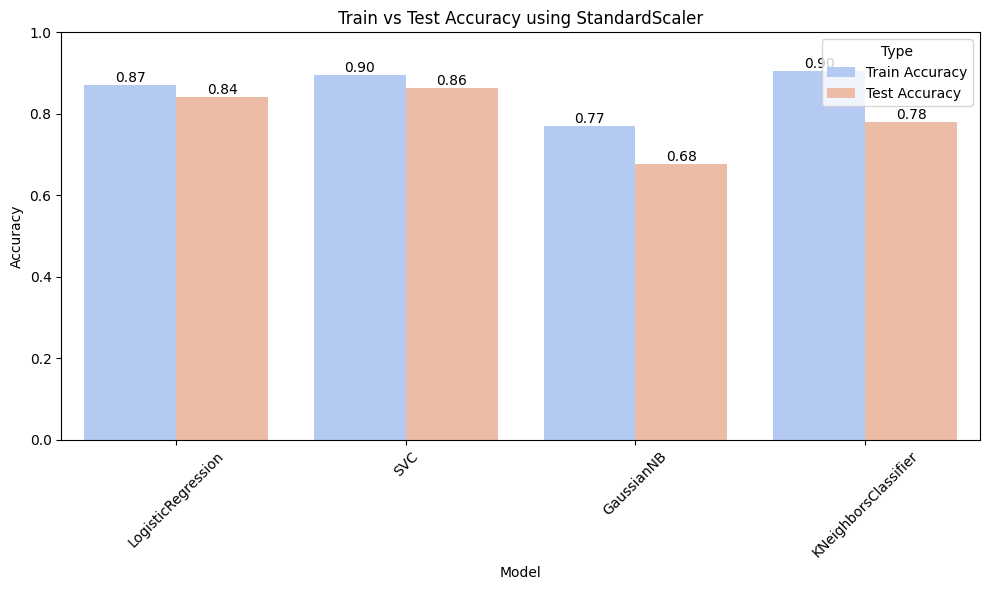

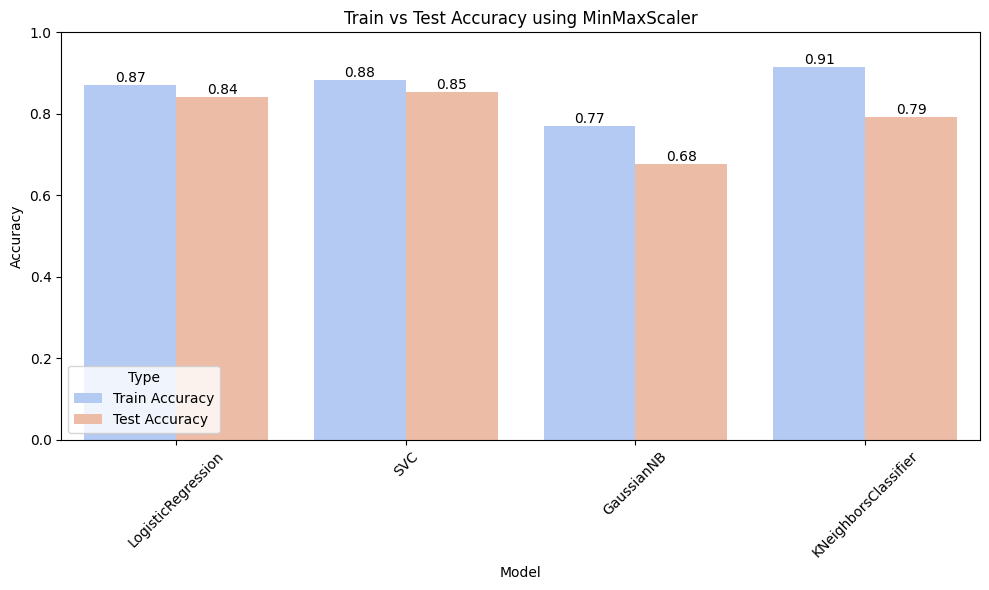

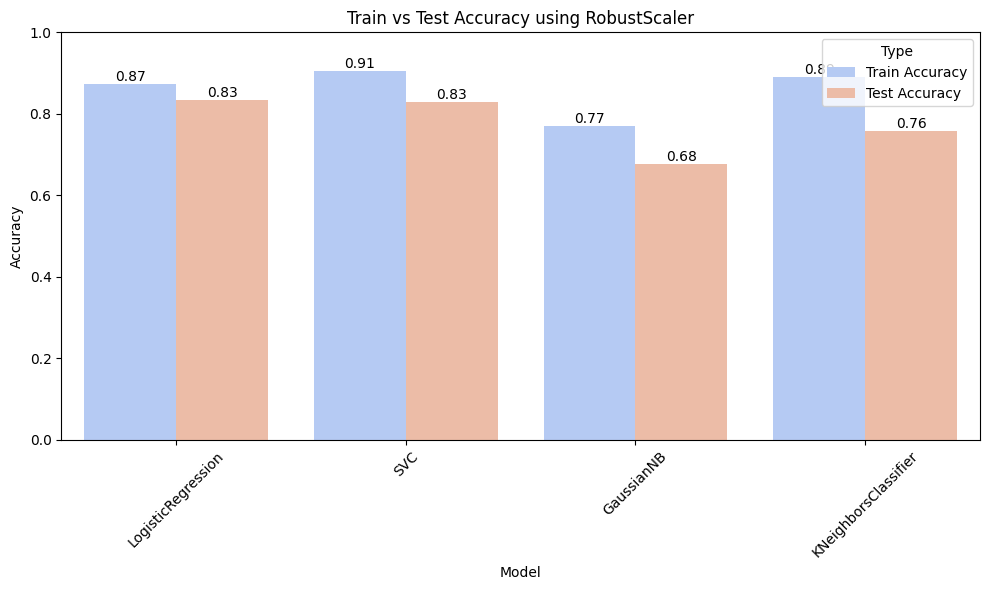

In [277]:
plot_results(results)

### Try the best Model

#### If SVC

In [267]:
svc_results=results_df[results_df['Model Name'] == 'svc']

In [268]:
svc_results[svc_results['ROC AUC Test'] == svc_results['ROC AUC Test'].max()]

Sampling Method Transformation Method Scaling Method Dim Reduction Method  \
155            none                   log         minmax              pca_95%   

    Model Name  Accuracy Train  Accuracy Test  F1 Train  F-beta Train  \
155        svc         0.92432       0.857143  0.696246      0.546466   

     F1 Test  F-beta Test  ROC AUC Train  ROC AUC Test  
155      0.3      0.19697       0.956032      0.849427

In [269]:
svc_results[svc_results['F1 Test'] == svc_results['F1 Test'].max()]

Sampling Method Transformation Method Scaling Method Dim Reduction Method  \
335           smote                  none       standard              pca_95%   

    Model Name  Accuracy Train  Accuracy Test  F1 Train  F-beta Train  \
335        svc         0.94983       0.877551  0.828986      0.758002   

      F1 Test  F-beta Test  ROC AUC Train  ROC AUC Test  
335  0.526316     0.431894       0.970941      0.740718

In [270]:
svc_results[svc_results['Accuracy Test'] == svc_results['Accuracy Test'].max()]

Sampling Method Transformation Method Scaling Method Dim Reduction Method  \
326           smote                  none       standard                 none   
335           smote                  none       standard              pca_95%   

    Model Name  Accuracy Train  Accuracy Test  F1 Train  F-beta Train  \
326        svc        0.951531       0.877551  0.835735      0.768290   
335        svc        0.949830       0.877551  0.828986      0.758002   

      F1 Test  F-beta Test  ROC AUC Train  ROC AUC Test  
326  0.513514     0.410982       0.977885      0.746834  
335  0.526316     0.431894       0.970941      0.740718

In [275]:
f1_score_train=[]
f1_score_test=[]

CC = np.linspace(0.5,10,20) # 50 values from 0.5 to 100 
GG = np.linspace(0.001,1,20)

for i, j in zip(CC, GG):
    clf = SVC(random_state=42,C=i ,gamma=j)
    clf.fit(X_train, y_train)

    y_pred_train= clf.predict(X_train)
    y_pred_test= clf.predict(X_test)

    f1_score_train.append(f1_score(y_train, y_pred_train, average='weighted'))

    f1_score_test.append(f1_score(y_test, y_pred_test, average='weighted'))

In [276]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=CC, y=f1_score_test,
                    mode='lines',
                    name='f1_score_test'))
fig.add_trace(go.Scatter(x=CC, y=f1_score_train,
                    mode='lines', name='f1_score_train'))


fig.show()

In [277]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=GG, y=f1_score_test,
                    mode='lines',
                    name='f1_score_test'))
fig.add_trace(go.Scatter(x=GG, y=f1_score_train,
                    mode='lines', name='f1_score_train'))


fig.show()

In [105]:
clf = SVC(C=2.5306, gamma=0.02138, random_state=42)
clf.fit(X_train, y_train)

SVC(C=2.5306, gamma=0.02138, random_state=42)

In [106]:
grid_predictions_train =clf.predict(X_train)
grid_predictions_val =clf.predict(X_test)

# print classification report
print('####Train matrices####')
print(classification_report(y_train, grid_predictions_train))
print('*********************************************')
print('####Test matrices####')
print(classification_report(y_test, grid_predictions_val))

####Train matrices####
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       986
           1       0.99      0.97      0.98       986

    accuracy                           0.98      1972
   macro avg       0.98      0.98      0.98      1972
weighted avg       0.98      0.98      0.98      1972

*********************************************
####Test matrices####
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       247
           1       0.59      0.40      0.48        47

    accuracy                           0.86       294
   macro avg       0.74      0.68      0.70       294
weighted avg       0.85      0.86      0.85       294



##### better approach 

In [96]:
f1_score_train=[]
f1_score_test=[]

CC = np.linspace(0.5, 10, 20)  
GG = np.linspace(0.001, 1, 20)  

for i in CC:
    for j in GG:
        clf = SVC(random_state=42, C=i, gamma=j)
        clf.fit(X_train, y_train)

        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)

        f1_score_train.append(f1_score(y_train, y_pred_train, average='weighted'))
        f1_score_test.append(f1_score(y_test, y_pred_test, average='weighted'))

In [101]:
from plotly.subplots import make_subplots

In [103]:
# Reshape f1_score_train and f1_score_test into grids
f1_score_train_grid = np.array(f1_score_train).reshape(len(CC), len(GG))
f1_score_test_grid = np.array(f1_score_test).reshape(len(CC), len(GG))

# Create subplots with two 3D surfaces
fig = make_subplots(
    rows=1, cols=2, 
    specs=[[{'type': 'surface'}, {'type': 'surface'}]],
    subplot_titles=("Train F1 Score", "Test F1 Score")
)

# 3D Surface for train F1 scores
train_surface = go.Surface(
    z=f1_score_train_grid,
    x=CC,  # C values on the x-axis
    y=GG,  # Gamma values on the y-axis
    colorscale='Blues',
    name='Train F1 Score'
)

# 3D Surface for test F1 scores
test_surface = go.Surface(
    z=f1_score_test_grid,
    x=CC,  # C values on the x-axis
    y=GG,  # Gamma values on the y-axis
    colorscale='Viridis',
    name='Test F1 Score'
)

# Add train surface to first subplot
fig.add_trace(train_surface, row=1, col=1)

# Add test surface to second subplot
fig.add_trace(test_surface, row=1, col=2)

# Update layout for better visualization
fig.update_layout(
    title_text="3D Plot of F1 Scores for Train and Test Sets",
    scene=dict(
        xaxis_title="C (CC)",
        yaxis_title="Gamma (GG)",
        zaxis_title="F1 Score"
    ),
    scene2=dict(
        xaxis_title="C (CC)",
        yaxis_title="Gamma (GG)",
        zaxis_title="F1 Score"
    ),
    autosize=True,
    margin=dict(l=0, r=0, b=65, t=90)
)

# Show the plot
fig.show()

In [108]:
clf = SVC(C=1, gamma=0.1061579, random_state=42)

clf.fit(X_train, y_train)

grid_predictions_train =clf.predict(X_train)
grid_predictions_val =clf.predict(X_test)

# print classification report
print('####Train matrices####')
print(classification_report(y_train, grid_predictions_train))
print('*********************************************')
print('####Test matrices####')
print(classification_report(y_test, grid_predictions_val))

####Train matrices####
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972

*********************************************
####Test matrices####
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.33      0.06      0.11        47

    accuracy                           0.83       294
   macro avg       0.59      0.52      0.51       294
weighted avg       0.76      0.83      0.78       294



In [ ]:
### apply grid search for each kernel !!!!!!!!!!!!!!!

In [ ]:
### Correct to this svc_results=results_df[results_df['Model Name'] == 'lin_svc' or ->> and so on ]

#### If 

### Grid Search 

In [178]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the pipeline components
sampling_name = 'smote'
transform_name = None  # None since no transformation is applied
scaling_name = 'standard'
pca_name = 'pca_99%'
classifier_name = 'rbfsvc'

# Define the pipeline steps based on the combination
steps = []
if sampling_name == 'smote':
    steps.append(('sampling', SMOTE()))
if transform_name is not None:
    steps.append(('transformation', transform_name))
if scaling_name == 'standard':
    steps.append(('scaling', StandardScaler()))
if pca_name == 'pca_99%':
    steps.append(('pca', PCA(n_components=0.99)))
steps.append(('classifier', SVC()))

# Use imbalanced pipeline if using sampling
if sampling_name is not None:
    pipeline = ImbPipeline(steps)
else:
    pipeline = Pipeline(steps)

# Define the hyperparameters grid for SVC
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['rbf']
}

# Apply GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

# Evaluate on test set
test_score = grid_search.score(X_test, y_test)
print(f"Test Score with Best Parameters: {test_score:.4f}")

##### for the later Use 

In [ ]:
# log_reg = LogisticRegression()
# rf_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
# rf_Knn = KNeighborsClassifier(n_neighbors=7,weights='distance')
# svm_Lclf = SVC(kernel='linear')
# svm_RBFclf = SVC(kernel = 'rbf')

# # 5. Train models
# # log_reg.fit(X_train, y_train)
# # rf_clf.fit(X_train, y_train)
# # svm_Lclf.fit(X_train, y_train)
# # svm_RBFclf.fit(X_train, y_train)
# rf_Knn.fit(X_train, y_train)

# # 6. Predict and evaluate
# models = {'KNN':rf_Knn }

# for name, model in models.items():
#     y_pred = model.predict(X_test)
#     print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
#     print(classification_report(y_test, y_pred))

### Error Analysis

#### KMean

In [95]:
df_yeo_minmax=MinMaxScaler().fit_transform(YeoJohnsonTransformer().fit_transform(X_train_copy))
df_yeo_std=StandardScaler().fit_transform(YeoJohnsonTransformer().fit_transform(X_train_copy))
df_yeo_robust=RobustScaler().fit_transform(YeoJohnsonTransformer().fit_transform(X_train_copy))
df_log_minmax=MinMaxScaler().fit_transform(LogTransformer().fit_transform(X_train_copy))
df_log_std=StandardScaler().fit_transform(LogTransformer().fit_transform(X_train_copy))
df_log_robust=RobustScaler().fit_transform(LogTransformer().fit_transform(X_train_copy))
df_minmax=MinMaxScaler().fit_transform(X_train_copy)
df_std=StandardScaler().fit_transform(X_train_copy)
df_robust=RobustScaler().fit_transform(X_train_copy)

In [102]:
pca = PCA()
X_train_red = pca.fit_transform(df_std) ##  Scale X_train before 
d = {'Number of EigenVector': np.arange(1,len(pd.DataFrame(df_std).columns)+1), 'Varaiability Captured': np.cumsum(pca.explained_variance_ratio_)}
df = pd.DataFrame(data=d)
px.line(df, x='Number of EigenVector', y='Varaiability Captured',markers=True,
                       title='EigenVectors VS Varaiability Captured')

In [174]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [175]:
def plot_wcss_silhouette(df, cluster_range=(2, 10)):    
    wcss = []
    silhouette_scores = []
    
    for i in range(cluster_range[0], cluster_range[1]): 
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(df)
        
        # Append WCSS (within-cluster sum of squares)
        wcss.append(kmeans.inertia_)
        
        # Calculate Silhouette Score and append it
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(df, labels)
        silhouette_scores.append(silhouette_avg)

    # Plotting both WCSS (Elbow Method) and Silhouette Score
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Number of clusters')
    ax1.set_ylabel('WCSS', color='tab:blue')
    ax1.plot(range(cluster_range[0], cluster_range[1]), wcss, color='tab:blue', label='WCSS')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for the Silhouette Scores
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Silhouette Score', color='tab:green')
    ax2.plot(range(cluster_range[0], cluster_range[1]), silhouette_scores, color='tab:green', label='Silhouette Score')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    fig.tight_layout()
    plt.title('The Elbow Method and Silhouette Score')
    plt.show()

In [176]:
def visualize_clusters_with_pca(df , labels):

    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df)

    df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
    df_pca['Cluster'] = labels

    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='Set2', s=100, alpha=0.7)
    plt.title(f'Clusters visualized with PCA ')
    plt.show()


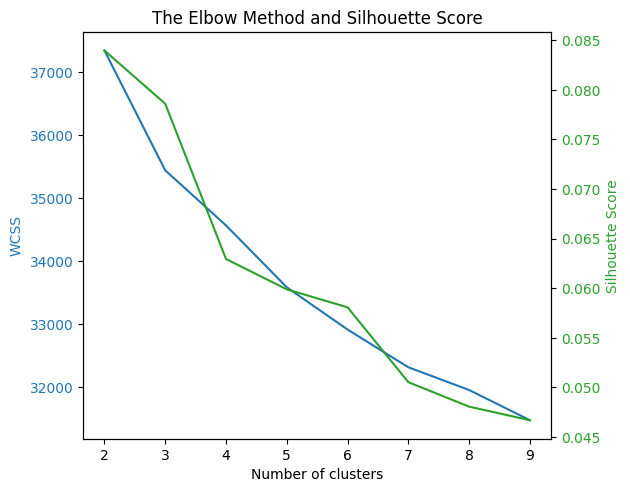

In [188]:
plot_wcss_silhouette(StandardScaler().fit_transform(BoxCoxTransformer().fit_transform(X_train_copy)))

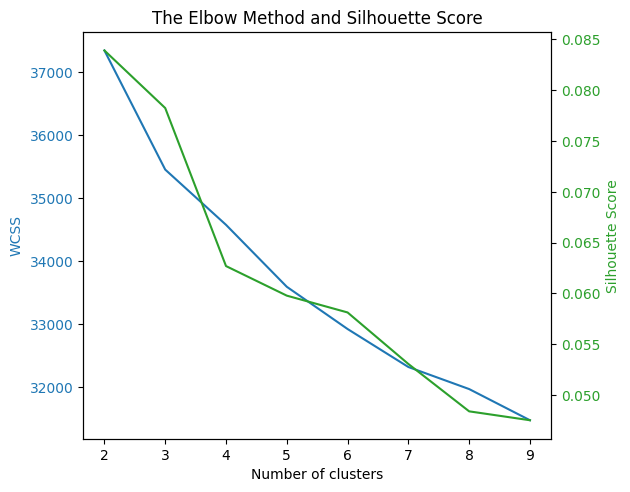

In [189]:
plot_wcss_silhouette(StandardScaler().fit_transform(YeoJohnsonTransformer().fit_transform(X_train_copy)))

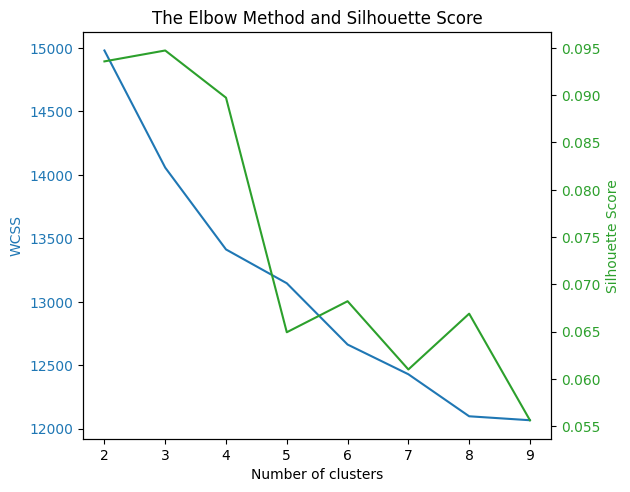

In [190]:
plot_wcss_silhouette(RobustScaler().fit_transform(YeoJohnsonTransformer().fit_transform(X_train_copy)))

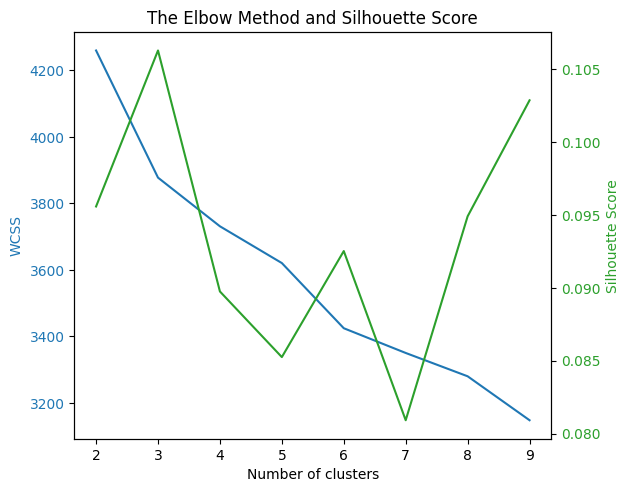

In [191]:
plot_wcss_silhouette(MinMaxScaler().fit_transform(YeoJohnsonTransformer().fit_transform(X_train_copy)))

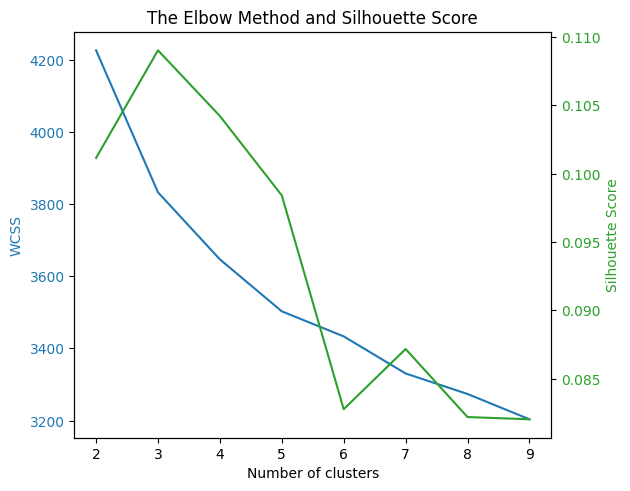

In [192]:
plot_wcss_silhouette(MinMaxScaler().fit_transform(LogTransformer().fit_transform(X_train_copy)))

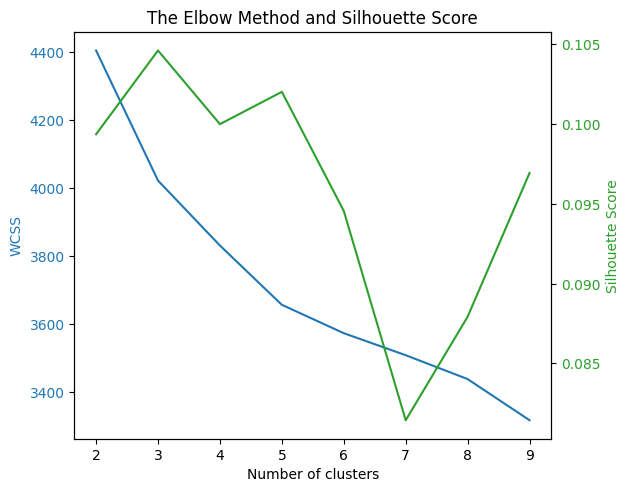

In [193]:
plot_wcss_silhouette(MinMaxScaler().fit_transform(BoxCoxTransformer().fit_transform(X_train_copy)))

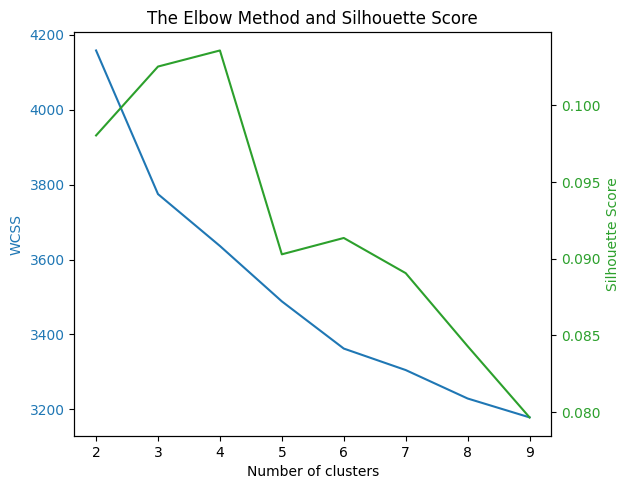

In [197]:
plot_wcss_silhouette(df_minmax)

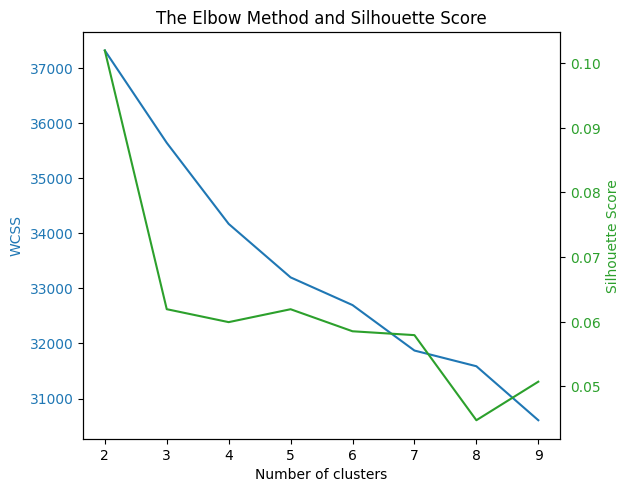

In [198]:
plot_wcss_silhouette(df_std)

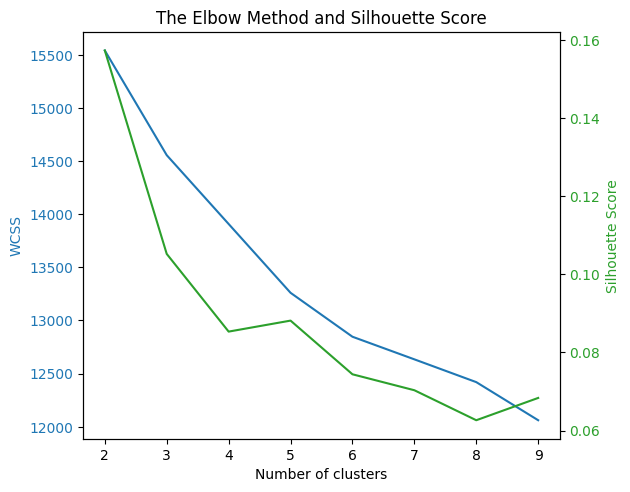

In [199]:
plot_wcss_silhouette(df_robust)

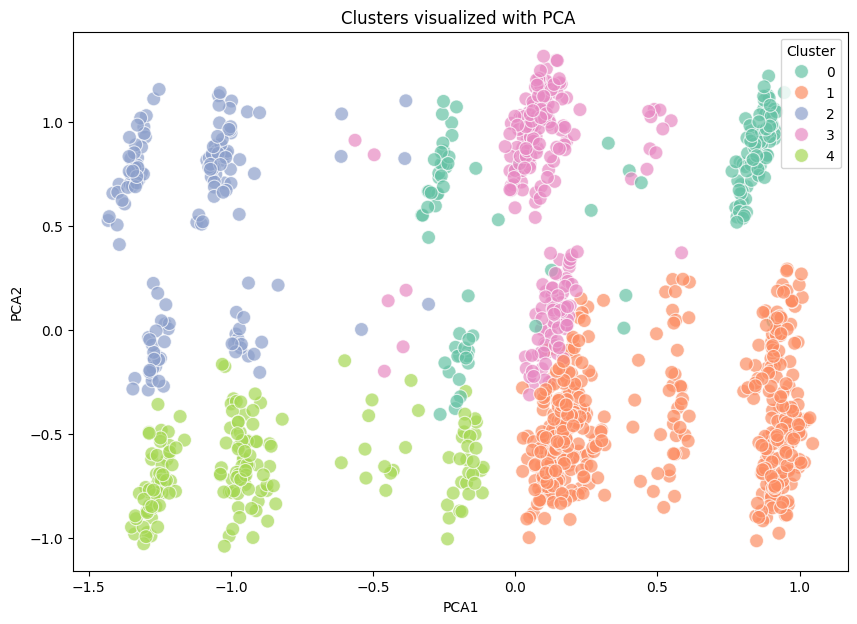

In [196]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
labels = kmeans.fit_predict(df_yeo_minmax)

visualize_clusters_with_pca(df_yeo_minmax , labels)

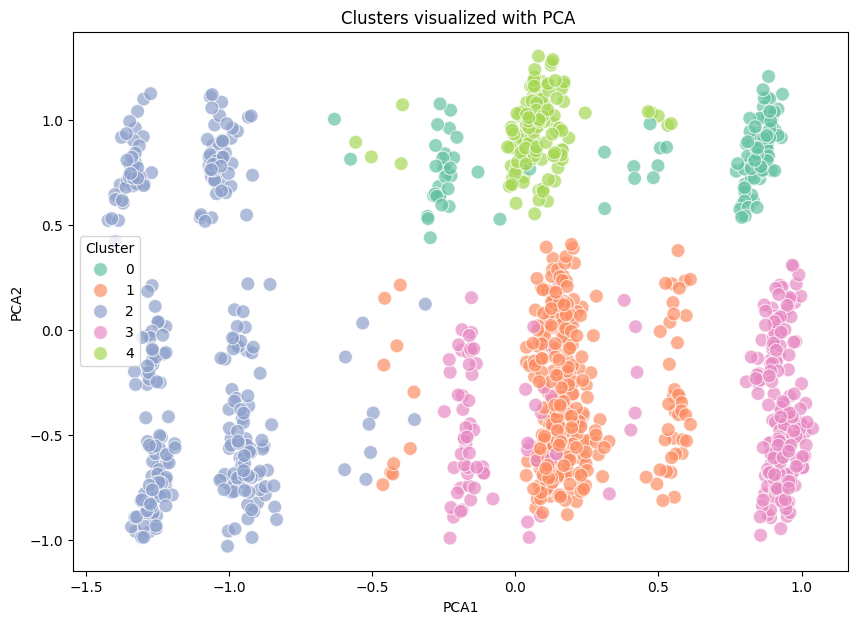

In [200]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
labels = kmeans.fit_predict(df_log_minmax)

visualize_clusters_with_pca(df_log_minmax , labels)

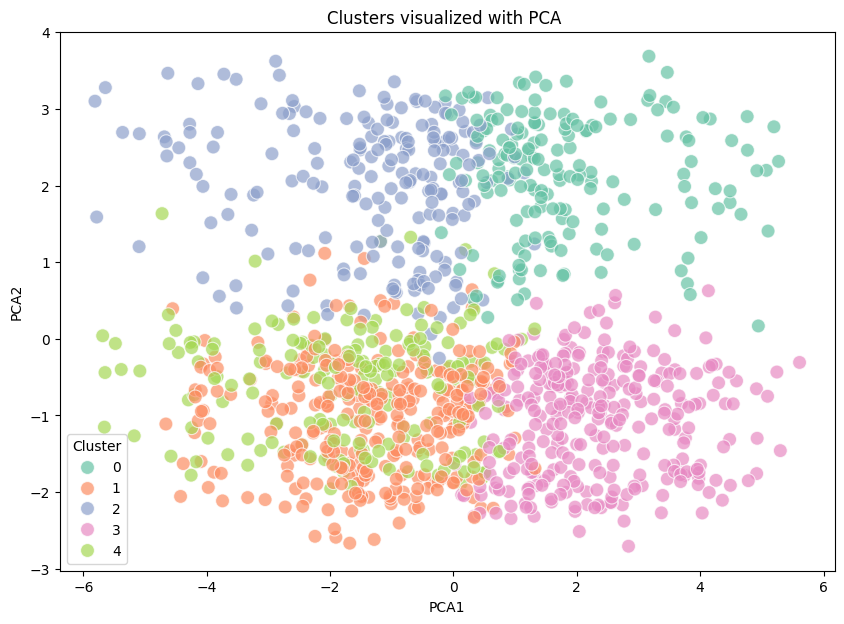

In [210]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
labels = kmeans.fit_predict(df_yeo_std)

visualize_clusters_with_pca(df_yeo_std , labels)

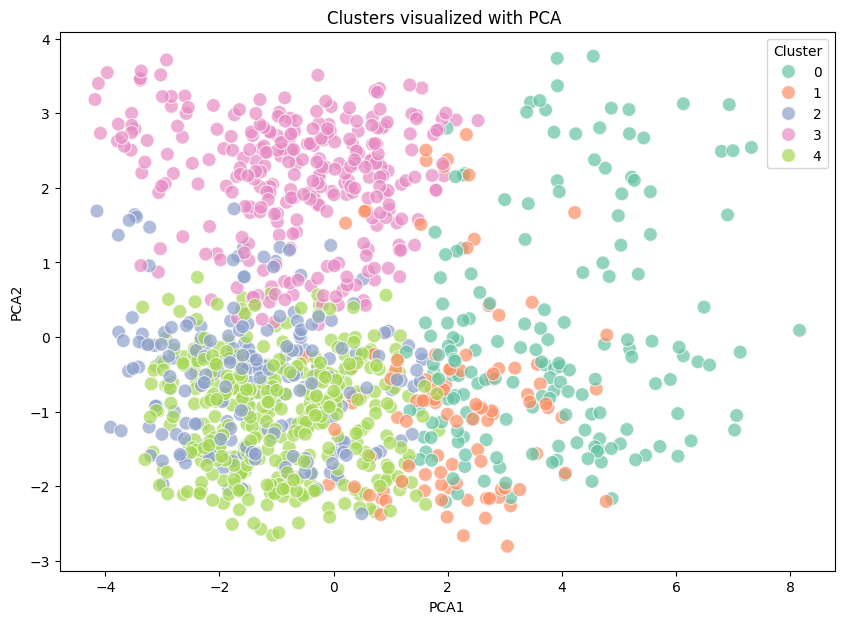

In [220]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
labels = kmeans.fit_predict(df_std)

visualize_clusters_with_pca(df_std , labels)

#### DBSCAN

In [201]:
from sklearn.cluster import DBSCAN

In [202]:
def evaluate_dbscan(df, eps_range, min_sample_range):
    # Initialize arrays to store results
    silhouette_scores = np.zeros((len(eps_range), len(min_sample_range)))

    for i, eps in enumerate(eps_range):
        for j, min_samples in enumerate(min_sample_range):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(df)
            
            # Calculate Silhouette score only if there is more than one cluster
            if len(set(labels)) > 1:
                score = silhouette_score(df, labels)
            else:
                score = -1  # Silhouette score is not defined for single cluster

            silhouette_scores[i, j] = score

    # Plot results
    plt.figure(figsize=(12, 8))
    plt.imshow(silhouette_scores, aspect='auto', cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Silhouette Score')
    plt.xticks(ticks=np.arange(len(min_sample_range)), labels=min_sample_range)
    plt.yticks(ticks=np.arange(len(eps_range)), labels=np.round(eps_range, 2))
    plt.xlabel('min_samples')
    plt.ylabel('eps')
    plt.title('Silhouette Scores for DBSCAN Clustering')
    plt.show()

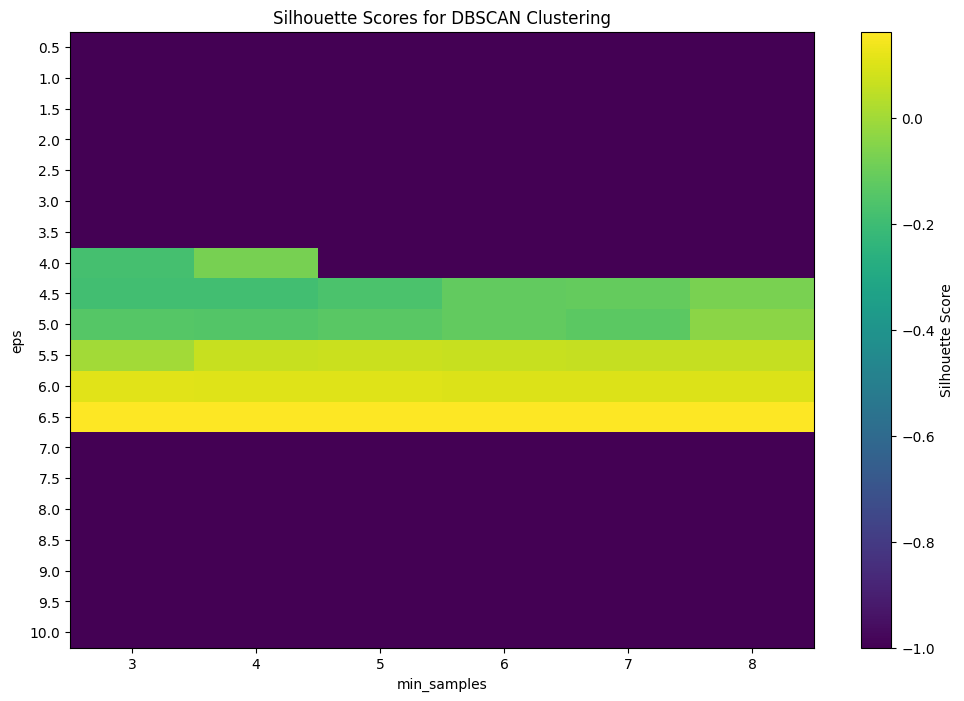

In [211]:
eps_range = np.linspace(0.5,10,20)
min_sample_range = range(3,9)
evaluate_dbscan(df_yeo_std , eps_range , min_sample_range)

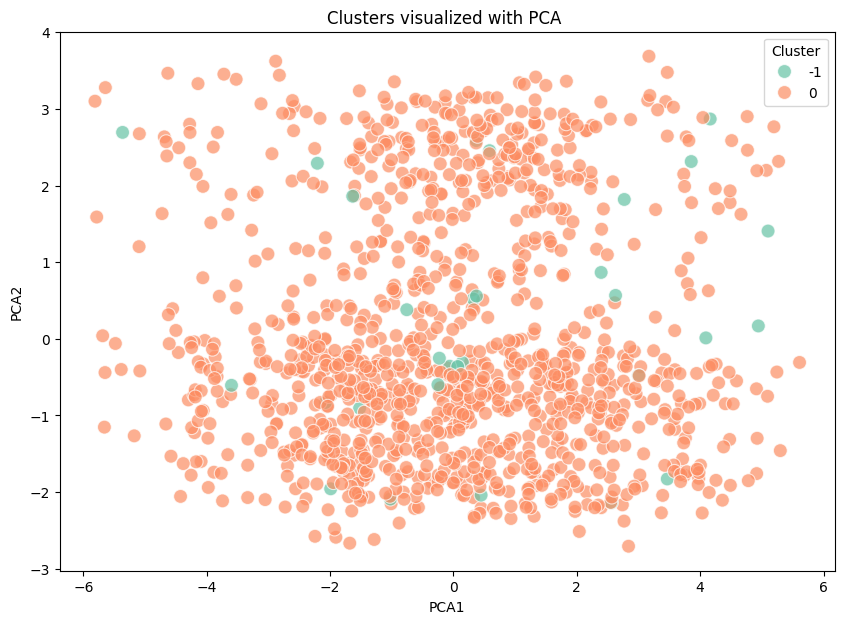

In [214]:
dbscan = DBSCAN(eps=6.5,min_samples=5)
labels = dbscan.fit_predict(df_yeo_std)

visualize_clusters_with_pca(df_yeo_std , labels)

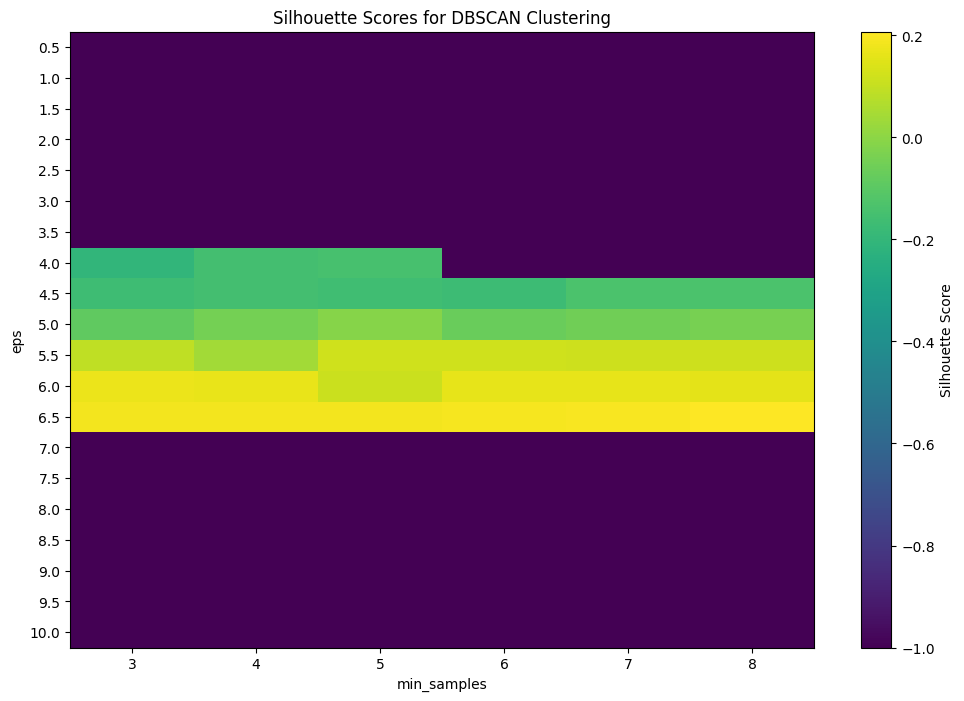

In [217]:
eps_range = np.linspace(0.5,10,20)
min_sample_range = range(3,9)
evaluate_dbscan(df_std , eps_range , min_sample_range)

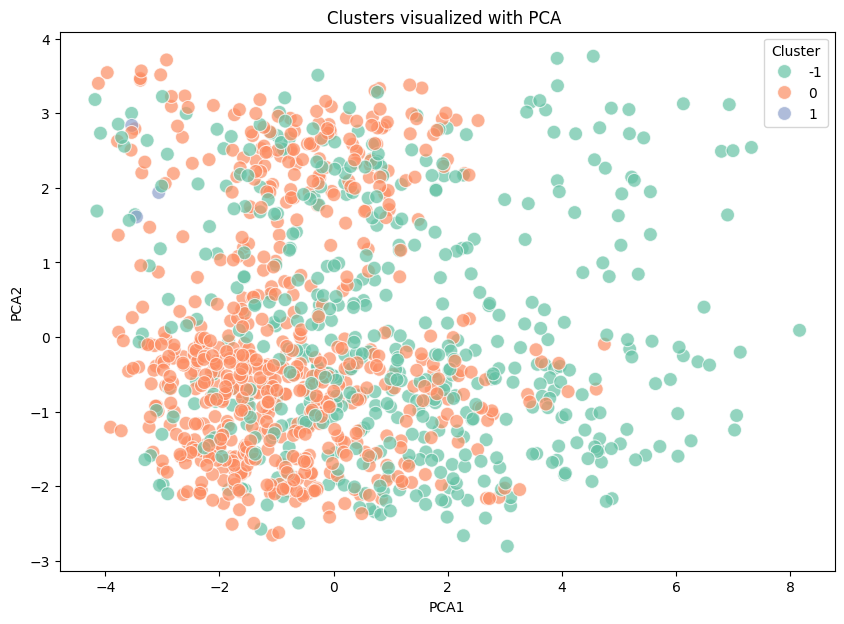

In [219]:
dbscan = DBSCAN(eps=5,min_samples=5)
labels = dbscan.fit_predict(df_std)

visualize_clusters_with_pca(df_std , labels)

#### Agglomerative clustering 

In [215]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [216]:
def Dendrogram(df,method='ward'):
    plt.figure(figsize=(20,10))
    dendrogram = sch.dendrogram(sch.linkage(df, method = method))
    plt.title('Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean distances')
    plt.show()

In [222]:
def agglomerative_clustering_eval(df, n_clusters_range, method='ward'):
    silhouette_scores = {}

    for n_clusters in n_clusters_range:
        # Apply Agglomerative Clustering with the specified method
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        labels = clustering.fit_predict(df)
        
        # Calculate Silhouette Score
        score = silhouette_score(df, labels)
        silhouette_scores[n_clusters] = score

    # Plot Silhouette Scores
    plt.figure(figsize=(8, 5))
    plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
    plt.title(f'Silhouette Score for Different Number of Clusters (Method: {method})')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

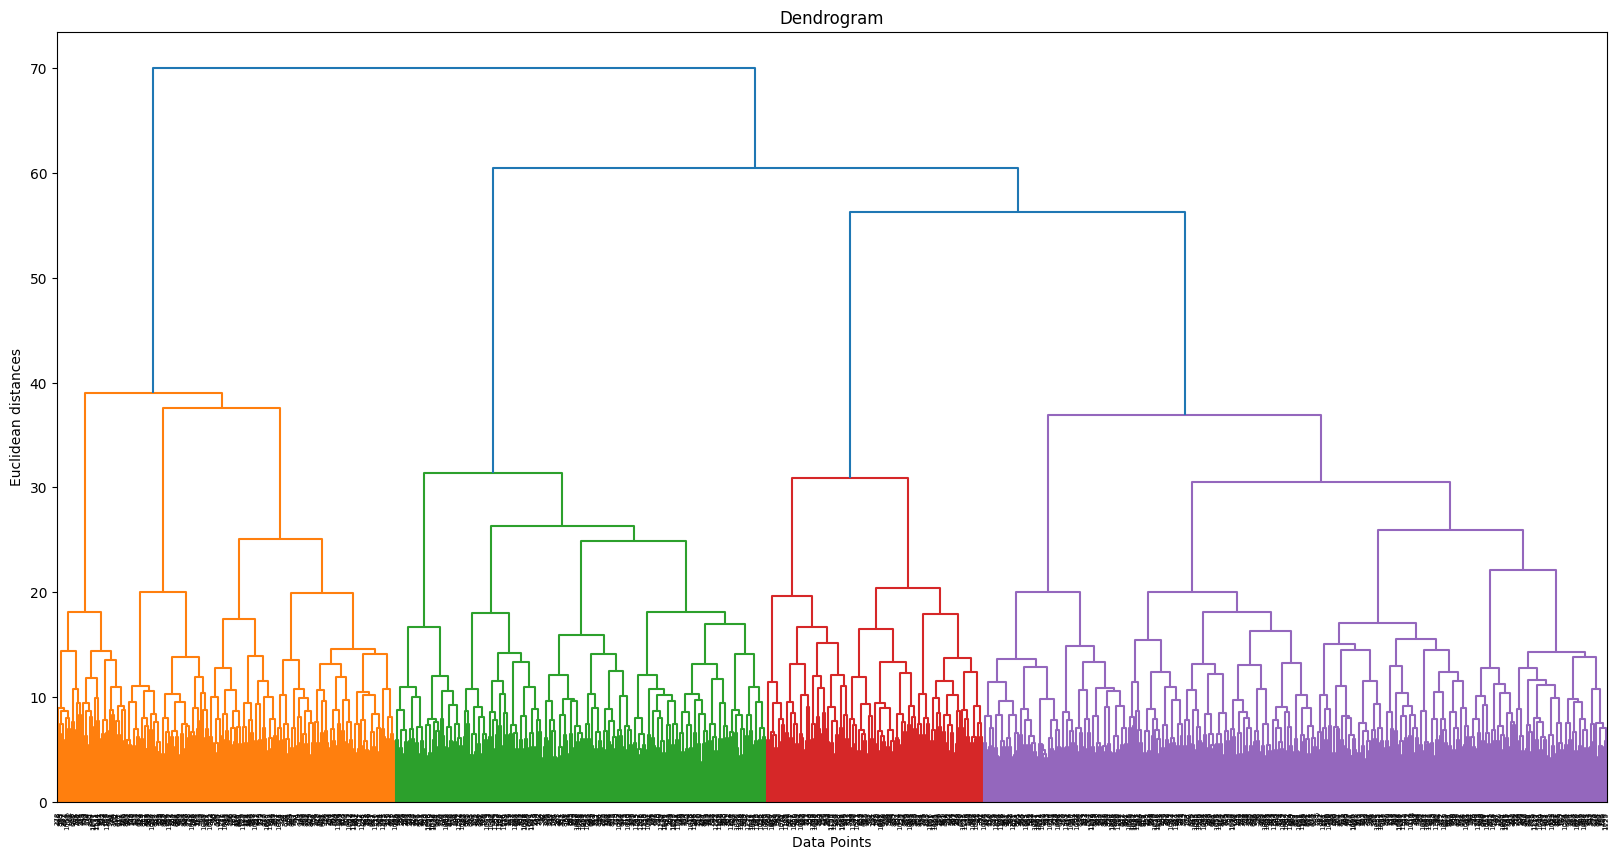

In [228]:
Dendrogram(df_std , 'ward')

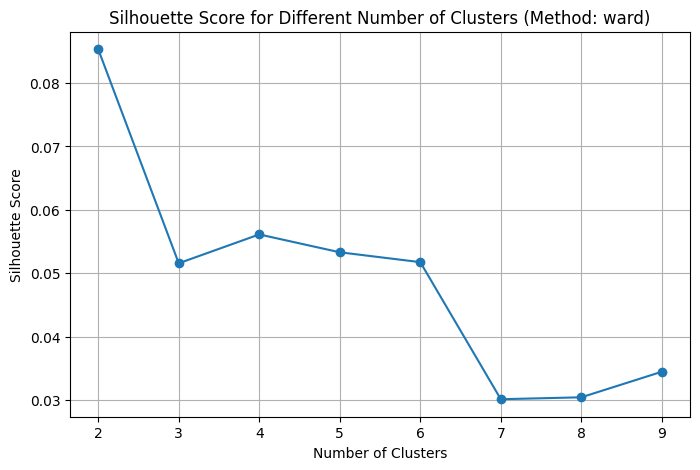

In [229]:
n_clusters_range = range(2, 10)
agglomerative_clustering_eval(df_std,n_clusters_range,'ward')

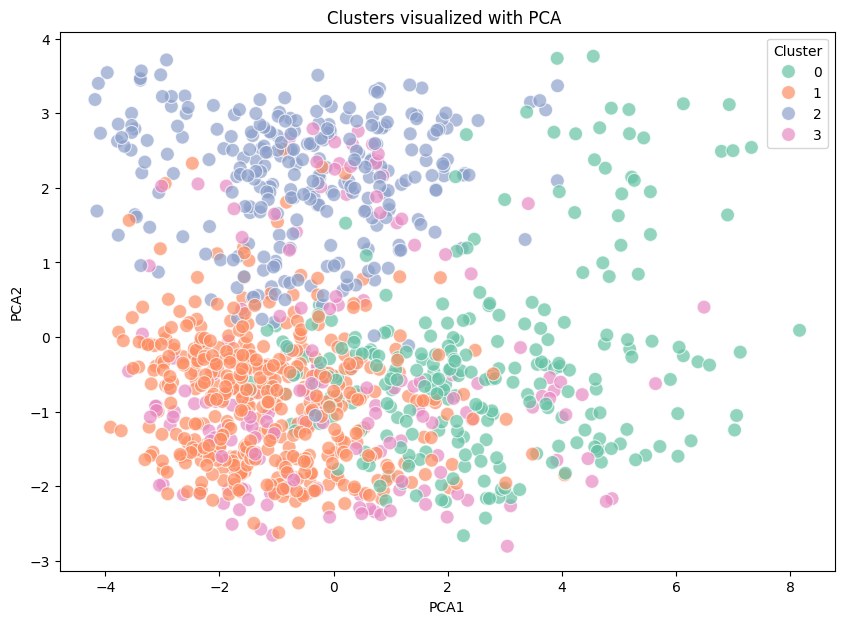

In [231]:
clustering = AgglomerativeClustering(n_clusters=4,linkage='ward')
labels = clustering.fit_predict(df_std)

visualize_clusters_with_pca(df_std , labels)

In [230]:
## 4 clusters with agglomerative 'ward'

In [320]:
if not isinstance(df_std, pd.DataFrame):
    df_std = pd.DataFrame(df_std)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
clusters = agg_clustering.fit_predict(df_std)

# Add the cluster labels to df_std
df_std['cluster'] = clusters

In [321]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# Dictionary to store SVC models for each cluster
models = {}

# Apply SMOTE and train an SVC for each cluster
for cluster_label in range(4):
    # Filter the data for the current cluster
    X_cluster = X_train[X_train['cluster'] == cluster_label].drop('cluster', axis=1)
    y_cluster = y_train[X_train['cluster'] == cluster_label]
    
    # Apply SMOTE
    smote = SMOTE()
    X_cluster_smote, y_cluster_smote = smote.fit_resample(X_cluster, y_cluster)
    
    # Train an SVC model for this cluster
    svc_model = SVC()
    svc_model.fit(X_cluster_smote, y_cluster_smote)
    
    # Store the model
    models[cluster_label] = svc_model

#### TSNE

In [285]:
from sklearn.manifold import TSNE
import plotly.express as px

In [286]:
tsne_projection = TSNE(n_components=2, 
                       perplexity=2, 
                       learning_rate=1, 
                       init='pca', 
                       method='barnes_hut', 
                       n_jobs=-1, 
                       random_state=42).fit_transform(X_train)

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



In [287]:
tsne_projection = pd.DataFrame(tsne_projection, columns=['feature1', 'feature2'],index=y_train.index.tolist())
tsne_projection['y_true'] = y_train.tolist()
tsne_projection.head()

feature1   feature2  y_true
0   50.078510 -51.252674       0
1   -7.213163  13.566298       0
2  106.090500 -27.108126       0
3    5.314302 -18.361509       0
4   45.736443  62.212524       0

In [289]:
# import plotly.io as pio
# pio.renderers.default = 'browser'  # This will open the plot in a web browser

# # Create your 3D scatter plot
# fig = px.scatter_3d(tsne_projection, 
#                     x='feature1', 
#                     y='feature2', 
#                     z='feature3', 
#                     color="y_true")

# # Display the plot
# fig.show()

In [291]:
px.scatter(tsne_projection, x='feature1', y='feature2', color="y_true")

# ready

In [ ]:
if OPTUNA:
    def xgb_objective(trial):

        params = param = {"lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
                          "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
                          "subsample": trial.suggest_float("subsample", 0.01, 1.0, step = 0.1),
                          "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1.0, step = 0.1),
                          "max_depth": trial.suggest_int("max_depth", 1, 12),
                          "n_estimators": trial.suggest_int("n_estimators", 256, 4096),
                          "eta": trial.suggest_float("eta", 0.01, 0.5, step = 0.01),
                          "gamma": trial.suggest_loguniform("gamma", 1e-8, 1.0),
                         }

        xgb_auc_score_avg = 0
        for idx, (train_idx,val_idx) in enumerate(skf.split(X,Y)):
            train_X = X.iloc[train_idx]
            val_X = X.iloc[val_idx]
            train_Y = Y.iloc[train_idx]
            val_Y = Y.iloc[val_idx]

            xgb_model = XGBClassifier(**params)

            xgb_model.fit(train_X,train_Y)
            
            xgb_prediction = xgb_model.predict_proba(val_X)[:,1]
            xgb_prediction[xgb_prediction>1]=1
            xgb_prediction[xgb_prediction<0]=0
            xgb_auc_score = roc_auc_score(val_Y, xgb_prediction)
            print(f'The AUC score evaluated on the validation subset using XGB model for fold {idx}: ', xgb_auc_score)

            xgb_auc_score_avg += xgb_auc_score
            
        xgb_auc_score_avg /=n_folds
        print(f'The averaged AUC score evaluated on the validation subset using XGB model:', xgb_auc_score_avg)
        return -xgb_auc_score_avg

    xgb_study = optuna.create_study()
    xgb_study.optimize(xgb_objective, n_trials=10)
    best_xgb_params = xgb_study.best_trial.params

    print('Best XGB hyper parameters:', best_xgb_params)